# Let's first try on the original dataset with no added data but with normalization

In [389]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

In [390]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []
list_of_row_components = []

for i in range(1, 524):
    
    current_row = df.iloc[i]
    
    bridge_id = current_row.iloc[0]
    
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

In [391]:
for idx, element in enumerate(list_of_row_components):
    for i in range(1, len(element)):
        list_of_row_components[idx][i] = float(list_of_row_components[idx][i])

In [392]:
for idx, element in enumerate(list_of_row_components):
    for i in range(1, len(element)):
        list_of_row_components[idx][i] = float(list_of_row_components[idx][i])

In [393]:
len(list_of_row_components)

11506

In [394]:
for idx, component in enumerate(list_of_row_components):
    temp = component[6]
    list_of_row_components[idx][6] = list_of_row_components[idx][1]
    list_of_row_components[idx][1] = temp

In [395]:
import numpy as np

list_of_examples = []
temp_list = []

max_num = 22
iter = 0;

for row_component in list_of_row_components:
    if iter == max_num:
        list_of_examples.append(np.array(temp_list))
        temp_list = []
        iter = 0
        
    temp_list.append(np.array(row_component))
    iter += 1

list_of_examples = np.array(list_of_examples)

In [396]:
for idx, example in enumerate(list_of_examples):
    list_of_examples[idx][21] = [list_of_examples[idx][21][6]]

In [397]:
list_of_examples.shape

(522, 22, 7)

In [470]:
from sklearn.model_selection import train_test_split

n_train_periods = 300
n_valid_set = 111
n_test_set = 111
train = list_of_examples[:n_train_periods, :]
valid = list_of_examples[n_train_periods:n_train_periods+n_valid_set, :]
test = list_of_examples[n_train_periods+n_valid_set:n_train_periods+n_valid_set+n_test_set, :]

# split into input and outputs
train_X, train_y = train[:, :-4, :], train[:, -4, :]
valid_X, valid_y = valid[:, :-4, :], valid[:, -4, :]
test_X_vector, test_y_vector = test[:, :-4, :], test[:, -4, :]
test_X, test_y = test[:, :-4, :], test[:, -4:]


In [471]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for idx, x in enumerate(train_X):
    train_X[idx] = scaler.fit_transform(x)
    
train_y = scaler.fit_transform(train_y)

for idx, x in enumerate(valid_X):
    valid_X[idx] = scaler.fit_transform(x)
    
valid_y = scaler.fit_transform(valid_y)

for idx, x in enumerate(test_X_vector):
    test_X_vector[idx] = scaler.fit_transform(x)
    
test_y_vector = scaler.fit_transform(test_y_vector)

for idx, x in enumerate(test_X):
    test_X[idx] = scaler.fit_transform(x)

for idx, x in enumerate(test_y):
    test_y[idx] = scaler.fit_transform(x)

In [472]:
print("Shape of train_X: " + str(train_X.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of valid_X: " + str(valid_X.shape))
print("Shape of valid_y: " + str(valid_y.shape))
print("Shape of test_X: " + str(test_X_vector.shape))
print("Shape of test_y: " + str(test_y_vector.shape))
print("Shape of test_X: " + str(test_X.shape))
print("Shape of test_y: " + str(test_y.shape))

Shape of train_X: (300, 18, 7)
Shape of train_y: (300, 7)
Shape of valid_X: (111, 18, 7)
Shape of valid_y: (111, 7)
Shape of test_X: (111, 18, 7)
Shape of test_y: (111, 7)
Shape of test_X: (111, 18, 7)
Shape of test_y: (111, 4, 7)


In [461]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input, Model

from tcn import TCN, tcn_full_summary

batch_size, timesteps, input_dim = None, 18, 7

i = Input(batch_shape=(batch_size, timesteps, input_dim))

o = TCN(return_sequences=False)(i)
o = Dense(7)(o)

lstm_aadt_norm_model = Model(inputs=[i], outputs=[o])
lstm_aadt_norm_model.compile(optimizer='adam', loss='mae')

tcn_full_summary(lstm_aadt_norm_model, expand_residual_blocks=False)

history = lstm_aadt_norm_model.fit(train_X, train_y, epochs=5000, batch_size=32, validation_data=(valid_X, valid_y), verbose=2, shuffle=False)

Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 18, 7)]           0         
_________________________________________________________________
residual_block_0 (ResidualBl [(None, 18, 64), (None, 1 9728      
_________________________________________________________________
residual_block_1 (ResidualBl [(None, 18, 64), (None, 1 16512     
_________________________________________________________________
residual_block_2 (ResidualBl [(None, 18, 64), (None, 1 16512     
_________________________________________________________________
residual_block_3 (ResidualBl [(None, 18, 64), (None, 1 16512     
_________________________________________________________________
residual_block_4 (ResidualBl [(None, 18, 64), (None, 1 16512     
_________________________________________________________________
residual_block_5 (ResidualBl [(None, 18, 64), (None, 

Epoch 114/5000
10/10 - 0s - loss: 0.0704 - val_loss: 0.2484
Epoch 115/5000
10/10 - 0s - loss: 0.0691 - val_loss: 0.2319
Epoch 116/5000
10/10 - 0s - loss: 0.0756 - val_loss: 0.2270
Epoch 117/5000
10/10 - 0s - loss: 0.0792 - val_loss: 0.2384
Epoch 118/5000
10/10 - 0s - loss: 0.0679 - val_loss: 0.2570
Epoch 119/5000
10/10 - 0s - loss: 0.0694 - val_loss: 0.2424
Epoch 120/5000
10/10 - 0s - loss: 0.0739 - val_loss: 0.2190
Epoch 121/5000
10/10 - 0s - loss: 0.0765 - val_loss: 0.2346
Epoch 122/5000
10/10 - 0s - loss: 0.0704 - val_loss: 0.2593
Epoch 123/5000
10/10 - 0s - loss: 0.0721 - val_loss: 0.2342
Epoch 124/5000
10/10 - 0s - loss: 0.0702 - val_loss: 0.2241
Epoch 125/5000
10/10 - 0s - loss: 0.0732 - val_loss: 0.2361
Epoch 126/5000
10/10 - 0s - loss: 0.0735 - val_loss: 0.2521
Epoch 127/5000
10/10 - 0s - loss: 0.0637 - val_loss: 0.2388
Epoch 128/5000
10/10 - 0s - loss: 0.0576 - val_loss: 0.2255
Epoch 129/5000
10/10 - 0s - loss: 0.0648 - val_loss: 0.2247
Epoch 130/5000
10/10 - 0s - loss: 0.0722

Epoch 251/5000
10/10 - 0s - loss: 0.0425 - val_loss: 0.2168
Epoch 252/5000
10/10 - 0s - loss: 0.0500 - val_loss: 0.2264
Epoch 253/5000
10/10 - 0s - loss: 0.0520 - val_loss: 0.2311
Epoch 254/5000
10/10 - 0s - loss: 0.0438 - val_loss: 0.2256
Epoch 255/5000
10/10 - 0s - loss: 0.0437 - val_loss: 0.2154
Epoch 256/5000
10/10 - 0s - loss: 0.0507 - val_loss: 0.2299
Epoch 257/5000
10/10 - 0s - loss: 0.0466 - val_loss: 0.2291
Epoch 258/5000
10/10 - 0s - loss: 0.0451 - val_loss: 0.2253
Epoch 259/5000
10/10 - 0s - loss: 0.0451 - val_loss: 0.2153
Epoch 260/5000
10/10 - 0s - loss: 0.0497 - val_loss: 0.2259
Epoch 261/5000
10/10 - 0s - loss: 0.0525 - val_loss: 0.2316
Epoch 262/5000
10/10 - 0s - loss: 0.0445 - val_loss: 0.2183
Epoch 263/5000
10/10 - 0s - loss: 0.0442 - val_loss: 0.2206
Epoch 264/5000
10/10 - 0s - loss: 0.0489 - val_loss: 0.2269
Epoch 265/5000
10/10 - 0s - loss: 0.0505 - val_loss: 0.2281
Epoch 266/5000
10/10 - 0s - loss: 0.0461 - val_loss: 0.2236
Epoch 267/5000
10/10 - 0s - loss: 0.0428

Epoch 388/5000
10/10 - 0s - loss: 0.0417 - val_loss: 0.2249
Epoch 389/5000
10/10 - 0s - loss: 0.0391 - val_loss: 0.2176
Epoch 390/5000
10/10 - 0s - loss: 0.0349 - val_loss: 0.2068
Epoch 391/5000
10/10 - 0s - loss: 0.0424 - val_loss: 0.2212
Epoch 392/5000
10/10 - 0s - loss: 0.0385 - val_loss: 0.2207
Epoch 393/5000
10/10 - 0s - loss: 0.0388 - val_loss: 0.2144
Epoch 394/5000
10/10 - 0s - loss: 0.0406 - val_loss: 0.2121
Epoch 395/5000
10/10 - 0s - loss: 0.0411 - val_loss: 0.2212
Epoch 396/5000
10/10 - 0s - loss: 0.0397 - val_loss: 0.2187
Epoch 397/5000
10/10 - 0s - loss: 0.0374 - val_loss: 0.2146
Epoch 398/5000
10/10 - 0s - loss: 0.0398 - val_loss: 0.2132
Epoch 399/5000
10/10 - 0s - loss: 0.0413 - val_loss: 0.2209
Epoch 400/5000
10/10 - 0s - loss: 0.0375 - val_loss: 0.2196
Epoch 401/5000
10/10 - 0s - loss: 0.0360 - val_loss: 0.2137
Epoch 402/5000
10/10 - 0s - loss: 0.0400 - val_loss: 0.2128
Epoch 403/5000
10/10 - 0s - loss: 0.0387 - val_loss: 0.2186
Epoch 404/5000
10/10 - 0s - loss: 0.0382

Epoch 525/5000
10/10 - 0s - loss: 0.0323 - val_loss: 0.2088
Epoch 526/5000
10/10 - 0s - loss: 0.0352 - val_loss: 0.2056
Epoch 527/5000
10/10 - 0s - loss: 0.0375 - val_loss: 0.2155
Epoch 528/5000
10/10 - 0s - loss: 0.0330 - val_loss: 0.2105
Epoch 529/5000
10/10 - 0s - loss: 0.0332 - val_loss: 0.2064
Epoch 530/5000
10/10 - 0s - loss: 0.0367 - val_loss: 0.2126
Epoch 531/5000
10/10 - 0s - loss: 0.0382 - val_loss: 0.2130
Epoch 532/5000
10/10 - 0s - loss: 0.0310 - val_loss: 0.2111
Epoch 533/5000
10/10 - 0s - loss: 0.0324 - val_loss: 0.2051
Epoch 534/5000
10/10 - 0s - loss: 0.0376 - val_loss: 0.2147
Epoch 535/5000
10/10 - 0s - loss: 0.0328 - val_loss: 0.2095
Epoch 536/5000
10/10 - 0s - loss: 0.0310 - val_loss: 0.2061
Epoch 537/5000
10/10 - 0s - loss: 0.0319 - val_loss: 0.2091
Epoch 538/5000
10/10 - 0s - loss: 0.0342 - val_loss: 0.2152
Epoch 539/5000
10/10 - 0s - loss: 0.0320 - val_loss: 0.2110
Epoch 540/5000
10/10 - 0s - loss: 0.0341 - val_loss: 0.2029
Epoch 541/5000
10/10 - 0s - loss: 0.0373

Epoch 662/5000
10/10 - 0s - loss: 0.0323 - val_loss: 0.2089
Epoch 663/5000
10/10 - 0s - loss: 0.0286 - val_loss: 0.2016
Epoch 664/5000
10/10 - 0s - loss: 0.0338 - val_loss: 0.2052
Epoch 665/5000
10/10 - 0s - loss: 0.0312 - val_loss: 0.2128
Epoch 666/5000
10/10 - 0s - loss: 0.0317 - val_loss: 0.2067
Epoch 667/5000
10/10 - 0s - loss: 0.0334 - val_loss: 0.1990
Epoch 668/5000
10/10 - 0s - loss: 0.0362 - val_loss: 0.2099
Epoch 669/5000
10/10 - 0s - loss: 0.0350 - val_loss: 0.2071
Epoch 670/5000
10/10 - 0s - loss: 0.0299 - val_loss: 0.2033
Epoch 671/5000
10/10 - 0s - loss: 0.0320 - val_loss: 0.2071
Epoch 672/5000
10/10 - 0s - loss: 0.0302 - val_loss: 0.2085
Epoch 673/5000
10/10 - 0s - loss: 0.0301 - val_loss: 0.2048
Epoch 674/5000
10/10 - 0s - loss: 0.0314 - val_loss: 0.2027
Epoch 675/5000
10/10 - 0s - loss: 0.0321 - val_loss: 0.2094
Epoch 676/5000
10/10 - 0s - loss: 0.0315 - val_loss: 0.2088
Epoch 677/5000
10/10 - 0s - loss: 0.0307 - val_loss: 0.2051
Epoch 678/5000
10/10 - 0s - loss: 0.0325

Epoch 799/5000
10/10 - 0s - loss: 0.0280 - val_loss: 0.2089
Epoch 800/5000
10/10 - 0s - loss: 0.0284 - val_loss: 0.2034
Epoch 801/5000
10/10 - 0s - loss: 0.0272 - val_loss: 0.2017
Epoch 802/5000
10/10 - 0s - loss: 0.0309 - val_loss: 0.2078
Epoch 803/5000
10/10 - 0s - loss: 0.0318 - val_loss: 0.2056
Epoch 804/5000
10/10 - 0s - loss: 0.0302 - val_loss: 0.2035
Epoch 805/5000
10/10 - 0s - loss: 0.0283 - val_loss: 0.2053
Epoch 806/5000
10/10 - 0s - loss: 0.0295 - val_loss: 0.2077
Epoch 807/5000
10/10 - 0s - loss: 0.0281 - val_loss: 0.2041
Epoch 808/5000
10/10 - 0s - loss: 0.0268 - val_loss: 0.2036
Epoch 809/5000
10/10 - 0s - loss: 0.0270 - val_loss: 0.2033
Epoch 810/5000
10/10 - 0s - loss: 0.0294 - val_loss: 0.2096
Epoch 811/5000
10/10 - 0s - loss: 0.0309 - val_loss: 0.2047
Epoch 812/5000
10/10 - 0s - loss: 0.0308 - val_loss: 0.2038
Epoch 813/5000
10/10 - 0s - loss: 0.0295 - val_loss: 0.2108
Epoch 814/5000
10/10 - 0s - loss: 0.0297 - val_loss: 0.2051
Epoch 815/5000
10/10 - 0s - loss: 0.0301

Epoch 936/5000
10/10 - 0s - loss: 0.0293 - val_loss: 0.2031
Epoch 937/5000
10/10 - 0s - loss: 0.0291 - val_loss: 0.2093
Epoch 938/5000
10/10 - 0s - loss: 0.0274 - val_loss: 0.2011
Epoch 939/5000
10/10 - 0s - loss: 0.0262 - val_loss: 0.2014
Epoch 940/5000
10/10 - 0s - loss: 0.0276 - val_loss: 0.2082
Epoch 941/5000
10/10 - 0s - loss: 0.0281 - val_loss: 0.2035
Epoch 942/5000
10/10 - 0s - loss: 0.0262 - val_loss: 0.2003
Epoch 943/5000
10/10 - 0s - loss: 0.0271 - val_loss: 0.2049
Epoch 944/5000
10/10 - 0s - loss: 0.0249 - val_loss: 0.2067
Epoch 945/5000
10/10 - 0s - loss: 0.0263 - val_loss: 0.2014
Epoch 946/5000
10/10 - 0s - loss: 0.0275 - val_loss: 0.1995
Epoch 947/5000
10/10 - 0s - loss: 0.0290 - val_loss: 0.2097
Epoch 948/5000
10/10 - 0s - loss: 0.0277 - val_loss: 0.2051
Epoch 949/5000
10/10 - 0s - loss: 0.0260 - val_loss: 0.2000
Epoch 950/5000
10/10 - 0s - loss: 0.0281 - val_loss: 0.2064
Epoch 951/5000
10/10 - 0s - loss: 0.0279 - val_loss: 0.2081
Epoch 952/5000
10/10 - 0s - loss: 0.0288

Epoch 1072/5000
10/10 - 0s - loss: 0.0253 - val_loss: 0.2000
Epoch 1073/5000
10/10 - 0s - loss: 0.0268 - val_loss: 0.2052
Epoch 1074/5000
10/10 - 0s - loss: 0.0285 - val_loss: 0.1999
Epoch 1075/5000
10/10 - 0s - loss: 0.0270 - val_loss: 0.2003
Epoch 1076/5000
10/10 - 0s - loss: 0.0283 - val_loss: 0.2052
Epoch 1077/5000
10/10 - 0s - loss: 0.0270 - val_loss: 0.2009
Epoch 1078/5000
10/10 - 0s - loss: 0.0268 - val_loss: 0.1998
Epoch 1079/5000
10/10 - 0s - loss: 0.0257 - val_loss: 0.2013
Epoch 1080/5000
10/10 - 0s - loss: 0.0263 - val_loss: 0.2059
Epoch 1081/5000
10/10 - 0s - loss: 0.0280 - val_loss: 0.1992
Epoch 1082/5000
10/10 - 0s - loss: 0.0257 - val_loss: 0.2015
Epoch 1083/5000
10/10 - 0s - loss: 0.0253 - val_loss: 0.2016
Epoch 1084/5000
10/10 - 0s - loss: 0.0250 - val_loss: 0.2012
Epoch 1085/5000
10/10 - 0s - loss: 0.0254 - val_loss: 0.2009
Epoch 1086/5000
10/10 - 0s - loss: 0.0271 - val_loss: 0.2025
Epoch 1087/5000
10/10 - 0s - loss: 0.0276 - val_loss: 0.2037
Epoch 1088/5000
10/10 - 

Epoch 1207/5000
10/10 - 0s - loss: 0.0252 - val_loss: 0.1976
Epoch 1208/5000
10/10 - 0s - loss: 0.0249 - val_loss: 0.2029
Epoch 1209/5000
10/10 - 0s - loss: 0.0252 - val_loss: 0.2015
Epoch 1210/5000
10/10 - 0s - loss: 0.0256 - val_loss: 0.1993
Epoch 1211/5000
10/10 - 0s - loss: 0.0247 - val_loss: 0.2009
Epoch 1212/5000
10/10 - 0s - loss: 0.0234 - val_loss: 0.2038
Epoch 1213/5000
10/10 - 0s - loss: 0.0257 - val_loss: 0.1991
Epoch 1214/5000
10/10 - 0s - loss: 0.0267 - val_loss: 0.2000
Epoch 1215/5000
10/10 - 0s - loss: 0.0246 - val_loss: 0.2040
Epoch 1216/5000
10/10 - 0s - loss: 0.0255 - val_loss: 0.1984
Epoch 1217/5000
10/10 - 0s - loss: 0.0244 - val_loss: 0.1974
Epoch 1218/5000
10/10 - 0s - loss: 0.0258 - val_loss: 0.2038
Epoch 1219/5000
10/10 - 0s - loss: 0.0250 - val_loss: 0.2024
Epoch 1220/5000
10/10 - 0s - loss: 0.0250 - val_loss: 0.1980
Epoch 1221/5000
10/10 - 0s - loss: 0.0263 - val_loss: 0.1993
Epoch 1222/5000
10/10 - 0s - loss: 0.0257 - val_loss: 0.2044
Epoch 1223/5000
10/10 - 

Epoch 1342/5000
10/10 - 0s - loss: 0.0235 - val_loss: 0.2015
Epoch 1343/5000
10/10 - 0s - loss: 0.0240 - val_loss: 0.2015
Epoch 1344/5000
10/10 - 0s - loss: 0.0249 - val_loss: 0.1969
Epoch 1345/5000
10/10 - 0s - loss: 0.0245 - val_loss: 0.2003
Epoch 1346/5000
10/10 - 0s - loss: 0.0231 - val_loss: 0.2021
Epoch 1347/5000
10/10 - 0s - loss: 0.0253 - val_loss: 0.1972
Epoch 1348/5000
10/10 - 0s - loss: 0.0276 - val_loss: 0.1995
Epoch 1349/5000
10/10 - 0s - loss: 0.0234 - val_loss: 0.2014
Epoch 1350/5000
10/10 - 0s - loss: 0.0232 - val_loss: 0.1980
Epoch 1351/5000
10/10 - 0s - loss: 0.0228 - val_loss: 0.1960
Epoch 1352/5000
10/10 - 0s - loss: 0.0250 - val_loss: 0.1995
Epoch 1353/5000
10/10 - 0s - loss: 0.0264 - val_loss: 0.2034
Epoch 1354/5000
10/10 - 0s - loss: 0.0247 - val_loss: 0.1969
Epoch 1355/5000
10/10 - 0s - loss: 0.0237 - val_loss: 0.1993
Epoch 1356/5000
10/10 - 0s - loss: 0.0225 - val_loss: 0.2005
Epoch 1357/5000
10/10 - 0s - loss: 0.0237 - val_loss: 0.1989
Epoch 1358/5000
10/10 - 

Epoch 1477/5000
10/10 - 0s - loss: 0.0232 - val_loss: 0.1998
Epoch 1478/5000
10/10 - 0s - loss: 0.0225 - val_loss: 0.2029
Epoch 1479/5000
10/10 - 0s - loss: 0.0232 - val_loss: 0.1963
Epoch 1480/5000
10/10 - 0s - loss: 0.0226 - val_loss: 0.1978
Epoch 1481/5000
10/10 - 0s - loss: 0.0231 - val_loss: 0.2035
Epoch 1482/5000
10/10 - 0s - loss: 0.0243 - val_loss: 0.1985
Epoch 1483/5000
10/10 - 0s - loss: 0.0238 - val_loss: 0.1959
Epoch 1484/5000
10/10 - 0s - loss: 0.0239 - val_loss: 0.2014
Epoch 1485/5000
10/10 - 0s - loss: 0.0235 - val_loss: 0.2023
Epoch 1486/5000
10/10 - 0s - loss: 0.0241 - val_loss: 0.1957
Epoch 1487/5000
10/10 - 0s - loss: 0.0250 - val_loss: 0.1981
Epoch 1488/5000
10/10 - 0s - loss: 0.0247 - val_loss: 0.2017
Epoch 1489/5000
10/10 - 0s - loss: 0.0237 - val_loss: 0.1988
Epoch 1490/5000
10/10 - 0s - loss: 0.0237 - val_loss: 0.1953
Epoch 1491/5000
10/10 - 0s - loss: 0.0241 - val_loss: 0.2002
Epoch 1492/5000
10/10 - 0s - loss: 0.0237 - val_loss: 0.2001
Epoch 1493/5000
10/10 - 

Epoch 1612/5000
10/10 - 0s - loss: 0.0228 - val_loss: 0.1963
Epoch 1613/5000
10/10 - 0s - loss: 0.0237 - val_loss: 0.2004
Epoch 1614/5000
10/10 - 0s - loss: 0.0223 - val_loss: 0.2008
Epoch 1615/5000
10/10 - 0s - loss: 0.0236 - val_loss: 0.1963
Epoch 1616/5000
10/10 - 0s - loss: 0.0221 - val_loss: 0.1967
Epoch 1617/5000
10/10 - 0s - loss: 0.0219 - val_loss: 0.2004
Epoch 1618/5000
10/10 - 0s - loss: 0.0226 - val_loss: 0.2011
Epoch 1619/5000
10/10 - 0s - loss: 0.0244 - val_loss: 0.1970
Epoch 1620/5000
10/10 - 0s - loss: 0.0238 - val_loss: 0.1998
Epoch 1621/5000
10/10 - 0s - loss: 0.0224 - val_loss: 0.1997
Epoch 1622/5000
10/10 - 0s - loss: 0.0232 - val_loss: 0.1979
Epoch 1623/5000
10/10 - 0s - loss: 0.0236 - val_loss: 0.1971
Epoch 1624/5000
10/10 - 0s - loss: 0.0222 - val_loss: 0.1998
Epoch 1625/5000
10/10 - 0s - loss: 0.0216 - val_loss: 0.2003
Epoch 1626/5000
10/10 - 0s - loss: 0.0224 - val_loss: 0.1979
Epoch 1627/5000
10/10 - 0s - loss: 0.0239 - val_loss: 0.2009
Epoch 1628/5000
10/10 - 

Epoch 1747/5000
10/10 - 0s - loss: 0.0228 - val_loss: 0.1975
Epoch 1748/5000
10/10 - 0s - loss: 0.0225 - val_loss: 0.1971
Epoch 1749/5000
10/10 - 0s - loss: 0.0240 - val_loss: 0.1994
Epoch 1750/5000
10/10 - 0s - loss: 0.0218 - val_loss: 0.2001
Epoch 1751/5000
10/10 - 0s - loss: 0.0223 - val_loss: 0.1986
Epoch 1752/5000
10/10 - 0s - loss: 0.0224 - val_loss: 0.1955
Epoch 1753/5000
10/10 - 0s - loss: 0.0224 - val_loss: 0.2002
Epoch 1754/5000
10/10 - 0s - loss: 0.0230 - val_loss: 0.2006
Epoch 1755/5000
10/10 - 0s - loss: 0.0233 - val_loss: 0.1978
Epoch 1756/5000
10/10 - 0s - loss: 0.0232 - val_loss: 0.1970
Epoch 1757/5000
10/10 - 0s - loss: 0.0223 - val_loss: 0.1998
Epoch 1758/5000
10/10 - 0s - loss: 0.0235 - val_loss: 0.1969
Epoch 1759/5000
10/10 - 0s - loss: 0.0214 - val_loss: 0.1968
Epoch 1760/5000
10/10 - 0s - loss: 0.0221 - val_loss: 0.1994
Epoch 1761/5000
10/10 - 0s - loss: 0.0226 - val_loss: 0.1982
Epoch 1762/5000
10/10 - 0s - loss: 0.0226 - val_loss: 0.1971
Epoch 1763/5000
10/10 - 

Epoch 1882/5000
10/10 - 0s - loss: 0.0218 - val_loss: 0.1967
Epoch 1883/5000
10/10 - 0s - loss: 0.0216 - val_loss: 0.1967
Epoch 1884/5000
10/10 - 0s - loss: 0.0219 - val_loss: 0.2015
Epoch 1885/5000
10/10 - 0s - loss: 0.0234 - val_loss: 0.1953
Epoch 1886/5000
10/10 - 0s - loss: 0.0220 - val_loss: 0.1976
Epoch 1887/5000
10/10 - 0s - loss: 0.0219 - val_loss: 0.2001
Epoch 1888/5000
10/10 - 0s - loss: 0.0224 - val_loss: 0.1984
Epoch 1889/5000
10/10 - 0s - loss: 0.0206 - val_loss: 0.1944
Epoch 1890/5000
10/10 - 0s - loss: 0.0224 - val_loss: 0.2004
Epoch 1891/5000
10/10 - 0s - loss: 0.0212 - val_loss: 0.1996
Epoch 1892/5000
10/10 - 0s - loss: 0.0214 - val_loss: 0.1969
Epoch 1893/5000
10/10 - 0s - loss: 0.0229 - val_loss: 0.1974
Epoch 1894/5000
10/10 - 0s - loss: 0.0207 - val_loss: 0.1999
Epoch 1895/5000
10/10 - 0s - loss: 0.0213 - val_loss: 0.1993
Epoch 1896/5000
10/10 - 0s - loss: 0.0228 - val_loss: 0.1957
Epoch 1897/5000
10/10 - 0s - loss: 0.0230 - val_loss: 0.1987
Epoch 1898/5000
10/10 - 

Epoch 2017/5000
10/10 - 0s - loss: 0.0216 - val_loss: 0.1983
Epoch 2018/5000
10/10 - 0s - loss: 0.0215 - val_loss: 0.2020
Epoch 2019/5000
10/10 - 0s - loss: 0.0228 - val_loss: 0.1972
Epoch 2020/5000
10/10 - 0s - loss: 0.0212 - val_loss: 0.1966
Epoch 2021/5000
10/10 - 0s - loss: 0.0205 - val_loss: 0.1999
Epoch 2022/5000
10/10 - 0s - loss: 0.0220 - val_loss: 0.1989
Epoch 2023/5000
10/10 - 0s - loss: 0.0222 - val_loss: 0.1972
Epoch 2024/5000
10/10 - 0s - loss: 0.0212 - val_loss: 0.1982
Epoch 2025/5000
10/10 - 0s - loss: 0.0197 - val_loss: 0.1997
Epoch 2026/5000
10/10 - 0s - loss: 0.0212 - val_loss: 0.1984
Epoch 2027/5000
10/10 - 0s - loss: 0.0214 - val_loss: 0.1942
Epoch 2028/5000
10/10 - 0s - loss: 0.0228 - val_loss: 0.1997
Epoch 2029/5000
10/10 - 0s - loss: 0.0219 - val_loss: 0.2001
Epoch 2030/5000
10/10 - 0s - loss: 0.0216 - val_loss: 0.1971
Epoch 2031/5000
10/10 - 0s - loss: 0.0213 - val_loss: 0.1983
Epoch 2032/5000
10/10 - 0s - loss: 0.0202 - val_loss: 0.1971
Epoch 2033/5000
10/10 - 

Epoch 2152/5000
10/10 - 0s - loss: 0.0212 - val_loss: 0.1994
Epoch 2153/5000
10/10 - 0s - loss: 0.0209 - val_loss: 0.1992
Epoch 2154/5000
10/10 - 0s - loss: 0.0212 - val_loss: 0.1966
Epoch 2155/5000
10/10 - 0s - loss: 0.0222 - val_loss: 0.1978
Epoch 2156/5000
10/10 - 0s - loss: 0.0203 - val_loss: 0.2000
Epoch 2157/5000
10/10 - 0s - loss: 0.0213 - val_loss: 0.1974
Epoch 2158/5000
10/10 - 0s - loss: 0.0208 - val_loss: 0.1963
Epoch 2159/5000
10/10 - 0s - loss: 0.0226 - val_loss: 0.1991
Epoch 2160/5000
10/10 - 0s - loss: 0.0212 - val_loss: 0.1997
Epoch 2161/5000
10/10 - 0s - loss: 0.0205 - val_loss: 0.1962
Epoch 2162/5000
10/10 - 0s - loss: 0.0225 - val_loss: 0.1971
Epoch 2163/5000
10/10 - 0s - loss: 0.0204 - val_loss: 0.1992
Epoch 2164/5000
10/10 - 0s - loss: 0.0205 - val_loss: 0.1980
Epoch 2165/5000
10/10 - 0s - loss: 0.0205 - val_loss: 0.1970
Epoch 2166/5000
10/10 - 0s - loss: 0.0228 - val_loss: 0.1990
Epoch 2167/5000
10/10 - 0s - loss: 0.0207 - val_loss: 0.1987
Epoch 2168/5000
10/10 - 

Epoch 2287/5000
10/10 - 0s - loss: 0.0215 - val_loss: 0.1974
Epoch 2288/5000
10/10 - 0s - loss: 0.0202 - val_loss: 0.1961
Epoch 2289/5000
10/10 - 0s - loss: 0.0219 - val_loss: 0.1985
Epoch 2290/5000
10/10 - 0s - loss: 0.0196 - val_loss: 0.1991
Epoch 2291/5000
10/10 - 0s - loss: 0.0202 - val_loss: 0.1971
Epoch 2292/5000
10/10 - 0s - loss: 0.0208 - val_loss: 0.1949
Epoch 2293/5000
10/10 - 0s - loss: 0.0216 - val_loss: 0.2006
Epoch 2294/5000
10/10 - 0s - loss: 0.0210 - val_loss: 0.1977
Epoch 2295/5000
10/10 - 0s - loss: 0.0204 - val_loss: 0.1970
Epoch 2296/5000
10/10 - 0s - loss: 0.0218 - val_loss: 0.1983
Epoch 2297/5000
10/10 - 0s - loss: 0.0194 - val_loss: 0.1995
Epoch 2298/5000
10/10 - 0s - loss: 0.0210 - val_loss: 0.1946
Epoch 2299/5000
10/10 - 0s - loss: 0.0208 - val_loss: 0.1979
Epoch 2300/5000
10/10 - 0s - loss: 0.0205 - val_loss: 0.1993
Epoch 2301/5000
10/10 - 0s - loss: 0.0199 - val_loss: 0.1981
Epoch 2302/5000
10/10 - 0s - loss: 0.0202 - val_loss: 0.1961
Epoch 2303/5000
10/10 - 

Epoch 2422/5000
10/10 - 0s - loss: 0.0206 - val_loss: 0.1963
Epoch 2423/5000
10/10 - 0s - loss: 0.0200 - val_loss: 0.1953
Epoch 2424/5000
10/10 - 0s - loss: 0.0213 - val_loss: 0.1983
Epoch 2425/5000
10/10 - 0s - loss: 0.0198 - val_loss: 0.1979
Epoch 2426/5000
10/10 - 0s - loss: 0.0203 - val_loss: 0.1950
Epoch 2427/5000
10/10 - 0s - loss: 0.0205 - val_loss: 0.1961
Epoch 2428/5000
10/10 - 0s - loss: 0.0200 - val_loss: 0.1982
Epoch 2429/5000
10/10 - 0s - loss: 0.0203 - val_loss: 0.1976
Epoch 2430/5000
10/10 - 0s - loss: 0.0203 - val_loss: 0.1954
Epoch 2431/5000
10/10 - 0s - loss: 0.0223 - val_loss: 0.1988
Epoch 2432/5000
10/10 - 0s - loss: 0.0201 - val_loss: 0.1973
Epoch 2433/5000
10/10 - 0s - loss: 0.0194 - val_loss: 0.1958
Epoch 2434/5000
10/10 - 0s - loss: 0.0201 - val_loss: 0.1953
Epoch 2435/5000
10/10 - 0s - loss: 0.0209 - val_loss: 0.1991
Epoch 2436/5000
10/10 - 0s - loss: 0.0202 - val_loss: 0.1978
Epoch 2437/5000
10/10 - 0s - loss: 0.0208 - val_loss: 0.1945
Epoch 2438/5000
10/10 - 

Epoch 2557/5000
10/10 - 0s - loss: 0.0211 - val_loss: 0.1975
Epoch 2558/5000
10/10 - 0s - loss: 0.0195 - val_loss: 0.1989
Epoch 2559/5000
10/10 - 0s - loss: 0.0201 - val_loss: 0.1950
Epoch 2560/5000
10/10 - 0s - loss: 0.0209 - val_loss: 0.1950
Epoch 2561/5000
10/10 - 0s - loss: 0.0210 - val_loss: 0.1992
Epoch 2562/5000
10/10 - 0s - loss: 0.0201 - val_loss: 0.1976
Epoch 2563/5000
10/10 - 0s - loss: 0.0202 - val_loss: 0.1950
Epoch 2564/5000
10/10 - 0s - loss: 0.0202 - val_loss: 0.1968
Epoch 2565/5000
10/10 - 0s - loss: 0.0189 - val_loss: 0.1988
Epoch 2566/5000
10/10 - 0s - loss: 0.0205 - val_loss: 0.1978
Epoch 2567/5000
10/10 - 0s - loss: 0.0197 - val_loss: 0.1948
Epoch 2568/5000
10/10 - 0s - loss: 0.0208 - val_loss: 0.1980
Epoch 2569/5000
10/10 - 0s - loss: 0.0193 - val_loss: 0.1983
Epoch 2570/5000
10/10 - 0s - loss: 0.0201 - val_loss: 0.1957
Epoch 2571/5000
10/10 - 0s - loss: 0.0192 - val_loss: 0.1938
Epoch 2572/5000
10/10 - 0s - loss: 0.0213 - val_loss: 0.1995
Epoch 2573/5000
10/10 - 

Epoch 2692/5000
10/10 - 0s - loss: 0.0207 - val_loss: 0.1969
Epoch 2693/5000
10/10 - 0s - loss: 0.0197 - val_loss: 0.1952
Epoch 2694/5000
10/10 - 0s - loss: 0.0193 - val_loss: 0.1969
Epoch 2695/5000
10/10 - 0s - loss: 0.0191 - val_loss: 0.1974
Epoch 2696/5000
10/10 - 0s - loss: 0.0193 - val_loss: 0.1962
Epoch 2697/5000
10/10 - 0s - loss: 0.0203 - val_loss: 0.1964
Epoch 2698/5000
10/10 - 0s - loss: 0.0203 - val_loss: 0.1977
Epoch 2699/5000
10/10 - 0s - loss: 0.0203 - val_loss: 0.1963
Epoch 2700/5000
10/10 - 0s - loss: 0.0202 - val_loss: 0.1951
Epoch 2701/5000
10/10 - 0s - loss: 0.0207 - val_loss: 0.1976
Epoch 2702/5000
10/10 - 0s - loss: 0.0202 - val_loss: 0.1983
Epoch 2703/5000
10/10 - 0s - loss: 0.0201 - val_loss: 0.1947
Epoch 2704/5000
10/10 - 0s - loss: 0.0203 - val_loss: 0.1957
Epoch 2705/5000
10/10 - 0s - loss: 0.0200 - val_loss: 0.1974
Epoch 2706/5000
10/10 - 0s - loss: 0.0198 - val_loss: 0.1969
Epoch 2707/5000
10/10 - 0s - loss: 0.0204 - val_loss: 0.1949
Epoch 2708/5000
10/10 - 

Epoch 2827/5000
10/10 - 0s - loss: 0.0192 - val_loss: 0.1964
Epoch 2828/5000
10/10 - 0s - loss: 0.0204 - val_loss: 0.1961
Epoch 2829/5000
10/10 - 0s - loss: 0.0207 - val_loss: 0.1969
Epoch 2830/5000
10/10 - 0s - loss: 0.0198 - val_loss: 0.1968
Epoch 2831/5000
10/10 - 0s - loss: 0.0199 - val_loss: 0.1958
Epoch 2832/5000
10/10 - 0s - loss: 0.0204 - val_loss: 0.1959
Epoch 2833/5000
10/10 - 0s - loss: 0.0190 - val_loss: 0.1972
Epoch 2834/5000
10/10 - 0s - loss: 0.0199 - val_loss: 0.1973
Epoch 2835/5000
10/10 - 0s - loss: 0.0210 - val_loss: 0.1946
Epoch 2836/5000
10/10 - 0s - loss: 0.0210 - val_loss: 0.1979
Epoch 2837/5000
10/10 - 0s - loss: 0.0191 - val_loss: 0.1974
Epoch 2838/5000
10/10 - 0s - loss: 0.0190 - val_loss: 0.1956
Epoch 2839/5000
10/10 - 0s - loss: 0.0201 - val_loss: 0.1956
Epoch 2840/5000
10/10 - 0s - loss: 0.0191 - val_loss: 0.1979
Epoch 2841/5000
10/10 - 0s - loss: 0.0201 - val_loss: 0.1962
Epoch 2842/5000
10/10 - 0s - loss: 0.0204 - val_loss: 0.1949
Epoch 2843/5000
10/10 - 

Epoch 2962/5000
10/10 - 0s - loss: 0.0209 - val_loss: 0.1955
Epoch 2963/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1959
Epoch 2964/5000
10/10 - 0s - loss: 0.0191 - val_loss: 0.1961
Epoch 2965/5000
10/10 - 0s - loss: 0.0193 - val_loss: 0.1972
Epoch 2966/5000
10/10 - 0s - loss: 0.0200 - val_loss: 0.1962
Epoch 2967/5000
10/10 - 0s - loss: 0.0203 - val_loss: 0.1973
Epoch 2968/5000
10/10 - 0s - loss: 0.0196 - val_loss: 0.1971
Epoch 2969/5000
10/10 - 0s - loss: 0.0196 - val_loss: 0.1959
Epoch 2970/5000
10/10 - 0s - loss: 0.0191 - val_loss: 0.1966
Epoch 2971/5000
10/10 - 0s - loss: 0.0196 - val_loss: 0.1968
Epoch 2972/5000
10/10 - 0s - loss: 0.0198 - val_loss: 0.1963
Epoch 2973/5000
10/10 - 0s - loss: 0.0199 - val_loss: 0.1964
Epoch 2974/5000
10/10 - 0s - loss: 0.0198 - val_loss: 0.1971
Epoch 2975/5000
10/10 - 0s - loss: 0.0194 - val_loss: 0.1974
Epoch 2976/5000
10/10 - 0s - loss: 0.0196 - val_loss: 0.1953
Epoch 2977/5000
10/10 - 0s - loss: 0.0184 - val_loss: 0.1958
Epoch 2978/5000
10/10 - 

Epoch 3097/5000
10/10 - 0s - loss: 0.0192 - val_loss: 0.1952
Epoch 3098/5000
10/10 - 0s - loss: 0.0195 - val_loss: 0.1953
Epoch 3099/5000
10/10 - 0s - loss: 0.0194 - val_loss: 0.1972
Epoch 3100/5000
10/10 - 0s - loss: 0.0201 - val_loss: 0.1966
Epoch 3101/5000
10/10 - 0s - loss: 0.0195 - val_loss: 0.1946
Epoch 3102/5000
10/10 - 0s - loss: 0.0205 - val_loss: 0.1965
Epoch 3103/5000
10/10 - 0s - loss: 0.0189 - val_loss: 0.1981
Epoch 3104/5000
10/10 - 0s - loss: 0.0194 - val_loss: 0.1964
Epoch 3105/5000
10/10 - 0s - loss: 0.0194 - val_loss: 0.1940
Epoch 3106/5000
10/10 - 0s - loss: 0.0203 - val_loss: 0.1975
Epoch 3107/5000
10/10 - 0s - loss: 0.0204 - val_loss: 0.1957
Epoch 3108/5000
10/10 - 0s - loss: 0.0187 - val_loss: 0.1961
Epoch 3109/5000
10/10 - 0s - loss: 0.0203 - val_loss: 0.1960
Epoch 3110/5000
10/10 - 0s - loss: 0.0187 - val_loss: 0.1964
Epoch 3111/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1961
Epoch 3112/5000
10/10 - 0s - loss: 0.0197 - val_loss: 0.1954
Epoch 3113/5000
10/10 - 

Epoch 3232/5000
10/10 - 0s - loss: 0.0190 - val_loss: 0.1973
Epoch 3233/5000
10/10 - 0s - loss: 0.0195 - val_loss: 0.1952
Epoch 3234/5000
10/10 - 0s - loss: 0.0211 - val_loss: 0.1985
Epoch 3235/5000
10/10 - 0s - loss: 0.0191 - val_loss: 0.1980
Epoch 3236/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1964
Epoch 3237/5000
10/10 - 0s - loss: 0.0190 - val_loss: 0.1950
Epoch 3238/5000
10/10 - 0s - loss: 0.0206 - val_loss: 0.1981
Epoch 3239/5000
10/10 - 0s - loss: 0.0187 - val_loss: 0.1973
Epoch 3240/5000
10/10 - 0s - loss: 0.0195 - val_loss: 0.1950
Epoch 3241/5000
10/10 - 0s - loss: 0.0198 - val_loss: 0.1968
Epoch 3242/5000
10/10 - 0s - loss: 0.0193 - val_loss: 0.1991
Epoch 3243/5000
10/10 - 0s - loss: 0.0198 - val_loss: 0.1953
Epoch 3244/5000
10/10 - 0s - loss: 0.0192 - val_loss: 0.1955
Epoch 3245/5000
10/10 - 0s - loss: 0.0202 - val_loss: 0.1982
Epoch 3246/5000
10/10 - 0s - loss: 0.0193 - val_loss: 0.1973
Epoch 3247/5000
10/10 - 0s - loss: 0.0197 - val_loss: 0.1951
Epoch 3248/5000
10/10 - 

Epoch 3367/5000
10/10 - 0s - loss: 0.0191 - val_loss: 0.1975
Epoch 3368/5000
10/10 - 0s - loss: 0.0183 - val_loss: 0.1955
Epoch 3369/5000
10/10 - 0s - loss: 0.0194 - val_loss: 0.1942
Epoch 3370/5000
10/10 - 0s - loss: 0.0196 - val_loss: 0.1971
Epoch 3371/5000
10/10 - 0s - loss: 0.0197 - val_loss: 0.1983
Epoch 3372/5000
10/10 - 0s - loss: 0.0192 - val_loss: 0.1947
Epoch 3373/5000
10/10 - 0s - loss: 0.0193 - val_loss: 0.1952
Epoch 3374/5000
10/10 - 0s - loss: 0.0197 - val_loss: 0.1986
Epoch 3375/5000
10/10 - 0s - loss: 0.0198 - val_loss: 0.1959
Epoch 3376/5000
10/10 - 0s - loss: 0.0193 - val_loss: 0.1946
Epoch 3377/5000
10/10 - 0s - loss: 0.0194 - val_loss: 0.1966
Epoch 3378/5000
10/10 - 0s - loss: 0.0197 - val_loss: 0.1988
Epoch 3379/5000
10/10 - 0s - loss: 0.0199 - val_loss: 0.1950
Epoch 3380/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1945
Epoch 3381/5000
10/10 - 0s - loss: 0.0193 - val_loss: 0.1973
Epoch 3382/5000
10/10 - 0s - loss: 0.0191 - val_loss: 0.1967
Epoch 3383/5000
10/10 - 

Epoch 3502/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1955
Epoch 3503/5000
10/10 - 0s - loss: 0.0185 - val_loss: 0.1985
Epoch 3504/5000
10/10 - 0s - loss: 0.0186 - val_loss: 0.1950
Epoch 3505/5000
10/10 - 0s - loss: 0.0193 - val_loss: 0.1950
Epoch 3506/5000
10/10 - 0s - loss: 0.0180 - val_loss: 0.1968
Epoch 3507/5000
10/10 - 0s - loss: 0.0185 - val_loss: 0.1973
Epoch 3508/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1943
Epoch 3509/5000
10/10 - 0s - loss: 0.0196 - val_loss: 0.1957
Epoch 3510/5000
10/10 - 0s - loss: 0.0191 - val_loss: 0.1979
Epoch 3511/5000
10/10 - 0s - loss: 0.0195 - val_loss: 0.1945
Epoch 3512/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1941
Epoch 3513/5000
10/10 - 0s - loss: 0.0194 - val_loss: 0.1964
Epoch 3514/5000
10/10 - 0s - loss: 0.0194 - val_loss: 0.1988
Epoch 3515/5000
10/10 - 0s - loss: 0.0197 - val_loss: 0.1949
Epoch 3516/5000
10/10 - 0s - loss: 0.0187 - val_loss: 0.1939
Epoch 3517/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1960
Epoch 3518/5000
10/10 - 

Epoch 3637/5000
10/10 - 0s - loss: 0.0193 - val_loss: 0.1960
Epoch 3638/5000
10/10 - 0s - loss: 0.0187 - val_loss: 0.1949
Epoch 3639/5000
10/10 - 0s - loss: 0.0189 - val_loss: 0.1959
Epoch 3640/5000
10/10 - 0s - loss: 0.0185 - val_loss: 0.1967
Epoch 3641/5000
10/10 - 0s - loss: 0.0187 - val_loss: 0.1949
Epoch 3642/5000
10/10 - 0s - loss: 0.0195 - val_loss: 0.1941
Epoch 3643/5000
10/10 - 0s - loss: 0.0196 - val_loss: 0.1973
Epoch 3644/5000
10/10 - 0s - loss: 0.0194 - val_loss: 0.1968
Epoch 3645/5000
10/10 - 0s - loss: 0.0182 - val_loss: 0.1940
Epoch 3646/5000
10/10 - 0s - loss: 0.0197 - val_loss: 0.1946
Epoch 3647/5000
10/10 - 0s - loss: 0.0187 - val_loss: 0.1978
Epoch 3648/5000
10/10 - 0s - loss: 0.0184 - val_loss: 0.1966
Epoch 3649/5000
10/10 - 0s - loss: 0.0186 - val_loss: 0.1934
Epoch 3650/5000
10/10 - 0s - loss: 0.0190 - val_loss: 0.1950
Epoch 3651/5000
10/10 - 0s - loss: 0.0190 - val_loss: 0.1984
Epoch 3652/5000
10/10 - 0s - loss: 0.0199 - val_loss: 0.1958
Epoch 3653/5000
10/10 - 

Epoch 3772/5000
10/10 - 0s - loss: 0.0190 - val_loss: 0.1965
Epoch 3773/5000
10/10 - 0s - loss: 0.0191 - val_loss: 0.1969
Epoch 3774/5000
10/10 - 0s - loss: 0.0182 - val_loss: 0.1940
Epoch 3775/5000
10/10 - 0s - loss: 0.0192 - val_loss: 0.1941
Epoch 3776/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1963
Epoch 3777/5000
10/10 - 0s - loss: 0.0186 - val_loss: 0.1964
Epoch 3778/5000
10/10 - 0s - loss: 0.0178 - val_loss: 0.1948
Epoch 3779/5000
10/10 - 0s - loss: 0.0178 - val_loss: 0.1924
Epoch 3780/5000
10/10 - 0s - loss: 0.0190 - val_loss: 0.1968
Epoch 3781/5000
10/10 - 0s - loss: 0.0189 - val_loss: 0.1961
Epoch 3782/5000
10/10 - 0s - loss: 0.0178 - val_loss: 0.1949
Epoch 3783/5000
10/10 - 0s - loss: 0.0184 - val_loss: 0.1937
Epoch 3784/5000
10/10 - 0s - loss: 0.0180 - val_loss: 0.1971
Epoch 3785/5000
10/10 - 0s - loss: 0.0187 - val_loss: 0.1954
Epoch 3786/5000
10/10 - 0s - loss: 0.0175 - val_loss: 0.1945
Epoch 3787/5000
10/10 - 0s - loss: 0.0189 - val_loss: 0.1949
Epoch 3788/5000
10/10 - 

Epoch 3907/5000
10/10 - 0s - loss: 0.0185 - val_loss: 0.1955
Epoch 3908/5000
10/10 - 0s - loss: 0.0183 - val_loss: 0.1968
Epoch 3909/5000
10/10 - 0s - loss: 0.0190 - val_loss: 0.1948
Epoch 3910/5000
10/10 - 0s - loss: 0.0190 - val_loss: 0.1949
Epoch 3911/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1954
Epoch 3912/5000
10/10 - 0s - loss: 0.0189 - val_loss: 0.1956
Epoch 3913/5000
10/10 - 0s - loss: 0.0181 - val_loss: 0.1941
Epoch 3914/5000
10/10 - 0s - loss: 0.0181 - val_loss: 0.1946
Epoch 3915/5000
10/10 - 0s - loss: 0.0183 - val_loss: 0.1965
Epoch 3916/5000
10/10 - 0s - loss: 0.0191 - val_loss: 0.1942
Epoch 3917/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1932
Epoch 3918/5000
10/10 - 0s - loss: 0.0179 - val_loss: 0.1945
Epoch 3919/5000
10/10 - 0s - loss: 0.0172 - val_loss: 0.1961
Epoch 3920/5000
10/10 - 0s - loss: 0.0187 - val_loss: 0.1967
Epoch 3921/5000
10/10 - 0s - loss: 0.0183 - val_loss: 0.1939
Epoch 3922/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1950
Epoch 3923/5000
10/10 - 

Epoch 4042/5000
10/10 - 0s - loss: 0.0184 - val_loss: 0.1975
Epoch 4043/5000
10/10 - 0s - loss: 0.0191 - val_loss: 0.1929
Epoch 4044/5000
10/10 - 0s - loss: 0.0187 - val_loss: 0.1950
Epoch 4045/5000
10/10 - 0s - loss: 0.0179 - val_loss: 0.1958
Epoch 4046/5000
10/10 - 0s - loss: 0.0179 - val_loss: 0.1958
Epoch 4047/5000
10/10 - 0s - loss: 0.0184 - val_loss: 0.1933
Epoch 4048/5000
10/10 - 0s - loss: 0.0190 - val_loss: 0.1954
Epoch 4049/5000
10/10 - 0s - loss: 0.0183 - val_loss: 0.1971
Epoch 4050/5000
10/10 - 0s - loss: 0.0193 - val_loss: 0.1938
Epoch 4051/5000
10/10 - 0s - loss: 0.0182 - val_loss: 0.1924
Epoch 4052/5000
10/10 - 0s - loss: 0.0187 - val_loss: 0.1953
Epoch 4053/5000
10/10 - 0s - loss: 0.0182 - val_loss: 0.1971
Epoch 4054/5000
10/10 - 0s - loss: 0.0196 - val_loss: 0.1935
Epoch 4055/5000
10/10 - 0s - loss: 0.0182 - val_loss: 0.1948
Epoch 4056/5000
10/10 - 0s - loss: 0.0187 - val_loss: 0.1958
Epoch 4057/5000
10/10 - 0s - loss: 0.0187 - val_loss: 0.1961
Epoch 4058/5000
10/10 - 

Epoch 4177/5000
10/10 - 0s - loss: 0.0185 - val_loss: 0.1948
Epoch 4178/5000
10/10 - 0s - loss: 0.0180 - val_loss: 0.1968
Epoch 4179/5000
10/10 - 0s - loss: 0.0186 - val_loss: 0.1954
Epoch 4180/5000
10/10 - 0s - loss: 0.0186 - val_loss: 0.1941
Epoch 4181/5000
10/10 - 0s - loss: 0.0183 - val_loss: 0.1955
Epoch 4182/5000
10/10 - 0s - loss: 0.0186 - val_loss: 0.1967
Epoch 4183/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1952
Epoch 4184/5000
10/10 - 0s - loss: 0.0181 - val_loss: 0.1945
Epoch 4185/5000
10/10 - 0s - loss: 0.0193 - val_loss: 0.1960
Epoch 4186/5000
10/10 - 0s - loss: 0.0191 - val_loss: 0.1972
Epoch 4187/5000
10/10 - 0s - loss: 0.0177 - val_loss: 0.1951
Epoch 4188/5000
10/10 - 0s - loss: 0.0180 - val_loss: 0.1942
Epoch 4189/5000
10/10 - 0s - loss: 0.0181 - val_loss: 0.1972
Epoch 4190/5000
10/10 - 0s - loss: 0.0199 - val_loss: 0.1950
Epoch 4191/5000
10/10 - 0s - loss: 0.0178 - val_loss: 0.1944
Epoch 4192/5000
10/10 - 0s - loss: 0.0180 - val_loss: 0.1951
Epoch 4193/5000
10/10 - 

Epoch 4312/5000
10/10 - 0s - loss: 0.0185 - val_loss: 0.1948
Epoch 4313/5000
10/10 - 0s - loss: 0.0186 - val_loss: 0.1935
Epoch 4314/5000
10/10 - 0s - loss: 0.0179 - val_loss: 0.1945
Epoch 4315/5000
10/10 - 0s - loss: 0.0183 - val_loss: 0.1953
Epoch 4316/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1946
Epoch 4317/5000
10/10 - 0s - loss: 0.0179 - val_loss: 0.1941
Epoch 4318/5000
10/10 - 0s - loss: 0.0178 - val_loss: 0.1955
Epoch 4319/5000
10/10 - 0s - loss: 0.0175 - val_loss: 0.1950
Epoch 4320/5000
10/10 - 0s - loss: 0.0175 - val_loss: 0.1942
Epoch 4321/5000
10/10 - 0s - loss: 0.0185 - val_loss: 0.1939
Epoch 4322/5000
10/10 - 0s - loss: 0.0184 - val_loss: 0.1967
Epoch 4323/5000
10/10 - 0s - loss: 0.0177 - val_loss: 0.1960
Epoch 4324/5000
10/10 - 0s - loss: 0.0175 - val_loss: 0.1932
Epoch 4325/5000
10/10 - 0s - loss: 0.0183 - val_loss: 0.1946
Epoch 4326/5000
10/10 - 0s - loss: 0.0179 - val_loss: 0.1974
Epoch 4327/5000
10/10 - 0s - loss: 0.0190 - val_loss: 0.1942
Epoch 4328/5000
10/10 - 

Epoch 4447/5000
10/10 - 0s - loss: 0.0175 - val_loss: 0.1952
Epoch 4448/5000
10/10 - 0s - loss: 0.0170 - val_loss: 0.1955
Epoch 4449/5000
10/10 - 0s - loss: 0.0174 - val_loss: 0.1954
Epoch 4450/5000
10/10 - 0s - loss: 0.0179 - val_loss: 0.1937
Epoch 4451/5000
10/10 - 0s - loss: 0.0185 - val_loss: 0.1957
Epoch 4452/5000
10/10 - 0s - loss: 0.0184 - val_loss: 0.1959
Epoch 4453/5000
10/10 - 0s - loss: 0.0179 - val_loss: 0.1926
Epoch 4454/5000
10/10 - 0s - loss: 0.0184 - val_loss: 0.1945
Epoch 4455/5000
10/10 - 0s - loss: 0.0178 - val_loss: 0.1969
Epoch 4456/5000
10/10 - 0s - loss: 0.0187 - val_loss: 0.1966
Epoch 4457/5000
10/10 - 0s - loss: 0.0181 - val_loss: 0.1937
Epoch 4458/5000
10/10 - 0s - loss: 0.0181 - val_loss: 0.1956
Epoch 4459/5000
10/10 - 0s - loss: 0.0180 - val_loss: 0.1982
Epoch 4460/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1960
Epoch 4461/5000
10/10 - 0s - loss: 0.0178 - val_loss: 0.1930
Epoch 4462/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1958
Epoch 4463/5000
10/10 - 

Epoch 4582/5000
10/10 - 0s - loss: 0.0178 - val_loss: 0.1954
Epoch 4583/5000
10/10 - 0s - loss: 0.0186 - val_loss: 0.1949
Epoch 4584/5000
10/10 - 0s - loss: 0.0180 - val_loss: 0.1975
Epoch 4585/5000
10/10 - 0s - loss: 0.0182 - val_loss: 0.1957
Epoch 4586/5000
10/10 - 0s - loss: 0.0179 - val_loss: 0.1944
Epoch 4587/5000
10/10 - 0s - loss: 0.0194 - val_loss: 0.1953
Epoch 4588/5000
10/10 - 0s - loss: 0.0172 - val_loss: 0.1971
Epoch 4589/5000
10/10 - 0s - loss: 0.0182 - val_loss: 0.1943
Epoch 4590/5000
10/10 - 0s - loss: 0.0179 - val_loss: 0.1949
Epoch 4591/5000
10/10 - 0s - loss: 0.0181 - val_loss: 0.1953
Epoch 4592/5000
10/10 - 0s - loss: 0.0182 - val_loss: 0.1966
Epoch 4593/5000
10/10 - 0s - loss: 0.0189 - val_loss: 0.1946
Epoch 4594/5000
10/10 - 0s - loss: 0.0185 - val_loss: 0.1963
Epoch 4595/5000
10/10 - 0s - loss: 0.0171 - val_loss: 0.1961
Epoch 4596/5000
10/10 - 0s - loss: 0.0177 - val_loss: 0.1960
Epoch 4597/5000
10/10 - 0s - loss: 0.0188 - val_loss: 0.1949
Epoch 4598/5000
10/10 - 

Epoch 4717/5000
10/10 - 0s - loss: 0.0185 - val_loss: 0.1943
Epoch 4718/5000
10/10 - 0s - loss: 0.0181 - val_loss: 0.1958
Epoch 4719/5000
10/10 - 0s - loss: 0.0180 - val_loss: 0.1962
Epoch 4720/5000
10/10 - 0s - loss: 0.0178 - val_loss: 0.1944
Epoch 4721/5000
10/10 - 0s - loss: 0.0183 - val_loss: 0.1955
Epoch 4722/5000
10/10 - 0s - loss: 0.0173 - val_loss: 0.1957
Epoch 4723/5000
10/10 - 0s - loss: 0.0177 - val_loss: 0.1957
Epoch 4724/5000
10/10 - 0s - loss: 0.0177 - val_loss: 0.1945
Epoch 4725/5000
10/10 - 0s - loss: 0.0186 - val_loss: 0.1945
Epoch 4726/5000
10/10 - 0s - loss: 0.0172 - val_loss: 0.1962
Epoch 4727/5000
10/10 - 0s - loss: 0.0181 - val_loss: 0.1960
Epoch 4728/5000
10/10 - 0s - loss: 0.0177 - val_loss: 0.1933
Epoch 4729/5000
10/10 - 0s - loss: 0.0190 - val_loss: 0.1962
Epoch 4730/5000
10/10 - 0s - loss: 0.0175 - val_loss: 0.1968
Epoch 4731/5000
10/10 - 0s - loss: 0.0183 - val_loss: 0.1952
Epoch 4732/5000
10/10 - 0s - loss: 0.0184 - val_loss: 0.1956
Epoch 4733/5000
10/10 - 

Epoch 4852/5000
10/10 - 0s - loss: 0.0173 - val_loss: 0.1953
Epoch 4853/5000
10/10 - 0s - loss: 0.0175 - val_loss: 0.1947
Epoch 4854/5000
10/10 - 0s - loss: 0.0179 - val_loss: 0.1972
Epoch 4855/5000
10/10 - 0s - loss: 0.0184 - val_loss: 0.1973
Epoch 4856/5000
10/10 - 0s - loss: 0.0173 - val_loss: 0.1944
Epoch 4857/5000
10/10 - 0s - loss: 0.0186 - val_loss: 0.1952
Epoch 4858/5000
10/10 - 0s - loss: 0.0176 - val_loss: 0.1965
Epoch 4859/5000
10/10 - 0s - loss: 0.0180 - val_loss: 0.1959
Epoch 4860/5000
10/10 - 0s - loss: 0.0182 - val_loss: 0.1948
Epoch 4861/5000
10/10 - 0s - loss: 0.0181 - val_loss: 0.1974
Epoch 4862/5000
10/10 - 0s - loss: 0.0182 - val_loss: 0.1962
Epoch 4863/5000
10/10 - 0s - loss: 0.0176 - val_loss: 0.1945
Epoch 4864/5000
10/10 - 0s - loss: 0.0175 - val_loss: 0.1955
Epoch 4865/5000
10/10 - 0s - loss: 0.0177 - val_loss: 0.1973
Epoch 4866/5000
10/10 - 0s - loss: 0.0190 - val_loss: 0.1945
Epoch 4867/5000
10/10 - 0s - loss: 0.0184 - val_loss: 0.1955
Epoch 4868/5000
10/10 - 

Epoch 4987/5000
10/10 - 0s - loss: 0.0180 - val_loss: 0.1971
Epoch 4988/5000
10/10 - 0s - loss: 0.0176 - val_loss: 0.1953
Epoch 4989/5000
10/10 - 0s - loss: 0.0174 - val_loss: 0.1944
Epoch 4990/5000
10/10 - 0s - loss: 0.0182 - val_loss: 0.1971
Epoch 4991/5000
10/10 - 0s - loss: 0.0181 - val_loss: 0.1960
Epoch 4992/5000
10/10 - 0s - loss: 0.0176 - val_loss: 0.1963
Epoch 4993/5000
10/10 - 0s - loss: 0.0174 - val_loss: 0.1952
Epoch 4994/5000
10/10 - 0s - loss: 0.0177 - val_loss: 0.1966
Epoch 4995/5000
10/10 - 0s - loss: 0.0181 - val_loss: 0.1938
Epoch 4996/5000
10/10 - 0s - loss: 0.0181 - val_loss: 0.1958
Epoch 4997/5000
10/10 - 0s - loss: 0.0181 - val_loss: 0.1966
Epoch 4998/5000
10/10 - 0s - loss: 0.0177 - val_loss: 0.1954
Epoch 4999/5000
10/10 - 0s - loss: 0.0170 - val_loss: 0.1955
Epoch 5000/5000
10/10 - 0s - loss: 0.0174 - val_loss: 0.1962


# LSTM model

In [460]:
import tensorflow as tf

lstm_aadt_norm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(60, input_shape=(train_X.shape[1], train_X.shape[2])),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=7, activation='softmax')
])

from tensorflow import keras

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, decay=0.001)
lstm_aadt_norm_model.compile(loss='mae', optimizer=optimizer)

history = lstm_aadt_norm_model.fit(train_X, train_y, epochs=5000, batch_size=32, validation_data=(valid_X, valid_y), verbose=2, shuffle=False)

Epoch 1/5000
10/10 - 0s - loss: 0.2701 - val_loss: 0.2861
Epoch 2/5000
10/10 - 0s - loss: 0.2624 - val_loss: 0.2789
Epoch 3/5000
10/10 - 0s - loss: 0.2595 - val_loss: 0.2782
Epoch 4/5000
10/10 - 0s - loss: 0.2580 - val_loss: 0.2780
Epoch 5/5000
10/10 - 0s - loss: 0.2584 - val_loss: 0.2776
Epoch 6/5000
10/10 - 0s - loss: 0.2578 - val_loss: 0.2754
Epoch 7/5000
10/10 - 0s - loss: 0.2572 - val_loss: 0.2745
Epoch 8/5000
10/10 - 0s - loss: 0.2571 - val_loss: 0.2733
Epoch 9/5000
10/10 - 0s - loss: 0.2571 - val_loss: 0.2742
Epoch 10/5000
10/10 - 0s - loss: 0.2578 - val_loss: 0.2727
Epoch 11/5000
10/10 - 0s - loss: 0.2569 - val_loss: 0.2747
Epoch 12/5000
10/10 - 0s - loss: 0.2578 - val_loss: 0.2713
Epoch 13/5000
10/10 - 0s - loss: 0.2569 - val_loss: 0.2767
Epoch 14/5000
10/10 - 0s - loss: 0.2574 - val_loss: 0.2705
Epoch 15/5000
10/10 - 0s - loss: 0.2566 - val_loss: 0.2731
Epoch 16/5000
10/10 - 0s - loss: 0.2569 - val_loss: 0.2704
Epoch 17/5000
10/10 - 0s - loss: 0.2566 - val_loss: 0.2720
Epoch 

Epoch 140/5000
10/10 - 0s - loss: 0.2548 - val_loss: 0.2710
Epoch 141/5000
10/10 - 0s - loss: 0.2548 - val_loss: 0.2720
Epoch 142/5000
10/10 - 0s - loss: 0.2549 - val_loss: 0.2710
Epoch 143/5000
10/10 - 0s - loss: 0.2549 - val_loss: 0.2710
Epoch 144/5000
10/10 - 0s - loss: 0.2548 - val_loss: 0.2736
Epoch 145/5000
10/10 - 0s - loss: 0.2549 - val_loss: 0.2709
Epoch 146/5000
10/10 - 0s - loss: 0.2547 - val_loss: 0.2710
Epoch 147/5000
10/10 - 0s - loss: 0.2546 - val_loss: 0.2717
Epoch 148/5000
10/10 - 0s - loss: 0.2546 - val_loss: 0.2715
Epoch 149/5000
10/10 - 0s - loss: 0.2546 - val_loss: 0.2716
Epoch 150/5000
10/10 - 0s - loss: 0.2547 - val_loss: 0.2719
Epoch 151/5000
10/10 - 0s - loss: 0.2547 - val_loss: 0.2708
Epoch 152/5000
10/10 - 0s - loss: 0.2546 - val_loss: 0.2705
Epoch 153/5000
10/10 - 0s - loss: 0.2546 - val_loss: 0.2710
Epoch 154/5000
10/10 - 0s - loss: 0.2546 - val_loss: 0.2711
Epoch 155/5000
10/10 - 0s - loss: 0.2546 - val_loss: 0.2712
Epoch 156/5000
10/10 - 0s - loss: 0.2546

Epoch 277/5000
10/10 - 0s - loss: 0.2546 - val_loss: 0.2725
Epoch 278/5000
10/10 - 0s - loss: 0.2546 - val_loss: 0.2728
Epoch 279/5000
10/10 - 0s - loss: 0.2546 - val_loss: 0.2717
Epoch 280/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2717
Epoch 281/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2718
Epoch 282/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2724
Epoch 283/5000
10/10 - 0s - loss: 0.2546 - val_loss: 0.2720
Epoch 284/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2722
Epoch 285/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2721
Epoch 286/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2725
Epoch 287/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2720
Epoch 288/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2720
Epoch 289/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2720
Epoch 290/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2724
Epoch 291/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2722
Epoch 292/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2726
Epoch 293/5000
10/10 - 0s - loss: 0.2545

Epoch 414/5000
10/10 - 0s - loss: 0.2546 - val_loss: 0.2731
Epoch 415/5000
10/10 - 0s - loss: 0.2546 - val_loss: 0.2738
Epoch 416/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2734
Epoch 417/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2739
Epoch 418/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2731
Epoch 419/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2731
Epoch 420/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2732
Epoch 421/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2733
Epoch 422/5000
10/10 - 0s - loss: 0.2545 - val_loss: 0.2734
Epoch 423/5000


KeyboardInterrupt: 

# Plot model loss and validation loss

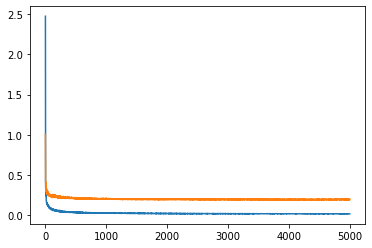

In [473]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.show()

# We now get the RMSE for both train and test sets to see if they differ by much

# Make predictions based on train set and get a root mean squared error 

In [474]:
from sklearn.metrics import mean_squared_error
import math
from numpy import concatenate

train_yhat = lstm_aadt_norm_model.predict(train_X)

mse = mean_squared_error(train_y, train_yhat)
rmse = math.sqrt(mse)

In [464]:
print('Train RMSE: ' + str(rmse))

Train RMSE: 0.05580061006753393


In [465]:
train_yhat_plot = [train_yhat[i][6] for i in range(len(train_yhat))]
train_y_plot = [train_y[i][6] for i in range(len(train_y))]

# Make predictions based on test set and get a root mean squared error 

In [476]:
from sklearn.metrics import mean_squared_error
import math

test_yhat = lstm_aadt_norm_model.predict(test_X_vector)
test_yhat_SR = [test_yhat[i][6] for i in range(len(test_yhat))]
mse = mean_squared_error(test_y_vector, test_yhat)
rmse_1 = math.sqrt(mse)

In [477]:
print('Test RMSE: ' + str(rmse_1))

Test RMSE: 0.5399255196544687


In [478]:
test_y_1 = np.array([row[0] for row in test_y])
test_y_1.shape

(111, 7)

In [479]:
test_y_1_SR = [test_y_1[i][6] for i in range(len(test_y_1))]

In [480]:
test_yhat.shape

(111, 7)

In [481]:
test_y[:, 0, :].shape

(111, 7)

In [482]:
from sklearn.metrics import mean_squared_error
import math

test_yhat = lstm_aadt_norm_model.predict(test_X)
test_yhat_SR = [test_yhat[i][6] for i in range(len(test_yhat))]
mse = mean_squared_error(test_y_1_SR, test_yhat_SR)
rmse_1 = math.sqrt(mse)

In [483]:
print('Test RMSE: ' + str(rmse_1))

Test RMSE: 0.7824408506243736


In [484]:
test_y_2 = np.array([row[1] for row in test_y])
test_y_2.shape

(111, 7)

In [485]:
test_y_2_SR = [test_y_2[i][6] for i in range(len(test_y_2))]

In [486]:
test_X_temp_2 = test_X[:, :-1, :]
test_X_temp_2[0].shape

test_X_2 = np.empty([111, 18, 7])

for idx, element in enumerate(test_X_temp_2):
    test_X_2[idx] = np.append(element, [test_yhat[idx]], axis=0)
#     break

In [487]:
from sklearn.metrics import mean_squared_error
import math

test_yhat_2 = lstm_aadt_norm_model.predict(test_X_2)
test_yhat_2_SR = [test_yhat_2[i][6] for i in range(len(test_yhat_2))]
mse = mean_squared_error(test_y_2_SR, test_yhat_2_SR)
rmse_2 = math.sqrt(mse)

In [488]:
print('Test RMSE: ' + str(rmse_2))

Test RMSE: 0.785682122112084


In [489]:
test_y_3 = np.array([row[2] for row in test_y])
test_y_3.shape

(111, 7)

In [490]:
test_y_3_SR = [test_y_3[i][6] for i in range(len(test_y_3))]

In [491]:
test_X_temp_3 = test_X_2[:, :-1, :]
test_X_temp_3[0].shape

test_X_3 = np.empty([111, 18, 7])

for idx, element in enumerate(test_X_temp_3):
    test_X_3[idx] = np.append(element, [test_yhat_2[idx]], axis=0)
#     break

In [492]:
from sklearn.metrics import mean_squared_error
import math

test_yhat_3 = lstm_aadt_norm_model.predict(test_X_3)
test_yhat_3_SR = [test_yhat_3[i][6] for i in range(len(test_yhat_3))]
mse = mean_squared_error(test_y_3_SR, test_yhat_3_SR)
rmse_3 = math.sqrt(mse)

In [493]:
print('Test RMSE: ' + str(rmse_3))

Test RMSE: 0.8029654108103573


In [494]:
test_y_4 = np.array([row[3] for row in test_y])
test_y_4.shape

(111, 7)

In [495]:
test_y_4_SR = [test_y_4[i][6] for i in range(len(test_y_4))]

In [496]:
test_X_temp_4 = test_X_3[:, :-1, :]
test_X_temp_4[0].shape

test_X_4 = np.empty([111, 18, 7])

for idx, element in enumerate(test_X_temp_4):
    test_X_4[idx] = np.append(element, [test_yhat_3[idx]], axis=0)
#     break

In [497]:
from sklearn.metrics import mean_squared_error
import math

test_yhat_4 = lstm_aadt_norm_model.predict(test_X_4)
test_yhat_4_SR = [test_yhat_4[i][6] for i in range(len(test_yhat_4))]
mse = mean_squared_error(test_y_4_SR, test_yhat_4_SR)
rmse_4 = math.sqrt(mse)

In [498]:
print('Test RMSE: ' + str(rmse_4))

Test RMSE: 0.8094471256126082


In [499]:
test_yhat_plot = [test_yhat_SR[i] for i in range(len(test_yhat_SR))]
test_y_plot = [test_y_1_SR[i] for i in range(len(test_y_1_SR))]

# Plot train labels along with train predictions

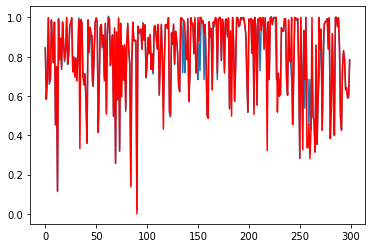

In [500]:
from matplotlib import pyplot

pyplot.plot(train_yhat_plot, label='actual')
pyplot.plot(train_y_plot, color='red', label='predicted')
pyplot.show()

# Plot test labels along with test predictions

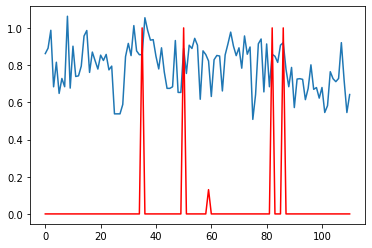

In [501]:
from matplotlib import pyplot

pyplot.plot(test_yhat_plot, label='actual')
pyplot.plot(test_y_plot, color='red', label='predicted')
pyplot.show()

# Start of experiment with both the addition of historical aadt data and normalization

In [157]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_with_Historical_AADT.csv')

# get each separate time series as an individual list and append each of these lists to a master list

In [158]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []
list_of_row_components = []

for i in range(1, 162):
    
    current_row = df.iloc[i]
    
    bridge_id = current_row.iloc[0]
    
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []
        
        current_row_components_replaced.append(bridge_id)

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

# Ensure each element in the list of lists is a float

In [159]:
for idx, element in enumerate(list_of_row_components):
    for i in range(1, len(element)):
        list_of_row_components[idx][i] = float(list_of_row_components[idx][i])

# Swap last entry with second entry in time series to make the output predictor variable Sufficiency Rating

In [160]:
for idx, component in enumerate(list_of_row_components):
    temp = component[6]
    list_of_row_components[idx][6] = list_of_row_components[idx][1]
    list_of_row_components[idx][1] = temp

# Remove the bridge id's from each time series

In [161]:
for idx, element in enumerate(list_of_row_components):
    list_of_row_components[idx].pop(0)

# View one time series

In [162]:
for i in range(22):
    print(len(list_of_row_components[i]))

15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


# Get length of list of lists

In [163]:
len(list_of_row_components)

3542

# Convert format of list to have a sinlge time series for each index

In [164]:
import numpy as np

list_of_examples = []
temp_list = []

max_num = 22
iter = 0;

for row_component in list_of_row_components:
    if iter == max_num:
        list_of_examples.append(np.array(temp_list))
        temp_list = []
        iter = 0
        
    temp_list.append(np.array(row_component))
    iter += 1

list_of_examples = np.array(list_of_examples)

In [165]:
list_of_examples.shape

(160, 22, 15)

# Perform train test split for dataset

In [166]:
from sklearn.model_selection import train_test_split

n_train_periods = 96
n_valid_set = 32
n_test_set = 32
train = list_of_examples[:n_train_periods, :]
valid = list_of_examples[n_train_periods:n_train_periods+n_valid_set, :]
test = list_of_examples[n_train_periods+n_valid_set:n_train_periods+n_valid_set+n_test_set, :]

# split into input and outputs
train_X, train_y = train[:, :-4, :], train[:, -4, :]
valid_X, valid_y = valid[:, :-4, :], valid[:, -4, :]
test_X, test_y = test[:, :-4, :], test[:, -4:]


In [167]:
train_X.shape

(96, 18, 15)

In [168]:
train_y.shape

(96, 15)

In [169]:
valid_X.shape

(32, 18, 15)

In [170]:
valid_y.shape

(32, 15)

In [171]:
test_X.shape

(32, 18, 15)

In [172]:
test_y.shape

(32, 4, 15)

In [173]:
train_y[0]

array([1.92000000e+01, 8.50000000e+01, 6.70000000e+04, 1.95300000e+03,
       6.00000000e+00, 5.89000000e+01, 9.10000000e+00, 4.63663664e-02,
       1.70570571e-01, 6.53153153e-01, 2.29900000e+00, 9.40000000e+04,
       6.00000000e+03, 4.00000000e+03, 6.40000000e-01])

# Apply MinMaxScaler on data

In [174]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for idx, x in enumerate(train_X):
    train_X[idx] = scaler.fit_transform(x)
    
train_y = scaler.fit_transform(train_y)

for idx, x in enumerate(valid_X):
    valid_X[idx] = scaler.fit_transform(x)
    
valid_y = scaler.fit_transform(valid_y)

for idx, x in enumerate(test_X):
    test_X[idx] = scaler.fit_transform(x)

for idx, x in enumerate(test_y):
    test_y[idx] = scaler.fit_transform(x)

In [175]:
train_X.shape

(96, 18, 15)

In [176]:
train_y.shape

(96, 15)

In [177]:
print("Shape of train_X: " + str(train_X.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of valid_X: " + str(valid_X.shape))
print("Shape of valid_y: " + str(valid_y.shape))
print("Shape of test_X: " + str(test_X.shape))
print("Shape of test_y: " + str(test_y.shape))

Shape of train_X: (96, 18, 15)
Shape of train_y: (96, 15)
Shape of valid_X: (32, 18, 15)
Shape of valid_y: (32, 15)
Shape of test_X: (32, 18, 15)
Shape of test_y: (32, 4, 15)


In [179]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input, Model

from tcn import TCN, tcn_full_summary

batch_size, timesteps, input_dim = None, 18, 15

i = Input(batch_shape=(batch_size, timesteps, input_dim))

o = TCN(return_sequences=False)(i)
o = Dense(15)(o)

lstm_aadt_norm_model = Model(inputs=[i], outputs=[o])
lstm_aadt_norm_model.compile(optimizer='adam', loss='mae')

tcn_full_summary(lstm_aadt_norm_model, expand_residual_blocks=False)

history = lstm_aadt_norm_model.fit(train_X, train_y, epochs=20000, batch_size=32, validation_data=(valid_X, valid_y), verbose=2, shuffle=False)

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 18, 15)]          0         
_________________________________________________________________
residual_block_0 (ResidualBl [(None, 18, 64), (None, 1 11264     
_________________________________________________________________
residual_block_1 (ResidualBl [(None, 18, 64), (None, 1 16512     
_________________________________________________________________
residual_block_2 (ResidualBl [(None, 18, 64), (None, 1 16512     
_________________________________________________________________
residual_block_3 (ResidualBl [(None, 18, 64), (None, 1 16512     
_________________________________________________________________
residual_block_4 (ResidualBl [(None, 18, 64), (None, 1 16512     
_________________________________________________________________
residual_block_5 (ResidualBl [(None, 18, 64), (None, 

Epoch 116/20000
3/3 - 0s - loss: 0.0358 - val_loss: 0.5023
Epoch 117/20000
3/3 - 0s - loss: 0.0365 - val_loss: 0.5001
Epoch 118/20000
3/3 - 0s - loss: 0.0268 - val_loss: 0.5005
Epoch 119/20000
3/3 - 0s - loss: 0.0350 - val_loss: 0.5009
Epoch 120/20000
3/3 - 0s - loss: 0.0307 - val_loss: 0.4964
Epoch 121/20000
3/3 - 0s - loss: 0.0354 - val_loss: 0.5021
Epoch 122/20000
3/3 - 0s - loss: 0.0309 - val_loss: 0.4942
Epoch 123/20000
3/3 - 0s - loss: 0.0277 - val_loss: 0.5014
Epoch 124/20000
3/3 - 0s - loss: 0.0313 - val_loss: 0.4952
Epoch 125/20000
3/3 - 0s - loss: 0.0286 - val_loss: 0.4936
Epoch 126/20000
3/3 - 0s - loss: 0.0284 - val_loss: 0.5018
Epoch 127/20000
3/3 - 0s - loss: 0.0331 - val_loss: 0.4924
Epoch 128/20000
3/3 - 0s - loss: 0.0361 - val_loss: 0.4993
Epoch 129/20000
3/3 - 0s - loss: 0.0326 - val_loss: 0.4980
Epoch 130/20000
3/3 - 0s - loss: 0.0367 - val_loss: 0.4906
Epoch 131/20000
3/3 - 0s - loss: 0.0356 - val_loss: 0.4921
Epoch 132/20000
3/3 - 0s - loss: 0.0320 - val_loss: 0.49

Epoch 255/20000
3/3 - 0s - loss: 0.0218 - val_loss: 0.4631
Epoch 256/20000
3/3 - 0s - loss: 0.0240 - val_loss: 0.4567
Epoch 257/20000
3/3 - 0s - loss: 0.0243 - val_loss: 0.4602
Epoch 258/20000
3/3 - 0s - loss: 0.0226 - val_loss: 0.4582
Epoch 259/20000
3/3 - 0s - loss: 0.0245 - val_loss: 0.4614
Epoch 260/20000
3/3 - 0s - loss: 0.0268 - val_loss: 0.4569
Epoch 261/20000
3/3 - 0s - loss: 0.0257 - val_loss: 0.4567
Epoch 262/20000
3/3 - 0s - loss: 0.0211 - val_loss: 0.4607
Epoch 263/20000
3/3 - 0s - loss: 0.0260 - val_loss: 0.4565
Epoch 264/20000
3/3 - 0s - loss: 0.0255 - val_loss: 0.4572
Epoch 265/20000
3/3 - 0s - loss: 0.0272 - val_loss: 0.4558
Epoch 266/20000
3/3 - 0s - loss: 0.0255 - val_loss: 0.4561
Epoch 267/20000
3/3 - 0s - loss: 0.0245 - val_loss: 0.4524
Epoch 268/20000
3/3 - 0s - loss: 0.0229 - val_loss: 0.4556
Epoch 269/20000
3/3 - 0s - loss: 0.0214 - val_loss: 0.4532
Epoch 270/20000
3/3 - 0s - loss: 0.0256 - val_loss: 0.4570
Epoch 271/20000
3/3 - 0s - loss: 0.0224 - val_loss: 0.45

Epoch 394/20000
3/3 - 0s - loss: 0.0210 - val_loss: 0.4309
Epoch 395/20000
3/3 - 0s - loss: 0.0186 - val_loss: 0.4327
Epoch 396/20000
3/3 - 0s - loss: 0.0186 - val_loss: 0.4288
Epoch 397/20000
3/3 - 0s - loss: 0.0188 - val_loss: 0.4297
Epoch 398/20000
3/3 - 0s - loss: 0.0183 - val_loss: 0.4320
Epoch 399/20000
3/3 - 0s - loss: 0.0191 - val_loss: 0.4296
Epoch 400/20000
3/3 - 0s - loss: 0.0215 - val_loss: 0.4302
Epoch 401/20000
3/3 - 0s - loss: 0.0196 - val_loss: 0.4300
Epoch 402/20000
3/3 - 0s - loss: 0.0207 - val_loss: 0.4307
Epoch 403/20000
3/3 - 0s - loss: 0.0207 - val_loss: 0.4285
Epoch 404/20000
3/3 - 0s - loss: 0.0195 - val_loss: 0.4293
Epoch 405/20000
3/3 - 0s - loss: 0.0187 - val_loss: 0.4301
Epoch 406/20000
3/3 - 0s - loss: 0.0201 - val_loss: 0.4315
Epoch 407/20000
3/3 - 0s - loss: 0.0202 - val_loss: 0.4268
Epoch 408/20000
3/3 - 0s - loss: 0.0182 - val_loss: 0.4305
Epoch 409/20000
3/3 - 0s - loss: 0.0215 - val_loss: 0.4278
Epoch 410/20000
3/3 - 0s - loss: 0.0201 - val_loss: 0.42

Epoch 533/20000
3/3 - 0s - loss: 0.0180 - val_loss: 0.4099
Epoch 534/20000
3/3 - 0s - loss: 0.0159 - val_loss: 0.4114
Epoch 535/20000
3/3 - 0s - loss: 0.0195 - val_loss: 0.4117
Epoch 536/20000
3/3 - 0s - loss: 0.0160 - val_loss: 0.4111
Epoch 537/20000
3/3 - 0s - loss: 0.0180 - val_loss: 0.4110
Epoch 538/20000
3/3 - 0s - loss: 0.0164 - val_loss: 0.4106
Epoch 539/20000
3/3 - 0s - loss: 0.0169 - val_loss: 0.4091
Epoch 540/20000
3/3 - 0s - loss: 0.0165 - val_loss: 0.4093
Epoch 541/20000
3/3 - 0s - loss: 0.0158 - val_loss: 0.4083
Epoch 542/20000
3/3 - 0s - loss: 0.0169 - val_loss: 0.4106
Epoch 543/20000
3/3 - 0s - loss: 0.0149 - val_loss: 0.4080
Epoch 544/20000
3/3 - 0s - loss: 0.0156 - val_loss: 0.4104
Epoch 545/20000
3/3 - 0s - loss: 0.0147 - val_loss: 0.4080
Epoch 546/20000
3/3 - 0s - loss: 0.0141 - val_loss: 0.4091
Epoch 547/20000
3/3 - 0s - loss: 0.0160 - val_loss: 0.4082
Epoch 548/20000
3/3 - 0s - loss: 0.0150 - val_loss: 0.4058
Epoch 549/20000
3/3 - 0s - loss: 0.0192 - val_loss: 0.40

Epoch 672/20000
3/3 - 0s - loss: 0.0149 - val_loss: 0.3924
Epoch 673/20000
3/3 - 0s - loss: 0.0145 - val_loss: 0.3971
Epoch 674/20000
3/3 - 0s - loss: 0.0132 - val_loss: 0.3965
Epoch 675/20000
3/3 - 0s - loss: 0.0125 - val_loss: 0.3945
Epoch 676/20000
3/3 - 0s - loss: 0.0164 - val_loss: 0.3967
Epoch 677/20000
3/3 - 0s - loss: 0.0167 - val_loss: 0.3962
Epoch 678/20000
3/3 - 0s - loss: 0.0161 - val_loss: 0.3940
Epoch 679/20000
3/3 - 0s - loss: 0.0143 - val_loss: 0.3936
Epoch 680/20000
3/3 - 0s - loss: 0.0143 - val_loss: 0.3952
Epoch 681/20000
3/3 - 0s - loss: 0.0162 - val_loss: 0.3935
Epoch 682/20000
3/3 - 0s - loss: 0.0149 - val_loss: 0.3923
Epoch 683/20000
3/3 - 0s - loss: 0.0139 - val_loss: 0.3953
Epoch 684/20000
3/3 - 0s - loss: 0.0148 - val_loss: 0.3947
Epoch 685/20000
3/3 - 0s - loss: 0.0158 - val_loss: 0.3912
Epoch 686/20000
3/3 - 0s - loss: 0.0188 - val_loss: 0.3944
Epoch 687/20000
3/3 - 0s - loss: 0.0181 - val_loss: 0.3945
Epoch 688/20000
3/3 - 0s - loss: 0.0172 - val_loss: 0.39

Epoch 811/20000
3/3 - 0s - loss: 0.0135 - val_loss: 0.3804
Epoch 812/20000
3/3 - 0s - loss: 0.0157 - val_loss: 0.3812
Epoch 813/20000
3/3 - 0s - loss: 0.0155 - val_loss: 0.3809
Epoch 814/20000
3/3 - 0s - loss: 0.0152 - val_loss: 0.3806
Epoch 815/20000
3/3 - 0s - loss: 0.0148 - val_loss: 0.3795
Epoch 816/20000
3/3 - 0s - loss: 0.0136 - val_loss: 0.3806
Epoch 817/20000
3/3 - 0s - loss: 0.0145 - val_loss: 0.3791
Epoch 818/20000
3/3 - 0s - loss: 0.0146 - val_loss: 0.3794
Epoch 819/20000
3/3 - 0s - loss: 0.0139 - val_loss: 0.3823
Epoch 820/20000
3/3 - 0s - loss: 0.0155 - val_loss: 0.3778
Epoch 821/20000
3/3 - 0s - loss: 0.0154 - val_loss: 0.3781
Epoch 822/20000
3/3 - 0s - loss: 0.0151 - val_loss: 0.3776
Epoch 823/20000
3/3 - 0s - loss: 0.0141 - val_loss: 0.3795
Epoch 824/20000
3/3 - 0s - loss: 0.0134 - val_loss: 0.3776
Epoch 825/20000
3/3 - 0s - loss: 0.0137 - val_loss: 0.3792
Epoch 826/20000
3/3 - 0s - loss: 0.0146 - val_loss: 0.3791
Epoch 827/20000
3/3 - 0s - loss: 0.0146 - val_loss: 0.37

Epoch 950/20000
3/3 - 0s - loss: 0.0128 - val_loss: 0.3687
Epoch 951/20000
3/3 - 0s - loss: 0.0120 - val_loss: 0.3663
Epoch 952/20000
3/3 - 0s - loss: 0.0143 - val_loss: 0.3657
Epoch 953/20000
3/3 - 0s - loss: 0.0130 - val_loss: 0.3684
Epoch 954/20000
3/3 - 0s - loss: 0.0149 - val_loss: 0.3668
Epoch 955/20000
3/3 - 0s - loss: 0.0147 - val_loss: 0.3670
Epoch 956/20000
3/3 - 0s - loss: 0.0119 - val_loss: 0.3673
Epoch 957/20000
3/3 - 0s - loss: 0.0122 - val_loss: 0.3648
Epoch 958/20000
3/3 - 0s - loss: 0.0125 - val_loss: 0.3672
Epoch 959/20000
3/3 - 0s - loss: 0.0124 - val_loss: 0.3691
Epoch 960/20000
3/3 - 0s - loss: 0.0145 - val_loss: 0.3655
Epoch 961/20000
3/3 - 0s - loss: 0.0132 - val_loss: 0.3673
Epoch 962/20000
3/3 - 0s - loss: 0.0131 - val_loss: 0.3670
Epoch 963/20000
3/3 - 0s - loss: 0.0116 - val_loss: 0.3686
Epoch 964/20000
3/3 - 0s - loss: 0.0124 - val_loss: 0.3662
Epoch 965/20000
3/3 - 0s - loss: 0.0128 - val_loss: 0.3656
Epoch 966/20000
3/3 - 0s - loss: 0.0114 - val_loss: 0.36

Epoch 1088/20000
3/3 - 0s - loss: 0.0139 - val_loss: 0.3586
Epoch 1089/20000
3/3 - 0s - loss: 0.0114 - val_loss: 0.3589
Epoch 1090/20000
3/3 - 0s - loss: 0.0110 - val_loss: 0.3597
Epoch 1091/20000
3/3 - 0s - loss: 0.0104 - val_loss: 0.3583
Epoch 1092/20000
3/3 - 0s - loss: 0.0112 - val_loss: 0.3590
Epoch 1093/20000
3/3 - 0s - loss: 0.0117 - val_loss: 0.3589
Epoch 1094/20000
3/3 - 0s - loss: 0.0118 - val_loss: 0.3574
Epoch 1095/20000
3/3 - 0s - loss: 0.0119 - val_loss: 0.3580
Epoch 1096/20000
3/3 - 0s - loss: 0.0120 - val_loss: 0.3603
Epoch 1097/20000
3/3 - 0s - loss: 0.0118 - val_loss: 0.3572
Epoch 1098/20000
3/3 - 0s - loss: 0.0139 - val_loss: 0.3591
Epoch 1099/20000
3/3 - 0s - loss: 0.0133 - val_loss: 0.3604
Epoch 1100/20000
3/3 - 0s - loss: 0.0133 - val_loss: 0.3569
Epoch 1101/20000
3/3 - 0s - loss: 0.0117 - val_loss: 0.3586
Epoch 1102/20000
3/3 - 0s - loss: 0.0114 - val_loss: 0.3595
Epoch 1103/20000
3/3 - 0s - loss: 0.0123 - val_loss: 0.3579
Epoch 1104/20000
3/3 - 0s - loss: 0.0124

Epoch 1225/20000
3/3 - 0s - loss: 0.0113 - val_loss: 0.3512
Epoch 1226/20000
3/3 - 0s - loss: 0.0115 - val_loss: 0.3525
Epoch 1227/20000
3/3 - 0s - loss: 0.0117 - val_loss: 0.3527
Epoch 1228/20000
3/3 - 0s - loss: 0.0115 - val_loss: 0.3503
Epoch 1229/20000
3/3 - 0s - loss: 0.0102 - val_loss: 0.3523
Epoch 1230/20000
3/3 - 0s - loss: 0.0111 - val_loss: 0.3506
Epoch 1231/20000
3/3 - 0s - loss: 0.0102 - val_loss: 0.3504
Epoch 1232/20000
3/3 - 0s - loss: 0.0094 - val_loss: 0.3511
Epoch 1233/20000
3/3 - 0s - loss: 0.0100 - val_loss: 0.3514
Epoch 1234/20000
3/3 - 0s - loss: 0.0104 - val_loss: 0.3514
Epoch 1235/20000
3/3 - 0s - loss: 0.0123 - val_loss: 0.3512
Epoch 1236/20000
3/3 - 0s - loss: 0.0110 - val_loss: 0.3523
Epoch 1237/20000
3/3 - 0s - loss: 0.0112 - val_loss: 0.3500
Epoch 1238/20000
3/3 - 0s - loss: 0.0111 - val_loss: 0.3499
Epoch 1239/20000
3/3 - 0s - loss: 0.0117 - val_loss: 0.3521
Epoch 1240/20000
3/3 - 0s - loss: 0.0124 - val_loss: 0.3505
Epoch 1241/20000
3/3 - 0s - loss: 0.0117

Epoch 1362/20000
3/3 - 0s - loss: 0.0105 - val_loss: 0.3447
Epoch 1363/20000
3/3 - 0s - loss: 0.0110 - val_loss: 0.3451
Epoch 1364/20000
3/3 - 0s - loss: 0.0103 - val_loss: 0.3444
Epoch 1365/20000
3/3 - 0s - loss: 0.0113 - val_loss: 0.3457
Epoch 1366/20000
3/3 - 0s - loss: 0.0110 - val_loss: 0.3442
Epoch 1367/20000
3/3 - 0s - loss: 0.0106 - val_loss: 0.3434
Epoch 1368/20000
3/3 - 0s - loss: 0.0121 - val_loss: 0.3462
Epoch 1369/20000
3/3 - 0s - loss: 0.0105 - val_loss: 0.3448
Epoch 1370/20000
3/3 - 0s - loss: 0.0087 - val_loss: 0.3434
Epoch 1371/20000
3/3 - 0s - loss: 0.0084 - val_loss: 0.3443
Epoch 1372/20000
3/3 - 0s - loss: 0.0091 - val_loss: 0.3447
Epoch 1373/20000
3/3 - 0s - loss: 0.0109 - val_loss: 0.3450
Epoch 1374/20000
3/3 - 0s - loss: 0.0114 - val_loss: 0.3443
Epoch 1375/20000
3/3 - 0s - loss: 0.0087 - val_loss: 0.3453
Epoch 1376/20000
3/3 - 0s - loss: 0.0110 - val_loss: 0.3459
Epoch 1377/20000
3/3 - 0s - loss: 0.0100 - val_loss: 0.3431
Epoch 1378/20000
3/3 - 0s - loss: 0.0114

Epoch 1499/20000
3/3 - 0s - loss: 0.0117 - val_loss: 0.3368
Epoch 1500/20000
3/3 - 0s - loss: 0.0109 - val_loss: 0.3386
Epoch 1501/20000
3/3 - 0s - loss: 0.0097 - val_loss: 0.3394
Epoch 1502/20000
3/3 - 0s - loss: 0.0110 - val_loss: 0.3370
Epoch 1503/20000
3/3 - 0s - loss: 0.0103 - val_loss: 0.3380
Epoch 1504/20000
3/3 - 0s - loss: 0.0090 - val_loss: 0.3383
Epoch 1505/20000
3/3 - 0s - loss: 0.0095 - val_loss: 0.3368
Epoch 1506/20000
3/3 - 0s - loss: 0.0097 - val_loss: 0.3395
Epoch 1507/20000
3/3 - 0s - loss: 0.0104 - val_loss: 0.3375
Epoch 1508/20000
3/3 - 0s - loss: 0.0103 - val_loss: 0.3383
Epoch 1509/20000
3/3 - 0s - loss: 0.0109 - val_loss: 0.3358
Epoch 1510/20000
3/3 - 0s - loss: 0.0098 - val_loss: 0.3372
Epoch 1511/20000
3/3 - 0s - loss: 0.0090 - val_loss: 0.3377
Epoch 1512/20000
3/3 - 0s - loss: 0.0099 - val_loss: 0.3373
Epoch 1513/20000
3/3 - 0s - loss: 0.0109 - val_loss: 0.3379
Epoch 1514/20000
3/3 - 0s - loss: 0.0112 - val_loss: 0.3375
Epoch 1515/20000
3/3 - 0s - loss: 0.0106

Epoch 1636/20000
3/3 - 0s - loss: 0.0102 - val_loss: 0.3335
Epoch 1637/20000
3/3 - 0s - loss: 0.0092 - val_loss: 0.3322
Epoch 1638/20000
3/3 - 0s - loss: 0.0095 - val_loss: 0.3323
Epoch 1639/20000
3/3 - 0s - loss: 0.0093 - val_loss: 0.3346
Epoch 1640/20000
3/3 - 0s - loss: 0.0085 - val_loss: 0.3322
Epoch 1641/20000
3/3 - 0s - loss: 0.0090 - val_loss: 0.3324
Epoch 1642/20000
3/3 - 0s - loss: 0.0083 - val_loss: 0.3348
Epoch 1643/20000
3/3 - 0s - loss: 0.0092 - val_loss: 0.3327
Epoch 1644/20000
3/3 - 0s - loss: 0.0093 - val_loss: 0.3346
Epoch 1645/20000
3/3 - 0s - loss: 0.0083 - val_loss: 0.3343
Epoch 1646/20000
3/3 - 0s - loss: 0.0076 - val_loss: 0.3339
Epoch 1647/20000
3/3 - 0s - loss: 0.0088 - val_loss: 0.3337
Epoch 1648/20000
3/3 - 0s - loss: 0.0099 - val_loss: 0.3347
Epoch 1649/20000
3/3 - 0s - loss: 0.0088 - val_loss: 0.3332
Epoch 1650/20000
3/3 - 0s - loss: 0.0110 - val_loss: 0.3344
Epoch 1651/20000
3/3 - 0s - loss: 0.0102 - val_loss: 0.3348
Epoch 1652/20000
3/3 - 0s - loss: 0.0107

Epoch 1773/20000
3/3 - 0s - loss: 0.0094 - val_loss: 0.3270
Epoch 1774/20000
3/3 - 0s - loss: 0.0085 - val_loss: 0.3272
Epoch 1775/20000
3/3 - 0s - loss: 0.0092 - val_loss: 0.3282
Epoch 1776/20000
3/3 - 0s - loss: 0.0097 - val_loss: 0.3274
Epoch 1777/20000
3/3 - 0s - loss: 0.0100 - val_loss: 0.3278
Epoch 1778/20000
3/3 - 0s - loss: 0.0096 - val_loss: 0.3264
Epoch 1779/20000
3/3 - 0s - loss: 0.0088 - val_loss: 0.3285
Epoch 1780/20000
3/3 - 0s - loss: 0.0078 - val_loss: 0.3266
Epoch 1781/20000
3/3 - 0s - loss: 0.0081 - val_loss: 0.3263
Epoch 1782/20000
3/3 - 0s - loss: 0.0093 - val_loss: 0.3268
Epoch 1783/20000
3/3 - 0s - loss: 0.0097 - val_loss: 0.3262
Epoch 1784/20000
3/3 - 0s - loss: 0.0098 - val_loss: 0.3277
Epoch 1785/20000
3/3 - 0s - loss: 0.0093 - val_loss: 0.3281
Epoch 1786/20000
3/3 - 0s - loss: 0.0078 - val_loss: 0.3281
Epoch 1787/20000
3/3 - 0s - loss: 0.0079 - val_loss: 0.3268
Epoch 1788/20000
3/3 - 0s - loss: 0.0080 - val_loss: 0.3283
Epoch 1789/20000
3/3 - 0s - loss: 0.0084

Epoch 1910/20000
3/3 - 0s - loss: 0.0083 - val_loss: 0.3206
Epoch 1911/20000
3/3 - 0s - loss: 0.0087 - val_loss: 0.3234
Epoch 1912/20000
3/3 - 0s - loss: 0.0083 - val_loss: 0.3230
Epoch 1913/20000
3/3 - 0s - loss: 0.0084 - val_loss: 0.3225
Epoch 1914/20000
3/3 - 0s - loss: 0.0082 - val_loss: 0.3222
Epoch 1915/20000
3/3 - 0s - loss: 0.0087 - val_loss: 0.3228
Epoch 1916/20000
3/3 - 0s - loss: 0.0091 - val_loss: 0.3218
Epoch 1917/20000
3/3 - 0s - loss: 0.0078 - val_loss: 0.3215
Epoch 1918/20000
3/3 - 0s - loss: 0.0086 - val_loss: 0.3222
Epoch 1919/20000
3/3 - 0s - loss: 0.0080 - val_loss: 0.3212
Epoch 1920/20000
3/3 - 0s - loss: 0.0079 - val_loss: 0.3214
Epoch 1921/20000
3/3 - 0s - loss: 0.0095 - val_loss: 0.3223
Epoch 1922/20000
3/3 - 0s - loss: 0.0081 - val_loss: 0.3220
Epoch 1923/20000
3/3 - 0s - loss: 0.0088 - val_loss: 0.3222
Epoch 1924/20000
3/3 - 0s - loss: 0.0092 - val_loss: 0.3208
Epoch 1925/20000
3/3 - 0s - loss: 0.0093 - val_loss: 0.3218
Epoch 1926/20000
3/3 - 0s - loss: 0.0086

Epoch 2047/20000
3/3 - 0s - loss: 0.0085 - val_loss: 0.3171
Epoch 2048/20000
3/3 - 0s - loss: 0.0095 - val_loss: 0.3159
Epoch 2049/20000
3/3 - 0s - loss: 0.0082 - val_loss: 0.3165
Epoch 2050/20000
3/3 - 0s - loss: 0.0075 - val_loss: 0.3163
Epoch 2051/20000
3/3 - 0s - loss: 0.0076 - val_loss: 0.3150
Epoch 2052/20000
3/3 - 0s - loss: 0.0082 - val_loss: 0.3163
Epoch 2053/20000
3/3 - 0s - loss: 0.0086 - val_loss: 0.3170
Epoch 2054/20000
3/3 - 0s - loss: 0.0083 - val_loss: 0.3142
Epoch 2055/20000
3/3 - 0s - loss: 0.0088 - val_loss: 0.3157
Epoch 2056/20000
3/3 - 0s - loss: 0.0084 - val_loss: 0.3158
Epoch 2057/20000
3/3 - 0s - loss: 0.0079 - val_loss: 0.3152
Epoch 2058/20000
3/3 - 0s - loss: 0.0075 - val_loss: 0.3157
Epoch 2059/20000
3/3 - 0s - loss: 0.0067 - val_loss: 0.3154
Epoch 2060/20000
3/3 - 0s - loss: 0.0079 - val_loss: 0.3158
Epoch 2061/20000
3/3 - 0s - loss: 0.0087 - val_loss: 0.3152
Epoch 2062/20000
3/3 - 0s - loss: 0.0089 - val_loss: 0.3148
Epoch 2063/20000
3/3 - 0s - loss: 0.0075

Epoch 2184/20000
3/3 - 0s - loss: 0.0082 - val_loss: 0.3108
Epoch 2185/20000
3/3 - 0s - loss: 0.0080 - val_loss: 0.3104
Epoch 2186/20000
3/3 - 0s - loss: 0.0077 - val_loss: 0.3105
Epoch 2187/20000
3/3 - 0s - loss: 0.0088 - val_loss: 0.3103
Epoch 2188/20000
3/3 - 0s - loss: 0.0081 - val_loss: 0.3099
Epoch 2189/20000
3/3 - 0s - loss: 0.0083 - val_loss: 0.3101
Epoch 2190/20000
3/3 - 0s - loss: 0.0078 - val_loss: 0.3107
Epoch 2191/20000
3/3 - 0s - loss: 0.0080 - val_loss: 0.3101
Epoch 2192/20000
3/3 - 0s - loss: 0.0090 - val_loss: 0.3096
Epoch 2193/20000
3/3 - 0s - loss: 0.0084 - val_loss: 0.3108
Epoch 2194/20000
3/3 - 0s - loss: 0.0082 - val_loss: 0.3098
Epoch 2195/20000
3/3 - 0s - loss: 0.0088 - val_loss: 0.3104
Epoch 2196/20000
3/3 - 0s - loss: 0.0073 - val_loss: 0.3105
Epoch 2197/20000
3/3 - 0s - loss: 0.0082 - val_loss: 0.3096
Epoch 2198/20000
3/3 - 0s - loss: 0.0079 - val_loss: 0.3099
Epoch 2199/20000
3/3 - 0s - loss: 0.0071 - val_loss: 0.3103
Epoch 2200/20000
3/3 - 0s - loss: 0.0071

Epoch 2321/20000
3/3 - 0s - loss: 0.0069 - val_loss: 0.3056
Epoch 2322/20000
3/3 - 0s - loss: 0.0082 - val_loss: 0.3056
Epoch 2323/20000
3/3 - 0s - loss: 0.0090 - val_loss: 0.3043
Epoch 2324/20000
3/3 - 0s - loss: 0.0083 - val_loss: 0.3049
Epoch 2325/20000
3/3 - 0s - loss: 0.0077 - val_loss: 0.3069
Epoch 2326/20000
3/3 - 0s - loss: 0.0083 - val_loss: 0.3043
Epoch 2327/20000
3/3 - 0s - loss: 0.0087 - val_loss: 0.3048
Epoch 2328/20000
3/3 - 0s - loss: 0.0083 - val_loss: 0.3045
Epoch 2329/20000
3/3 - 0s - loss: 0.0076 - val_loss: 0.3053
Epoch 2330/20000
3/3 - 0s - loss: 0.0084 - val_loss: 0.3056
Epoch 2331/20000
3/3 - 0s - loss: 0.0063 - val_loss: 0.3044
Epoch 2332/20000
3/3 - 0s - loss: 0.0075 - val_loss: 0.3062
Epoch 2333/20000
3/3 - 0s - loss: 0.0075 - val_loss: 0.3057
Epoch 2334/20000
3/3 - 0s - loss: 0.0073 - val_loss: 0.3035
Epoch 2335/20000
3/3 - 0s - loss: 0.0065 - val_loss: 0.3047
Epoch 2336/20000
3/3 - 0s - loss: 0.0073 - val_loss: 0.3051
Epoch 2337/20000
3/3 - 0s - loss: 0.0076

Epoch 2458/20000
3/3 - 0s - loss: 0.0069 - val_loss: 0.2987
Epoch 2459/20000
3/3 - 0s - loss: 0.0073 - val_loss: 0.3006
Epoch 2460/20000
3/3 - 0s - loss: 0.0068 - val_loss: 0.2990
Epoch 2461/20000
3/3 - 0s - loss: 0.0077 - val_loss: 0.3002
Epoch 2462/20000
3/3 - 0s - loss: 0.0083 - val_loss: 0.3001
Epoch 2463/20000
3/3 - 0s - loss: 0.0080 - val_loss: 0.3001
Epoch 2464/20000
3/3 - 0s - loss: 0.0080 - val_loss: 0.2992
Epoch 2465/20000
3/3 - 0s - loss: 0.0072 - val_loss: 0.3007
Epoch 2466/20000
3/3 - 0s - loss: 0.0080 - val_loss: 0.3006
Epoch 2467/20000
3/3 - 0s - loss: 0.0072 - val_loss: 0.2994
Epoch 2468/20000
3/3 - 0s - loss: 0.0068 - val_loss: 0.3002
Epoch 2469/20000
3/3 - 0s - loss: 0.0075 - val_loss: 0.3003
Epoch 2470/20000
3/3 - 0s - loss: 0.0083 - val_loss: 0.2999
Epoch 2471/20000
3/3 - 0s - loss: 0.0075 - val_loss: 0.3009
Epoch 2472/20000
3/3 - 0s - loss: 0.0070 - val_loss: 0.3002
Epoch 2473/20000
3/3 - 0s - loss: 0.0070 - val_loss: 0.2995
Epoch 2474/20000
3/3 - 0s - loss: 0.0075

Epoch 2595/20000
3/3 - 0s - loss: 0.0072 - val_loss: 0.2949
Epoch 2596/20000
3/3 - 0s - loss: 0.0072 - val_loss: 0.2970
Epoch 2597/20000
3/3 - 0s - loss: 0.0067 - val_loss: 0.2954
Epoch 2598/20000
3/3 - 0s - loss: 0.0069 - val_loss: 0.2952
Epoch 2599/20000
3/3 - 0s - loss: 0.0077 - val_loss: 0.2955
Epoch 2600/20000
3/3 - 0s - loss: 0.0068 - val_loss: 0.2960
Epoch 2601/20000
3/3 - 0s - loss: 0.0075 - val_loss: 0.2944
Epoch 2602/20000
3/3 - 0s - loss: 0.0068 - val_loss: 0.2951
Epoch 2603/20000
3/3 - 0s - loss: 0.0076 - val_loss: 0.2958
Epoch 2604/20000
3/3 - 0s - loss: 0.0068 - val_loss: 0.2955
Epoch 2605/20000
3/3 - 0s - loss: 0.0076 - val_loss: 0.2953
Epoch 2606/20000
3/3 - 0s - loss: 0.0072 - val_loss: 0.2957
Epoch 2607/20000
3/3 - 0s - loss: 0.0071 - val_loss: 0.2945
Epoch 2608/20000
3/3 - 0s - loss: 0.0072 - val_loss: 0.2947
Epoch 2609/20000
3/3 - 0s - loss: 0.0072 - val_loss: 0.2963
Epoch 2610/20000
3/3 - 0s - loss: 0.0074 - val_loss: 0.2946
Epoch 2611/20000
3/3 - 0s - loss: 0.0067

Epoch 2732/20000
3/3 - 0s - loss: 0.0070 - val_loss: 0.2934
Epoch 2733/20000
3/3 - 0s - loss: 0.0076 - val_loss: 0.2938
Epoch 2734/20000
3/3 - 0s - loss: 0.0066 - val_loss: 0.2930
Epoch 2735/20000
3/3 - 0s - loss: 0.0066 - val_loss: 0.2940
Epoch 2736/20000
3/3 - 0s - loss: 0.0073 - val_loss: 0.2924
Epoch 2737/20000
3/3 - 0s - loss: 0.0067 - val_loss: 0.2935
Epoch 2738/20000
3/3 - 0s - loss: 0.0064 - val_loss: 0.2941
Epoch 2739/20000
3/3 - 0s - loss: 0.0067 - val_loss: 0.2930
Epoch 2740/20000
3/3 - 0s - loss: 0.0070 - val_loss: 0.2924
Epoch 2741/20000
3/3 - 0s - loss: 0.0066 - val_loss: 0.2933
Epoch 2742/20000
3/3 - 0s - loss: 0.0070 - val_loss: 0.2942
Epoch 2743/20000
3/3 - 0s - loss: 0.0071 - val_loss: 0.2930
Epoch 2744/20000
3/3 - 0s - loss: 0.0064 - val_loss: 0.2938
Epoch 2745/20000
3/3 - 0s - loss: 0.0066 - val_loss: 0.2924
Epoch 2746/20000
3/3 - 0s - loss: 0.0069 - val_loss: 0.2939
Epoch 2747/20000
3/3 - 0s - loss: 0.0061 - val_loss: 0.2939
Epoch 2748/20000
3/3 - 0s - loss: 0.0065

Epoch 2869/20000
3/3 - 0s - loss: 0.0063 - val_loss: 0.2913
Epoch 2870/20000
3/3 - 0s - loss: 0.0067 - val_loss: 0.2899
Epoch 2871/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2906
Epoch 2872/20000
3/3 - 0s - loss: 0.0057 - val_loss: 0.2906
Epoch 2873/20000
3/3 - 0s - loss: 0.0057 - val_loss: 0.2901
Epoch 2874/20000
3/3 - 0s - loss: 0.0058 - val_loss: 0.2916
Epoch 2875/20000
3/3 - 0s - loss: 0.0057 - val_loss: 0.2896
Epoch 2876/20000
3/3 - 0s - loss: 0.0058 - val_loss: 0.2907
Epoch 2877/20000
3/3 - 0s - loss: 0.0061 - val_loss: 0.2918
Epoch 2878/20000
3/3 - 0s - loss: 0.0056 - val_loss: 0.2895
Epoch 2879/20000
3/3 - 0s - loss: 0.0059 - val_loss: 0.2904
Epoch 2880/20000
3/3 - 0s - loss: 0.0061 - val_loss: 0.2913
Epoch 2881/20000
3/3 - 0s - loss: 0.0071 - val_loss: 0.2907
Epoch 2882/20000
3/3 - 0s - loss: 0.0068 - val_loss: 0.2897
Epoch 2883/20000
3/3 - 0s - loss: 0.0064 - val_loss: 0.2902
Epoch 2884/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2896
Epoch 2885/20000
3/3 - 0s - loss: 0.0058

Epoch 3006/20000
3/3 - 0s - loss: 0.0066 - val_loss: 0.2877
Epoch 3007/20000
3/3 - 0s - loss: 0.0063 - val_loss: 0.2883
Epoch 3008/20000
3/3 - 0s - loss: 0.0065 - val_loss: 0.2878
Epoch 3009/20000
3/3 - 0s - loss: 0.0065 - val_loss: 0.2878
Epoch 3010/20000
3/3 - 0s - loss: 0.0070 - val_loss: 0.2879
Epoch 3011/20000
3/3 - 0s - loss: 0.0068 - val_loss: 0.2888
Epoch 3012/20000
3/3 - 0s - loss: 0.0070 - val_loss: 0.2874
Epoch 3013/20000
3/3 - 0s - loss: 0.0063 - val_loss: 0.2884
Epoch 3014/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2881
Epoch 3015/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2880
Epoch 3016/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2886
Epoch 3017/20000
3/3 - 0s - loss: 0.0059 - val_loss: 0.2876
Epoch 3018/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2873
Epoch 3019/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2884
Epoch 3020/20000
3/3 - 0s - loss: 0.0054 - val_loss: 0.2879
Epoch 3021/20000
3/3 - 0s - loss: 0.0058 - val_loss: 0.2880
Epoch 3022/20000
3/3 - 0s - loss: 0.0069

Epoch 3143/20000
3/3 - 0s - loss: 0.0059 - val_loss: 0.2865
Epoch 3144/20000
3/3 - 0s - loss: 0.0056 - val_loss: 0.2854
Epoch 3145/20000
3/3 - 0s - loss: 0.0063 - val_loss: 0.2849
Epoch 3146/20000
3/3 - 0s - loss: 0.0058 - val_loss: 0.2857
Epoch 3147/20000
3/3 - 0s - loss: 0.0063 - val_loss: 0.2855
Epoch 3148/20000
3/3 - 0s - loss: 0.0061 - val_loss: 0.2855
Epoch 3149/20000
3/3 - 0s - loss: 0.0061 - val_loss: 0.2855
Epoch 3150/20000
3/3 - 0s - loss: 0.0062 - val_loss: 0.2857
Epoch 3151/20000
3/3 - 0s - loss: 0.0069 - val_loss: 0.2862
Epoch 3152/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2858
Epoch 3153/20000
3/3 - 0s - loss: 0.0061 - val_loss: 0.2857
Epoch 3154/20000
3/3 - 0s - loss: 0.0065 - val_loss: 0.2848
Epoch 3155/20000
3/3 - 0s - loss: 0.0062 - val_loss: 0.2856
Epoch 3156/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2860
Epoch 3157/20000
3/3 - 0s - loss: 0.0057 - val_loss: 0.2854
Epoch 3158/20000
3/3 - 0s - loss: 0.0056 - val_loss: 0.2850
Epoch 3159/20000
3/3 - 0s - loss: 0.0052

Epoch 3280/20000
3/3 - 0s - loss: 0.0061 - val_loss: 0.2812
Epoch 3281/20000
3/3 - 0s - loss: 0.0071 - val_loss: 0.2833
Epoch 3282/20000
3/3 - 0s - loss: 0.0061 - val_loss: 0.2829
Epoch 3283/20000
3/3 - 0s - loss: 0.0054 - val_loss: 0.2817
Epoch 3284/20000
3/3 - 0s - loss: 0.0056 - val_loss: 0.2828
Epoch 3285/20000
3/3 - 0s - loss: 0.0056 - val_loss: 0.2829
Epoch 3286/20000
3/3 - 0s - loss: 0.0061 - val_loss: 0.2815
Epoch 3287/20000
3/3 - 0s - loss: 0.0068 - val_loss: 0.2834
Epoch 3288/20000
3/3 - 0s - loss: 0.0068 - val_loss: 0.2830
Epoch 3289/20000
3/3 - 0s - loss: 0.0061 - val_loss: 0.2817
Epoch 3290/20000
3/3 - 0s - loss: 0.0054 - val_loss: 0.2829
Epoch 3291/20000
3/3 - 0s - loss: 0.0054 - val_loss: 0.2825
Epoch 3292/20000
3/3 - 0s - loss: 0.0056 - val_loss: 0.2819
Epoch 3293/20000
3/3 - 0s - loss: 0.0063 - val_loss: 0.2830
Epoch 3294/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2828
Epoch 3295/20000
3/3 - 0s - loss: 0.0067 - val_loss: 0.2825
Epoch 3296/20000
3/3 - 0s - loss: 0.0060

Epoch 3417/20000
3/3 - 0s - loss: 0.0055 - val_loss: 0.2808
Epoch 3418/20000
3/3 - 0s - loss: 0.0057 - val_loss: 0.2799
Epoch 3419/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2803
Epoch 3420/20000
3/3 - 0s - loss: 0.0061 - val_loss: 0.2807
Epoch 3421/20000
3/3 - 0s - loss: 0.0057 - val_loss: 0.2797
Epoch 3422/20000
3/3 - 0s - loss: 0.0057 - val_loss: 0.2802
Epoch 3423/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2807
Epoch 3424/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2786
Epoch 3425/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2797
Epoch 3426/20000
3/3 - 0s - loss: 0.0056 - val_loss: 0.2802
Epoch 3427/20000
3/3 - 0s - loss: 0.0058 - val_loss: 0.2793
Epoch 3428/20000
3/3 - 0s - loss: 0.0059 - val_loss: 0.2803
Epoch 3429/20000
3/3 - 0s - loss: 0.0064 - val_loss: 0.2791
Epoch 3430/20000
3/3 - 0s - loss: 0.0061 - val_loss: 0.2788
Epoch 3431/20000
3/3 - 0s - loss: 0.0057 - val_loss: 0.2799
Epoch 3432/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2779
Epoch 3433/20000
3/3 - 0s - loss: 0.0060

Epoch 3554/20000
3/3 - 0s - loss: 0.0062 - val_loss: 0.2765
Epoch 3555/20000
3/3 - 0s - loss: 0.0058 - val_loss: 0.2771
Epoch 3556/20000
3/3 - 0s - loss: 0.0058 - val_loss: 0.2769
Epoch 3557/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2764
Epoch 3558/20000
3/3 - 0s - loss: 0.0056 - val_loss: 0.2766
Epoch 3559/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2774
Epoch 3560/20000
3/3 - 0s - loss: 0.0058 - val_loss: 0.2762
Epoch 3561/20000
3/3 - 0s - loss: 0.0059 - val_loss: 0.2756
Epoch 3562/20000
3/3 - 0s - loss: 0.0063 - val_loss: 0.2777
Epoch 3563/20000
3/3 - 0s - loss: 0.0062 - val_loss: 0.2753
Epoch 3564/20000
3/3 - 0s - loss: 0.0064 - val_loss: 0.2775
Epoch 3565/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2768
Epoch 3566/20000
3/3 - 0s - loss: 0.0052 - val_loss: 0.2762
Epoch 3567/20000
3/3 - 0s - loss: 0.0062 - val_loss: 0.2769
Epoch 3568/20000
3/3 - 0s - loss: 0.0061 - val_loss: 0.2773
Epoch 3569/20000
3/3 - 0s - loss: 0.0052 - val_loss: 0.2758
Epoch 3570/20000
3/3 - 0s - loss: 0.0056

Epoch 3691/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2756
Epoch 3692/20000
3/3 - 0s - loss: 0.0054 - val_loss: 0.2733
Epoch 3693/20000
3/3 - 0s - loss: 0.0059 - val_loss: 0.2746
Epoch 3694/20000
3/3 - 0s - loss: 0.0054 - val_loss: 0.2746
Epoch 3695/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2751
Epoch 3696/20000
3/3 - 0s - loss: 0.0047 - val_loss: 0.2741
Epoch 3697/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2743
Epoch 3698/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2749
Epoch 3699/20000
3/3 - 0s - loss: 0.0058 - val_loss: 0.2736
Epoch 3700/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2742
Epoch 3701/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2746
Epoch 3702/20000
3/3 - 0s - loss: 0.0060 - val_loss: 0.2748
Epoch 3703/20000
3/3 - 0s - loss: 0.0062 - val_loss: 0.2747
Epoch 3704/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2741
Epoch 3705/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2742
Epoch 3706/20000
3/3 - 0s - loss: 0.0052 - val_loss: 0.2744
Epoch 3707/20000
3/3 - 0s - loss: 0.0055

Epoch 3828/20000
3/3 - 0s - loss: 0.0048 - val_loss: 0.2729
Epoch 3829/20000
3/3 - 0s - loss: 0.0054 - val_loss: 0.2712
Epoch 3830/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2724
Epoch 3831/20000
3/3 - 0s - loss: 0.0055 - val_loss: 0.2723
Epoch 3832/20000
3/3 - 0s - loss: 0.0058 - val_loss: 0.2717
Epoch 3833/20000
3/3 - 0s - loss: 0.0056 - val_loss: 0.2722
Epoch 3834/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2725
Epoch 3835/20000
3/3 - 0s - loss: 0.0055 - val_loss: 0.2708
Epoch 3836/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2722
Epoch 3837/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2720
Epoch 3838/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2719
Epoch 3839/20000
3/3 - 0s - loss: 0.0052 - val_loss: 0.2716
Epoch 3840/20000
3/3 - 0s - loss: 0.0051 - val_loss: 0.2718
Epoch 3841/20000
3/3 - 0s - loss: 0.0047 - val_loss: 0.2728
Epoch 3842/20000
3/3 - 0s - loss: 0.0055 - val_loss: 0.2723
Epoch 3843/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2713
Epoch 3844/20000
3/3 - 0s - loss: 0.0059

Epoch 3965/20000
3/3 - 0s - loss: 0.0051 - val_loss: 0.2715
Epoch 3966/20000
3/3 - 0s - loss: 0.0047 - val_loss: 0.2710
Epoch 3967/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2709
Epoch 3968/20000
3/3 - 0s - loss: 0.0052 - val_loss: 0.2714
Epoch 3969/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2702
Epoch 3970/20000
3/3 - 0s - loss: 0.0058 - val_loss: 0.2718
Epoch 3971/20000
3/3 - 0s - loss: 0.0051 - val_loss: 0.2710
Epoch 3972/20000
3/3 - 0s - loss: 0.0051 - val_loss: 0.2707
Epoch 3973/20000
3/3 - 0s - loss: 0.0051 - val_loss: 0.2710
Epoch 3974/20000
3/3 - 0s - loss: 0.0052 - val_loss: 0.2700
Epoch 3975/20000
3/3 - 0s - loss: 0.0056 - val_loss: 0.2702
Epoch 3976/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2706
Epoch 3977/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2709
Epoch 3978/20000
3/3 - 0s - loss: 0.0055 - val_loss: 0.2695
Epoch 3979/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2718
Epoch 3980/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2701
Epoch 3981/20000
3/3 - 0s - loss: 0.0049

Epoch 4102/20000
3/3 - 0s - loss: 0.0051 - val_loss: 0.2687
Epoch 4103/20000
3/3 - 0s - loss: 0.0055 - val_loss: 0.2685
Epoch 4104/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2680
Epoch 4105/20000
3/3 - 0s - loss: 0.0054 - val_loss: 0.2698
Epoch 4106/20000
3/3 - 0s - loss: 0.0057 - val_loss: 0.2682
Epoch 4107/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2690
Epoch 4108/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2690
Epoch 4109/20000
3/3 - 0s - loss: 0.0052 - val_loss: 0.2691
Epoch 4110/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2685
Epoch 4111/20000
3/3 - 0s - loss: 0.0051 - val_loss: 0.2680
Epoch 4112/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2690
Epoch 4113/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2684
Epoch 4114/20000
3/3 - 0s - loss: 0.0047 - val_loss: 0.2678
Epoch 4115/20000
3/3 - 0s - loss: 0.0047 - val_loss: 0.2683
Epoch 4116/20000
3/3 - 0s - loss: 0.0047 - val_loss: 0.2695
Epoch 4117/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2681
Epoch 4118/20000
3/3 - 0s - loss: 0.0051

Epoch 4239/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2665
Epoch 4240/20000
3/3 - 0s - loss: 0.0057 - val_loss: 0.2665
Epoch 4241/20000
3/3 - 0s - loss: 0.0052 - val_loss: 0.2684
Epoch 4242/20000
3/3 - 0s - loss: 0.0055 - val_loss: 0.2659
Epoch 4243/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2671
Epoch 4244/20000
3/3 - 0s - loss: 0.0047 - val_loss: 0.2672
Epoch 4245/20000
3/3 - 0s - loss: 0.0044 - val_loss: 0.2662
Epoch 4246/20000
3/3 - 0s - loss: 0.0048 - val_loss: 0.2663
Epoch 4247/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2681
Epoch 4248/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2661
Epoch 4249/20000
3/3 - 0s - loss: 0.0047 - val_loss: 0.2665
Epoch 4250/20000
3/3 - 0s - loss: 0.0047 - val_loss: 0.2673
Epoch 4251/20000
3/3 - 0s - loss: 0.0048 - val_loss: 0.2666
Epoch 4252/20000
3/3 - 0s - loss: 0.0047 - val_loss: 0.2659
Epoch 4253/20000
3/3 - 0s - loss: 0.0047 - val_loss: 0.2661
Epoch 4254/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2668
Epoch 4255/20000
3/3 - 0s - loss: 0.0051

Epoch 4376/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2657
Epoch 4377/20000
3/3 - 0s - loss: 0.0048 - val_loss: 0.2654
Epoch 4378/20000
3/3 - 0s - loss: 0.0048 - val_loss: 0.2658
Epoch 4379/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2662
Epoch 4380/20000
3/3 - 0s - loss: 0.0051 - val_loss: 0.2654
Epoch 4381/20000
3/3 - 0s - loss: 0.0054 - val_loss: 0.2651
Epoch 4382/20000
3/3 - 0s - loss: 0.0046 - val_loss: 0.2662
Epoch 4383/20000
3/3 - 0s - loss: 0.0048 - val_loss: 0.2650
Epoch 4384/20000
3/3 - 0s - loss: 0.0046 - val_loss: 0.2650
Epoch 4385/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2667
Epoch 4386/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2652
Epoch 4387/20000
3/3 - 0s - loss: 0.0048 - val_loss: 0.2657
Epoch 4388/20000
3/3 - 0s - loss: 0.0043 - val_loss: 0.2659
Epoch 4389/20000
3/3 - 0s - loss: 0.0054 - val_loss: 0.2653
Epoch 4390/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2655
Epoch 4391/20000
3/3 - 0s - loss: 0.0044 - val_loss: 0.2659
Epoch 4392/20000
3/3 - 0s - loss: 0.0045

Epoch 4513/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2635
Epoch 4514/20000
3/3 - 0s - loss: 0.0055 - val_loss: 0.2629
Epoch 4515/20000
3/3 - 0s - loss: 0.0053 - val_loss: 0.2628
Epoch 4516/20000
3/3 - 0s - loss: 0.0046 - val_loss: 0.2636
Epoch 4517/20000
3/3 - 0s - loss: 0.0046 - val_loss: 0.2627
Epoch 4518/20000
3/3 - 0s - loss: 0.0046 - val_loss: 0.2631
Epoch 4519/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2630
Epoch 4520/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2626
Epoch 4521/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2628
Epoch 4522/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2635
Epoch 4523/20000
3/3 - 0s - loss: 0.0052 - val_loss: 0.2625
Epoch 4524/20000
3/3 - 0s - loss: 0.0054 - val_loss: 0.2630
Epoch 4525/20000
3/3 - 0s - loss: 0.0051 - val_loss: 0.2638
Epoch 4526/20000
3/3 - 0s - loss: 0.0046 - val_loss: 0.2617
Epoch 4527/20000
3/3 - 0s - loss: 0.0047 - val_loss: 0.2636
Epoch 4528/20000
3/3 - 0s - loss: 0.0048 - val_loss: 0.2635
Epoch 4529/20000
3/3 - 0s - loss: 0.0045

Epoch 4650/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2611
Epoch 4651/20000
3/3 - 0s - loss: 0.0043 - val_loss: 0.2621
Epoch 4652/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2608
Epoch 4653/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2618
Epoch 4654/20000
3/3 - 0s - loss: 0.0047 - val_loss: 0.2607
Epoch 4655/20000
3/3 - 0s - loss: 0.0044 - val_loss: 0.2614
Epoch 4656/20000
3/3 - 0s - loss: 0.0048 - val_loss: 0.2614
Epoch 4657/20000
3/3 - 0s - loss: 0.0043 - val_loss: 0.2614
Epoch 4658/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2616
Epoch 4659/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2612
Epoch 4660/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2610
Epoch 4661/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2616
Epoch 4662/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2610
Epoch 4663/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2619
Epoch 4664/20000
3/3 - 0s - loss: 0.0044 - val_loss: 0.2604
Epoch 4665/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2614
Epoch 4666/20000
3/3 - 0s - loss: 0.0045

Epoch 4787/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2595
Epoch 4788/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2590
Epoch 4789/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2596
Epoch 4790/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2598
Epoch 4791/20000
3/3 - 0s - loss: 0.0046 - val_loss: 0.2596
Epoch 4792/20000
3/3 - 0s - loss: 0.0043 - val_loss: 0.2597
Epoch 4793/20000
3/3 - 0s - loss: 0.0048 - val_loss: 0.2584
Epoch 4794/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2597
Epoch 4795/20000
3/3 - 0s - loss: 0.0043 - val_loss: 0.2589
Epoch 4796/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2602
Epoch 4797/20000
3/3 - 0s - loss: 0.0046 - val_loss: 0.2587
Epoch 4798/20000
3/3 - 0s - loss: 0.0044 - val_loss: 0.2586
Epoch 4799/20000
3/3 - 0s - loss: 0.0043 - val_loss: 0.2586
Epoch 4800/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2590
Epoch 4801/20000
3/3 - 0s - loss: 0.0050 - val_loss: 0.2588
Epoch 4802/20000
3/3 - 0s - loss: 0.0043 - val_loss: 0.2594
Epoch 4803/20000
3/3 - 0s - loss: 0.0048

Epoch 4924/20000
3/3 - 0s - loss: 0.0048 - val_loss: 0.2574
Epoch 4925/20000
3/3 - 0s - loss: 0.0044 - val_loss: 0.2573
Epoch 4926/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2570
Epoch 4927/20000
3/3 - 0s - loss: 0.0044 - val_loss: 0.2570
Epoch 4928/20000
3/3 - 0s - loss: 0.0043 - val_loss: 0.2577
Epoch 4929/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2575
Epoch 4930/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2574
Epoch 4931/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2579
Epoch 4932/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2571
Epoch 4933/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2576
Epoch 4934/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2573
Epoch 4935/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2574
Epoch 4936/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2573
Epoch 4937/20000
3/3 - 0s - loss: 0.0048 - val_loss: 0.2575
Epoch 4938/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2580
Epoch 4939/20000
3/3 - 0s - loss: 0.0046 - val_loss: 0.2582
Epoch 4940/20000
3/3 - 0s - loss: 0.0041

Epoch 5061/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2551
Epoch 5062/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2559
Epoch 5063/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2559
Epoch 5064/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2563
Epoch 5065/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2557
Epoch 5066/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2547
Epoch 5067/20000
3/3 - 0s - loss: 0.0052 - val_loss: 0.2563
Epoch 5068/20000
3/3 - 0s - loss: 0.0049 - val_loss: 0.2554
Epoch 5069/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2551
Epoch 5070/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2548
Epoch 5071/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2561
Epoch 5072/20000
3/3 - 0s - loss: 0.0046 - val_loss: 0.2546
Epoch 5073/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2556
Epoch 5074/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2556
Epoch 5075/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2549
Epoch 5076/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2553
Epoch 5077/20000
3/3 - 0s - loss: 0.0043

Epoch 5198/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2555
Epoch 5199/20000
3/3 - 0s - loss: 0.0044 - val_loss: 0.2541
Epoch 5200/20000
3/3 - 0s - loss: 0.0044 - val_loss: 0.2562
Epoch 5201/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2551
Epoch 5202/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2545
Epoch 5203/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2547
Epoch 5204/20000
3/3 - 0s - loss: 0.0043 - val_loss: 0.2550
Epoch 5205/20000
3/3 - 0s - loss: 0.0048 - val_loss: 0.2547
Epoch 5206/20000
3/3 - 0s - loss: 0.0043 - val_loss: 0.2554
Epoch 5207/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2549
Epoch 5208/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2549
Epoch 5209/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2546
Epoch 5210/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2552
Epoch 5211/20000
3/3 - 0s - loss: 0.0044 - val_loss: 0.2559
Epoch 5212/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2542
Epoch 5213/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2556
Epoch 5214/20000
3/3 - 0s - loss: 0.0041

Epoch 5335/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2541
Epoch 5336/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2532
Epoch 5337/20000
3/3 - 0s - loss: 0.0046 - val_loss: 0.2543
Epoch 5338/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2539
Epoch 5339/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2541
Epoch 5340/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2538
Epoch 5341/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2545
Epoch 5342/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2537
Epoch 5343/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2541
Epoch 5344/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2543
Epoch 5345/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2532
Epoch 5346/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2541
Epoch 5347/20000
3/3 - 0s - loss: 0.0044 - val_loss: 0.2548
Epoch 5348/20000
3/3 - 0s - loss: 0.0047 - val_loss: 0.2531
Epoch 5349/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2537
Epoch 5350/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2539
Epoch 5351/20000
3/3 - 0s - loss: 0.0042

Epoch 5472/20000
3/3 - 0s - loss: 0.0044 - val_loss: 0.2530
Epoch 5473/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2526
Epoch 5474/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2523
Epoch 5475/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2523
Epoch 5476/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2523
Epoch 5477/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2519
Epoch 5478/20000
3/3 - 0s - loss: 0.0043 - val_loss: 0.2529
Epoch 5479/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2526
Epoch 5480/20000
3/3 - 0s - loss: 0.0045 - val_loss: 0.2512
Epoch 5481/20000
3/3 - 0s - loss: 0.0043 - val_loss: 0.2528
Epoch 5482/20000
3/3 - 0s - loss: 0.0044 - val_loss: 0.2522
Epoch 5483/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2524
Epoch 5484/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2528
Epoch 5485/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2523
Epoch 5486/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2527
Epoch 5487/20000
3/3 - 0s - loss: 0.0044 - val_loss: 0.2522
Epoch 5488/20000
3/3 - 0s - loss: 0.0039

Epoch 5609/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2512
Epoch 5610/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2516
Epoch 5611/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2510
Epoch 5612/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2520
Epoch 5613/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2509
Epoch 5614/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2512
Epoch 5615/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2512
Epoch 5616/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2511
Epoch 5617/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2516
Epoch 5618/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2511
Epoch 5619/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2514
Epoch 5620/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2510
Epoch 5621/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2513
Epoch 5622/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2512
Epoch 5623/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2516
Epoch 5624/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2507
Epoch 5625/20000
3/3 - 0s - loss: 0.0044

Epoch 5746/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2506
Epoch 5747/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2511
Epoch 5748/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2507
Epoch 5749/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2502
Epoch 5750/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2512
Epoch 5751/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2508
Epoch 5752/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2513
Epoch 5753/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2507
Epoch 5754/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2513
Epoch 5755/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2511
Epoch 5756/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2501
Epoch 5757/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2516
Epoch 5758/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2506
Epoch 5759/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2509
Epoch 5760/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2520
Epoch 5761/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2511
Epoch 5762/20000
3/3 - 0s - loss: 0.0039

Epoch 5883/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2498
Epoch 5884/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2507
Epoch 5885/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2492
Epoch 5886/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2504
Epoch 5887/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2498
Epoch 5888/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2493
Epoch 5889/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2504
Epoch 5890/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2500
Epoch 5891/20000
3/3 - 0s - loss: 0.0043 - val_loss: 0.2496
Epoch 5892/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2508
Epoch 5893/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2501
Epoch 5894/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2499
Epoch 5895/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2499
Epoch 5896/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2501
Epoch 5897/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2496
Epoch 5898/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2497
Epoch 5899/20000
3/3 - 0s - loss: 0.0033

Epoch 6020/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2507
Epoch 6021/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2502
Epoch 6022/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2501
Epoch 6023/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2503
Epoch 6024/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2502
Epoch 6025/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2496
Epoch 6026/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2502
Epoch 6027/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2505
Epoch 6028/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2492
Epoch 6029/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2505
Epoch 6030/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2507
Epoch 6031/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2499
Epoch 6032/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2498
Epoch 6033/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2502
Epoch 6034/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2490
Epoch 6035/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2502
Epoch 6036/20000
3/3 - 0s - loss: 0.0035

Epoch 6157/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2483
Epoch 6158/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2491
Epoch 6159/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2500
Epoch 6160/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2483
Epoch 6161/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2494
Epoch 6162/20000
3/3 - 0s - loss: 0.0041 - val_loss: 0.2491
Epoch 6163/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2481
Epoch 6164/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2489
Epoch 6165/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2495
Epoch 6166/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2494
Epoch 6167/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2487
Epoch 6168/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2492
Epoch 6169/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2491
Epoch 6170/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2490
Epoch 6171/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2491
Epoch 6172/20000
3/3 - 0s - loss: 0.0042 - val_loss: 0.2488
Epoch 6173/20000
3/3 - 0s - loss: 0.0036

Epoch 6294/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2481
Epoch 6295/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2471
Epoch 6296/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2478
Epoch 6297/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2482
Epoch 6298/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2472
Epoch 6299/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2475
Epoch 6300/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2474
Epoch 6301/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2476
Epoch 6302/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2477
Epoch 6303/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2478
Epoch 6304/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2474
Epoch 6305/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2478
Epoch 6306/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2475
Epoch 6307/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2477
Epoch 6308/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2477
Epoch 6309/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2477
Epoch 6310/20000
3/3 - 0s - loss: 0.0035

Epoch 6431/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2472
Epoch 6432/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2469
Epoch 6433/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2466
Epoch 6434/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2471
Epoch 6435/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2468
Epoch 6436/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2465
Epoch 6437/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2464
Epoch 6438/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2469
Epoch 6439/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2460
Epoch 6440/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2470
Epoch 6441/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2465
Epoch 6442/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2463
Epoch 6443/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2468
Epoch 6444/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2464
Epoch 6445/20000
3/3 - 0s - loss: 0.0040 - val_loss: 0.2463
Epoch 6446/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2460
Epoch 6447/20000
3/3 - 0s - loss: 0.0037

Epoch 6568/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2453
Epoch 6569/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2456
Epoch 6570/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2461
Epoch 6571/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2450
Epoch 6572/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2453
Epoch 6573/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2451
Epoch 6574/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2464
Epoch 6575/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2447
Epoch 6576/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2459
Epoch 6577/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2462
Epoch 6578/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2449
Epoch 6579/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2458
Epoch 6580/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2455
Epoch 6581/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2456
Epoch 6582/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2459
Epoch 6583/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2454
Epoch 6584/20000
3/3 - 0s - loss: 0.0033

Epoch 6705/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2455
Epoch 6706/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2460
Epoch 6707/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2453
Epoch 6708/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2460
Epoch 6709/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2452
Epoch 6710/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2460
Epoch 6711/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2460
Epoch 6712/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2456
Epoch 6713/20000
3/3 - 0s - loss: 0.0039 - val_loss: 0.2455
Epoch 6714/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2456
Epoch 6715/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2462
Epoch 6716/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2462
Epoch 6717/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2453
Epoch 6718/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2452
Epoch 6719/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2459
Epoch 6720/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2451
Epoch 6721/20000
3/3 - 0s - loss: 0.0033

Epoch 6842/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2441
Epoch 6843/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2441
Epoch 6844/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2445
Epoch 6845/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2445
Epoch 6846/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2438
Epoch 6847/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2441
Epoch 6848/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2445
Epoch 6849/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2438
Epoch 6850/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2441
Epoch 6851/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2444
Epoch 6852/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2444
Epoch 6853/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2438
Epoch 6854/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2442
Epoch 6855/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2451
Epoch 6856/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2440
Epoch 6857/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2446
Epoch 6858/20000
3/3 - 0s - loss: 0.0033

Epoch 6979/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2433
Epoch 6980/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2443
Epoch 6981/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2432
Epoch 6982/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2443
Epoch 6983/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2437
Epoch 6984/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2435
Epoch 6985/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2434
Epoch 6986/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2445
Epoch 6987/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2439
Epoch 6988/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2438
Epoch 6989/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2438
Epoch 6990/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2442
Epoch 6991/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2432
Epoch 6992/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2438
Epoch 6993/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2433
Epoch 6994/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2436
Epoch 6995/20000
3/3 - 0s - loss: 0.0033

Epoch 7116/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2427
Epoch 7117/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2437
Epoch 7118/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2431
Epoch 7119/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2437
Epoch 7120/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2431
Epoch 7121/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2430
Epoch 7122/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2431
Epoch 7123/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2439
Epoch 7124/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2431
Epoch 7125/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2425
Epoch 7126/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2436
Epoch 7127/20000
3/3 - 0s - loss: 0.0037 - val_loss: 0.2430
Epoch 7128/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2429
Epoch 7129/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2437
Epoch 7130/20000
3/3 - 0s - loss: 0.0038 - val_loss: 0.2426
Epoch 7131/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2439
Epoch 7132/20000
3/3 - 0s - loss: 0.0033

Epoch 7253/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2425
Epoch 7254/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2421
Epoch 7255/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2422
Epoch 7256/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2428
Epoch 7257/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2429
Epoch 7258/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2420
Epoch 7259/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2436
Epoch 7260/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2416
Epoch 7261/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2426
Epoch 7262/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2428
Epoch 7263/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2427
Epoch 7264/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2421
Epoch 7265/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2430
Epoch 7266/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2420
Epoch 7267/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2420
Epoch 7268/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2428
Epoch 7269/20000
3/3 - 0s - loss: 0.0029

Epoch 7390/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2415
Epoch 7391/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2417
Epoch 7392/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2410
Epoch 7393/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2411
Epoch 7394/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2415
Epoch 7395/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2418
Epoch 7396/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2409
Epoch 7397/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2410
Epoch 7398/20000
3/3 - 0s - loss: 0.0036 - val_loss: 0.2411
Epoch 7399/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2412
Epoch 7400/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2405
Epoch 7401/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2409
Epoch 7402/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2412
Epoch 7403/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2414
Epoch 7404/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2413
Epoch 7405/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2409
Epoch 7406/20000
3/3 - 0s - loss: 0.0031

Epoch 7527/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2418
Epoch 7528/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2419
Epoch 7529/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2415
Epoch 7530/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2409
Epoch 7531/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2420
Epoch 7532/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2408
Epoch 7533/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2412
Epoch 7534/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2424
Epoch 7535/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2412
Epoch 7536/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2414
Epoch 7537/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2418
Epoch 7538/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2418
Epoch 7539/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2413
Epoch 7540/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2416
Epoch 7541/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2417
Epoch 7542/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2411
Epoch 7543/20000
3/3 - 0s - loss: 0.0036

Epoch 7664/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2403
Epoch 7665/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2403
Epoch 7666/20000
3/3 - 1s - loss: 0.0031 - val_loss: 0.2393
Epoch 7667/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2413
Epoch 7668/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2397
Epoch 7669/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2407
Epoch 7670/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2401
Epoch 7671/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2401
Epoch 7672/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2408
Epoch 7673/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2401
Epoch 7674/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2400
Epoch 7675/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2405
Epoch 7676/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2406
Epoch 7677/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2404
Epoch 7678/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2401
Epoch 7679/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2409
Epoch 7680/20000
3/3 - 0s - loss: 0.0028

Epoch 7801/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2399
Epoch 7802/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2404
Epoch 7803/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2392
Epoch 7804/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2400
Epoch 7805/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2392
Epoch 7806/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2401
Epoch 7807/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2404
Epoch 7808/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2399
Epoch 7809/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2398
Epoch 7810/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2399
Epoch 7811/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2392
Epoch 7812/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2401
Epoch 7813/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2399
Epoch 7814/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2400
Epoch 7815/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2398
Epoch 7816/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2400
Epoch 7817/20000
3/3 - 0s - loss: 0.0033

Epoch 7938/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2393
Epoch 7939/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2395
Epoch 7940/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2393
Epoch 7941/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2392
Epoch 7942/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2397
Epoch 7943/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2393
Epoch 7944/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2398
Epoch 7945/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2393
Epoch 7946/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2398
Epoch 7947/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2394
Epoch 7948/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2397
Epoch 7949/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2394
Epoch 7950/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2394
Epoch 7951/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2396
Epoch 7952/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2397
Epoch 7953/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2393
Epoch 7954/20000
3/3 - 0s - loss: 0.0032

Epoch 8075/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2383
Epoch 8076/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2391
Epoch 8077/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2383
Epoch 8078/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2388
Epoch 8079/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2386
Epoch 8080/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2381
Epoch 8081/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2395
Epoch 8082/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2385
Epoch 8083/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2386
Epoch 8084/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2392
Epoch 8085/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2386
Epoch 8086/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2386
Epoch 8087/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2391
Epoch 8088/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2387
Epoch 8089/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2387
Epoch 8090/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2386
Epoch 8091/20000
3/3 - 0s - loss: 0.0028

Epoch 8212/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2382
Epoch 8213/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2388
Epoch 8214/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2385
Epoch 8215/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2388
Epoch 8216/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2397
Epoch 8217/20000
3/3 - 0s - loss: 0.0034 - val_loss: 0.2387
Epoch 8218/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2390
Epoch 8219/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2388
Epoch 8220/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2386
Epoch 8221/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2387
Epoch 8222/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2389
Epoch 8223/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2394
Epoch 8224/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2388
Epoch 8225/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2391
Epoch 8226/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2389
Epoch 8227/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2390
Epoch 8228/20000
3/3 - 0s - loss: 0.0034

Epoch 8349/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2382
Epoch 8350/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2379
Epoch 8351/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2377
Epoch 8352/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2388
Epoch 8353/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2381
Epoch 8354/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2383
Epoch 8355/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2381
Epoch 8356/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2382
Epoch 8357/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2380
Epoch 8358/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2380
Epoch 8359/20000
3/3 - 0s - loss: 0.0035 - val_loss: 0.2379
Epoch 8360/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2382
Epoch 8361/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2377
Epoch 8362/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2384
Epoch 8363/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2379
Epoch 8364/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2378
Epoch 8365/20000
3/3 - 0s - loss: 0.0028

Epoch 8486/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2382
Epoch 8487/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2380
Epoch 8488/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2373
Epoch 8489/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2379
Epoch 8490/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2377
Epoch 8491/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2376
Epoch 8492/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2378
Epoch 8493/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2385
Epoch 8494/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2377
Epoch 8495/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2380
Epoch 8496/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2379
Epoch 8497/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2375
Epoch 8498/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2377
Epoch 8499/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2378
Epoch 8500/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2373
Epoch 8501/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2376
Epoch 8502/20000
3/3 - 0s - loss: 0.0031

Epoch 8623/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2367
Epoch 8624/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2369
Epoch 8625/20000
3/3 - 0s - loss: 0.0032 - val_loss: 0.2377
Epoch 8626/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2363
Epoch 8627/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2369
Epoch 8628/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2372
Epoch 8629/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2368
Epoch 8630/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2371
Epoch 8631/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2373
Epoch 8632/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2370
Epoch 8633/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2374
Epoch 8634/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2374
Epoch 8635/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2367
Epoch 8636/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2367
Epoch 8637/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2372
Epoch 8638/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2371
Epoch 8639/20000
3/3 - 0s - loss: 0.0027

Epoch 8760/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2366
Epoch 8761/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2367
Epoch 8762/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2359
Epoch 8763/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2365
Epoch 8764/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2365
Epoch 8765/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2359
Epoch 8766/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2367
Epoch 8767/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2360
Epoch 8768/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2358
Epoch 8769/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2361
Epoch 8770/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2363
Epoch 8771/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2364
Epoch 8772/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2360
Epoch 8773/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2362
Epoch 8774/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2365
Epoch 8775/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2358
Epoch 8776/20000
3/3 - 0s - loss: 0.0031

Epoch 8897/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2363
Epoch 8898/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2360
Epoch 8899/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2359
Epoch 8900/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2362
Epoch 8901/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2364
Epoch 8902/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2360
Epoch 8903/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2357
Epoch 8904/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2364
Epoch 8905/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2355
Epoch 8906/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2361
Epoch 8907/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2364
Epoch 8908/20000
3/3 - 0s - loss: 0.0033 - val_loss: 0.2355
Epoch 8909/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2364
Epoch 8910/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2360
Epoch 8911/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2355
Epoch 8912/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2362
Epoch 8913/20000
3/3 - 0s - loss: 0.0027

Epoch 9034/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2358
Epoch 9035/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2357
Epoch 9036/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2356
Epoch 9037/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2353
Epoch 9038/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2355
Epoch 9039/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2350
Epoch 9040/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2357
Epoch 9041/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2355
Epoch 9042/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2352
Epoch 9043/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2354
Epoch 9044/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2359
Epoch 9045/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2352
Epoch 9046/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2364
Epoch 9047/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2351
Epoch 9048/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2360
Epoch 9049/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2348
Epoch 9050/20000
3/3 - 0s - loss: 0.0025

Epoch 9171/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2359
Epoch 9172/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2353
Epoch 9173/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2356
Epoch 9174/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2358
Epoch 9175/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2353
Epoch 9176/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2359
Epoch 9177/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2358
Epoch 9178/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2350
Epoch 9179/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2360
Epoch 9180/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2356
Epoch 9181/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2355
Epoch 9182/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2356
Epoch 9183/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2358
Epoch 9184/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2359
Epoch 9185/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2357
Epoch 9186/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2359
Epoch 9187/20000
3/3 - 0s - loss: 0.0031

Epoch 9308/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2352
Epoch 9309/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2342
Epoch 9310/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2350
Epoch 9311/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2349
Epoch 9312/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2344
Epoch 9313/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2344
Epoch 9314/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2346
Epoch 9315/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2345
Epoch 9316/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2341
Epoch 9317/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2352
Epoch 9318/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2343
Epoch 9319/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2343
Epoch 9320/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2353
Epoch 9321/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2343
Epoch 9322/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2350
Epoch 9323/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2353
Epoch 9324/20000
3/3 - 0s - loss: 0.0024

Epoch 9445/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2336
Epoch 9446/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2340
Epoch 9447/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2345
Epoch 9448/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2338
Epoch 9449/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2336
Epoch 9450/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2341
Epoch 9451/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2333
Epoch 9452/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2344
Epoch 9453/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2339
Epoch 9454/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2336
Epoch 9455/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2339
Epoch 9456/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2343
Epoch 9457/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2340
Epoch 9458/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2339
Epoch 9459/20000
3/3 - 0s - loss: 0.0031 - val_loss: 0.2345
Epoch 9460/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2340
Epoch 9461/20000
3/3 - 0s - loss: 0.0025

Epoch 9582/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2341
Epoch 9583/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2337
Epoch 9584/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2335
Epoch 9585/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2339
Epoch 9586/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2335
Epoch 9587/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2339
Epoch 9588/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2339
Epoch 9589/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2336
Epoch 9590/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2335
Epoch 9591/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2341
Epoch 9592/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2335
Epoch 9593/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2341
Epoch 9594/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2333
Epoch 9595/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2339
Epoch 9596/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2338
Epoch 9597/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2335
Epoch 9598/20000
3/3 - 0s - loss: 0.0026

Epoch 9719/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2335
Epoch 9720/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2332
Epoch 9721/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2336
Epoch 9722/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2326
Epoch 9723/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2337
Epoch 9724/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2331
Epoch 9725/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2335
Epoch 9726/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2334
Epoch 9727/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2335
Epoch 9728/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2334
Epoch 9729/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2334
Epoch 9730/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2329
Epoch 9731/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2334
Epoch 9732/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2338
Epoch 9733/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2329
Epoch 9734/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2337
Epoch 9735/20000
3/3 - 0s - loss: 0.0024

Epoch 9856/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2330
Epoch 9857/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2326
Epoch 9858/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2325
Epoch 9859/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2327
Epoch 9860/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2331
Epoch 9861/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2330
Epoch 9862/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2334
Epoch 9863/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2328
Epoch 9864/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2333
Epoch 9865/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2325
Epoch 9866/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2331
Epoch 9867/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2325
Epoch 9868/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2326
Epoch 9869/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2324
Epoch 9870/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2326
Epoch 9871/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2327
Epoch 9872/20000
3/3 - 0s - loss: 0.0026

Epoch 9993/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2322
Epoch 9994/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2325
Epoch 9995/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2324
Epoch 9996/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2322
Epoch 9997/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2323
Epoch 9998/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2326
Epoch 9999/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2327
Epoch 10000/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2321
Epoch 10001/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2328
Epoch 10002/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2325
Epoch 10003/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2325
Epoch 10004/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2321
Epoch 10005/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2324
Epoch 10006/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2322
Epoch 10007/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2322
Epoch 10008/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2327
Epoch 10009/20000
3/3 - 0s - lo

Epoch 10128/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2317
Epoch 10129/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2331
Epoch 10130/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2320
Epoch 10131/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2325
Epoch 10132/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2325
Epoch 10133/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2322
Epoch 10134/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2317
Epoch 10135/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2327
Epoch 10136/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2319
Epoch 10137/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2320
Epoch 10138/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2320
Epoch 10139/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2324
Epoch 10140/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2321
Epoch 10141/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2324
Epoch 10142/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2321
Epoch 10143/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2317
Epoch 10144/20000
3/3 - 

Epoch 10263/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2321
Epoch 10264/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2320
Epoch 10265/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2325
Epoch 10266/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2319
Epoch 10267/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2322
Epoch 10268/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2320
Epoch 10269/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2320
Epoch 10270/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2317
Epoch 10271/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2325
Epoch 10272/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2315
Epoch 10273/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2321
Epoch 10274/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2321
Epoch 10275/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2315
Epoch 10276/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2322
Epoch 10277/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2320
Epoch 10278/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2325
Epoch 10279/20000
3/3 - 

Epoch 10398/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2324
Epoch 10399/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2323
Epoch 10400/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2323
Epoch 10401/20000
3/3 - 0s - loss: 0.0029 - val_loss: 0.2320
Epoch 10402/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2326
Epoch 10403/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2325
Epoch 10404/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2319
Epoch 10405/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2321
Epoch 10406/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2325
Epoch 10407/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2321
Epoch 10408/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2323
Epoch 10409/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2327
Epoch 10410/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2323
Epoch 10411/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2322
Epoch 10412/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2322
Epoch 10413/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2324
Epoch 10414/20000
3/3 - 

Epoch 10533/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2316
Epoch 10534/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2318
Epoch 10535/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2316
Epoch 10536/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2319
Epoch 10537/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2321
Epoch 10538/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2321
Epoch 10539/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2316
Epoch 10540/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2324
Epoch 10541/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2319
Epoch 10542/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2319
Epoch 10543/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2315
Epoch 10544/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2322
Epoch 10545/20000
3/3 - 0s - loss: 0.0030 - val_loss: 0.2314
Epoch 10546/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2314
Epoch 10547/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2318
Epoch 10548/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2321
Epoch 10549/20000
3/3 - 

Epoch 10668/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2322
Epoch 10669/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2320
Epoch 10670/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2318
Epoch 10671/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2323
Epoch 10672/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2315
Epoch 10673/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2321
Epoch 10674/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2324
Epoch 10675/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2322
Epoch 10676/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2321
Epoch 10677/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2320
Epoch 10678/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2321
Epoch 10679/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2320
Epoch 10680/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2320
Epoch 10681/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2325
Epoch 10682/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2324
Epoch 10683/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2320
Epoch 10684/20000
3/3 - 

Epoch 10803/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2317
Epoch 10804/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2317
Epoch 10805/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2311
Epoch 10806/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2314
Epoch 10807/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2314
Epoch 10808/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2315
Epoch 10809/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2319
Epoch 10810/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2320
Epoch 10811/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2311
Epoch 10812/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2321
Epoch 10813/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2314
Epoch 10814/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2315
Epoch 10815/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2318
Epoch 10816/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2319
Epoch 10817/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2310
Epoch 10818/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2328
Epoch 10819/20000
3/3 - 

Epoch 10938/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2312
Epoch 10939/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2321
Epoch 10940/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2307
Epoch 10941/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2316
Epoch 10942/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2312
Epoch 10943/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2309
Epoch 10944/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2310
Epoch 10945/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2311
Epoch 10946/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2307
Epoch 10947/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2312
Epoch 10948/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2312
Epoch 10949/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2309
Epoch 10950/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2307
Epoch 10951/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2313
Epoch 10952/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2303
Epoch 10953/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2312
Epoch 10954/20000
3/3 - 

Epoch 11073/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2311
Epoch 11074/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2310
Epoch 11075/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2314
Epoch 11076/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2312
Epoch 11077/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2309
Epoch 11078/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2315
Epoch 11079/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2310
Epoch 11080/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2309
Epoch 11081/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2316
Epoch 11082/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2311
Epoch 11083/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2309
Epoch 11084/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2318
Epoch 11085/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2312
Epoch 11086/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2316
Epoch 11087/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2311
Epoch 11088/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2316
Epoch 11089/20000
3/3 - 

Epoch 11208/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2310
Epoch 11209/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2320
Epoch 11210/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2313
Epoch 11211/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2313
Epoch 11212/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2313
Epoch 11213/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2315
Epoch 11214/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2310
Epoch 11215/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2313
Epoch 11216/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2315
Epoch 11217/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2309
Epoch 11218/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2315
Epoch 11219/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2316
Epoch 11220/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2312
Epoch 11221/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2313
Epoch 11222/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2312
Epoch 11223/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2312
Epoch 11224/20000
3/3 - 

Epoch 11343/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2318
Epoch 11344/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2316
Epoch 11345/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2320
Epoch 11346/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2314
Epoch 11347/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2323
Epoch 11348/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2306
Epoch 11349/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2316
Epoch 11350/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2313
Epoch 11351/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2313
Epoch 11352/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2315
Epoch 11353/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2311
Epoch 11354/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2313
Epoch 11355/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2316
Epoch 11356/20000
3/3 - 0s - loss: 0.0028 - val_loss: 0.2312
Epoch 11357/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2313
Epoch 11358/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2311
Epoch 11359/20000
3/3 - 

Epoch 11478/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2321
Epoch 11479/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2320
Epoch 11480/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2312
Epoch 11481/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2321
Epoch 11482/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2316
Epoch 11483/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2317
Epoch 11484/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2317
Epoch 11485/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2320
Epoch 11486/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2317
Epoch 11487/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2321
Epoch 11488/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2318
Epoch 11489/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2310
Epoch 11490/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2318
Epoch 11491/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2310
Epoch 11492/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2317
Epoch 11493/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2314
Epoch 11494/20000
3/3 - 

Epoch 11613/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2312
Epoch 11614/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2319
Epoch 11615/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2316
Epoch 11616/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2316
Epoch 11617/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2318
Epoch 11618/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2314
Epoch 11619/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2314
Epoch 11620/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2319
Epoch 11621/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2314
Epoch 11622/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2313
Epoch 11623/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2318
Epoch 11624/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2313
Epoch 11625/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2315
Epoch 11626/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2318
Epoch 11627/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2310
Epoch 11628/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2313
Epoch 11629/20000
3/3 - 

Epoch 11748/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2310
Epoch 11749/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2307
Epoch 11750/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2314
Epoch 11751/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2307
Epoch 11752/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2309
Epoch 11753/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2313
Epoch 11754/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2307
Epoch 11755/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2312
Epoch 11756/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2311
Epoch 11757/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2311
Epoch 11758/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2314
Epoch 11759/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2309
Epoch 11760/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2315
Epoch 11761/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2312
Epoch 11762/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2319
Epoch 11763/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2312
Epoch 11764/20000
3/3 - 

Epoch 11883/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2308
Epoch 11884/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2320
Epoch 11885/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2313
Epoch 11886/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2312
Epoch 11887/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2312
Epoch 11888/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2312
Epoch 11889/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2306
Epoch 11890/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2312
Epoch 11891/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2316
Epoch 11892/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2309
Epoch 11893/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2320
Epoch 11894/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2308
Epoch 11895/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2309
Epoch 11896/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2315
Epoch 11897/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2308
Epoch 11898/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2313
Epoch 11899/20000
3/3 - 

Epoch 12018/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2310
Epoch 12019/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2313
Epoch 12020/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2308
Epoch 12021/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2313
Epoch 12022/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2315
Epoch 12023/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2312
Epoch 12024/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2308
Epoch 12025/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2316
Epoch 12026/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2311
Epoch 12027/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2314
Epoch 12028/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2312
Epoch 12029/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2312
Epoch 12030/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2311
Epoch 12031/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2307
Epoch 12032/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2309
Epoch 12033/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2308
Epoch 12034/20000
3/3 - 

Epoch 12153/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2307
Epoch 12154/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2311
Epoch 12155/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2308
Epoch 12156/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2310
Epoch 12157/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2313
Epoch 12158/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2309
Epoch 12159/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2311
Epoch 12160/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2311
Epoch 12161/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2309
Epoch 12162/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2310
Epoch 12163/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2308
Epoch 12164/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2309
Epoch 12165/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2310
Epoch 12166/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2307
Epoch 12167/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2315
Epoch 12168/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2306
Epoch 12169/20000
3/3 - 

Epoch 12288/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2302
Epoch 12289/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2308
Epoch 12290/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2305
Epoch 12291/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2308
Epoch 12292/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2312
Epoch 12293/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2306
Epoch 12294/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2308
Epoch 12295/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2314
Epoch 12296/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2312
Epoch 12297/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2306
Epoch 12298/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2311
Epoch 12299/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2310
Epoch 12300/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2313
Epoch 12301/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2307
Epoch 12302/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2307
Epoch 12303/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2306
Epoch 12304/20000
3/3 - 

Epoch 12423/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2307
Epoch 12424/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2304
Epoch 12425/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2309
Epoch 12426/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2308
Epoch 12427/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2307
Epoch 12428/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2308
Epoch 12429/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2305
Epoch 12430/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2306
Epoch 12431/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2307
Epoch 12432/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2310
Epoch 12433/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2306
Epoch 12434/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2309
Epoch 12435/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2307
Epoch 12436/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2310
Epoch 12437/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2307
Epoch 12438/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2307
Epoch 12439/20000
3/3 - 

Epoch 12558/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2311
Epoch 12559/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2312
Epoch 12560/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2310
Epoch 12561/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2310
Epoch 12562/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2307
Epoch 12563/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2311
Epoch 12564/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2313
Epoch 12565/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2313
Epoch 12566/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2315
Epoch 12567/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2312
Epoch 12568/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2309
Epoch 12569/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2312
Epoch 12570/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2312
Epoch 12571/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2312
Epoch 12572/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2311
Epoch 12573/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2305
Epoch 12574/20000
3/3 - 

Epoch 12693/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2310
Epoch 12694/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2312
Epoch 12695/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2306
Epoch 12696/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2313
Epoch 12697/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2309
Epoch 12698/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2307
Epoch 12699/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2308
Epoch 12700/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2310
Epoch 12701/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2304
Epoch 12702/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2308
Epoch 12703/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2305
Epoch 12704/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2302
Epoch 12705/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2308
Epoch 12706/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2306
Epoch 12707/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2304
Epoch 12708/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2301
Epoch 12709/20000
3/3 - 

Epoch 12828/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2304
Epoch 12829/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2305
Epoch 12830/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2307
Epoch 12831/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2302
Epoch 12832/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2304
Epoch 12833/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2309
Epoch 12834/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2297
Epoch 12835/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2310
Epoch 12836/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2306
Epoch 12837/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2304
Epoch 12838/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2305
Epoch 12839/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2304
Epoch 12840/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2303
Epoch 12841/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2304
Epoch 12842/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2306
Epoch 12843/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2301
Epoch 12844/20000
3/3 - 

Epoch 12963/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2299
Epoch 12964/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2306
Epoch 12965/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2304
Epoch 12966/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2296
Epoch 12967/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2301
Epoch 12968/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2299
Epoch 12969/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2304
Epoch 12970/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2303
Epoch 12971/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2302
Epoch 12972/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2304
Epoch 12973/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2301
Epoch 12974/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2302
Epoch 12975/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2302
Epoch 12976/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2302
Epoch 12977/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2304
Epoch 12978/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2301
Epoch 12979/20000
3/3 - 

Epoch 13098/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2308
Epoch 13099/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2300
Epoch 13100/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2308
Epoch 13101/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2306
Epoch 13102/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2304
Epoch 13103/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2309
Epoch 13104/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2307
Epoch 13105/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2302
Epoch 13106/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2309
Epoch 13107/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2303
Epoch 13108/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2308
Epoch 13109/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2308
Epoch 13110/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2305
Epoch 13111/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2303
Epoch 13112/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2303
Epoch 13113/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2301
Epoch 13114/20000
3/3 - 

Epoch 13233/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2302
Epoch 13234/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2299
Epoch 13235/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2302
Epoch 13236/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2303
Epoch 13237/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2303
Epoch 13238/20000
3/3 - 0s - loss: 0.0027 - val_loss: 0.2309
Epoch 13239/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2298
Epoch 13240/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2304
Epoch 13241/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2305
Epoch 13242/20000
3/3 - 0s - loss: 0.0025 - val_loss: 0.2300
Epoch 13243/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2305
Epoch 13244/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2303
Epoch 13245/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2302
Epoch 13246/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2303
Epoch 13247/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2303
Epoch 13248/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2306
Epoch 13249/20000
3/3 - 

Epoch 13368/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2303
Epoch 13369/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2302
Epoch 13370/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2301
Epoch 13371/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2300
Epoch 13372/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2302
Epoch 13373/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2299
Epoch 13374/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2302
Epoch 13375/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2301
Epoch 13376/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2302
Epoch 13377/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2301
Epoch 13378/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2303
Epoch 13379/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2302
Epoch 13380/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2300
Epoch 13381/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2302
Epoch 13382/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2302
Epoch 13383/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2303
Epoch 13384/20000
3/3 - 

Epoch 13503/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2298
Epoch 13504/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2302
Epoch 13505/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2302
Epoch 13506/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2297
Epoch 13507/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2295
Epoch 13508/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2303
Epoch 13509/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2295
Epoch 13510/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2300
Epoch 13511/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2295
Epoch 13512/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2298
Epoch 13513/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2302
Epoch 13514/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2297
Epoch 13515/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2302
Epoch 13516/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2302
Epoch 13517/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2298
Epoch 13518/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2297
Epoch 13519/20000
3/3 - 

Epoch 13638/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2297
Epoch 13639/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2301
Epoch 13640/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2298
Epoch 13641/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2302
Epoch 13642/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2300
Epoch 13643/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2297
Epoch 13644/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2305
Epoch 13645/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2297
Epoch 13646/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2300
Epoch 13647/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2305
Epoch 13648/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2297
Epoch 13649/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2299
Epoch 13650/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2296
Epoch 13651/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2300
Epoch 13652/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2301
Epoch 13653/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2300
Epoch 13654/20000
3/3 - 

Epoch 13773/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2304
Epoch 13774/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2298
Epoch 13775/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2303
Epoch 13776/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2304
Epoch 13777/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2303
Epoch 13778/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2303
Epoch 13779/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2303
Epoch 13780/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2302
Epoch 13781/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2301
Epoch 13782/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2302
Epoch 13783/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2303
Epoch 13784/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2301
Epoch 13785/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2304
Epoch 13786/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2304
Epoch 13787/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2301
Epoch 13788/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2308
Epoch 13789/20000
3/3 - 

Epoch 13908/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2303
Epoch 13909/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2301
Epoch 13910/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2303
Epoch 13911/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2299
Epoch 13912/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2302
Epoch 13913/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2298
Epoch 13914/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2298
Epoch 13915/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2303
Epoch 13916/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2299
Epoch 13917/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2299
Epoch 13918/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2299
Epoch 13919/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2295
Epoch 13920/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2300
Epoch 13921/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2298
Epoch 13922/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2304
Epoch 13923/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2300
Epoch 13924/20000
3/3 - 

Epoch 14043/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2301
Epoch 14044/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2296
Epoch 14045/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2296
Epoch 14046/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2296
Epoch 14047/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2294
Epoch 14048/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2300
Epoch 14049/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2292
Epoch 14050/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2298
Epoch 14051/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2297
Epoch 14052/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2295
Epoch 14053/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2298
Epoch 14054/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2298
Epoch 14055/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2293
Epoch 14056/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2299
Epoch 14057/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2297
Epoch 14058/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2293
Epoch 14059/20000
3/3 - 

Epoch 14178/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2299
Epoch 14179/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2299
Epoch 14180/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2295
Epoch 14181/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2297
Epoch 14182/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2298
Epoch 14183/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2302
Epoch 14184/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2299
Epoch 14185/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2299
Epoch 14186/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2303
Epoch 14187/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2299
Epoch 14188/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2297
Epoch 14189/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2304
Epoch 14190/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2303
Epoch 14191/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2295
Epoch 14192/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2300
Epoch 14193/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2296
Epoch 14194/20000
3/3 - 

Epoch 14313/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2302
Epoch 14314/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2300
Epoch 14315/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2297
Epoch 14316/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2300
Epoch 14317/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2299
Epoch 14318/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2297
Epoch 14319/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2301
Epoch 14320/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2297
Epoch 14321/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2299
Epoch 14322/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2298
Epoch 14323/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2303
Epoch 14324/20000
3/3 - 0s - loss: 0.0026 - val_loss: 0.2295
Epoch 14325/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2301
Epoch 14326/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2295
Epoch 14327/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2300
Epoch 14328/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2298
Epoch 14329/20000
3/3 - 

Epoch 14448/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2302
Epoch 14449/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2297
Epoch 14450/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2297
Epoch 14451/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2294
Epoch 14452/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2296
Epoch 14453/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2298
Epoch 14454/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2298
Epoch 14455/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2299
Epoch 14456/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2295
Epoch 14457/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2298
Epoch 14458/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2295
Epoch 14459/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2294
Epoch 14460/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2297
Epoch 14461/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2296
Epoch 14462/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2295
Epoch 14463/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2297
Epoch 14464/20000
3/3 - 

Epoch 14583/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2297
Epoch 14584/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2295
Epoch 14585/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2301
Epoch 14586/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2296
Epoch 14587/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2298
Epoch 14588/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2300
Epoch 14589/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2291
Epoch 14590/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2303
Epoch 14591/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2299
Epoch 14592/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2298
Epoch 14593/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2296
Epoch 14594/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2296
Epoch 14595/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2291
Epoch 14596/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2295
Epoch 14597/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2302
Epoch 14598/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2299
Epoch 14599/20000
3/3 - 

Epoch 14718/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2297
Epoch 14719/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2297
Epoch 14720/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2295
Epoch 14721/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2294
Epoch 14722/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2301
Epoch 14723/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2293
Epoch 14724/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2295
Epoch 14725/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2295
Epoch 14726/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2295
Epoch 14727/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2299
Epoch 14728/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2291
Epoch 14729/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2293
Epoch 14730/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2299
Epoch 14731/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2291
Epoch 14732/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2296
Epoch 14733/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2298
Epoch 14734/20000
3/3 - 

Epoch 14853/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2292
Epoch 14854/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2295
Epoch 14855/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2295
Epoch 14856/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2294
Epoch 14857/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2295
Epoch 14858/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2296
Epoch 14859/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2296
Epoch 14860/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2295
Epoch 14861/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2297
Epoch 14862/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2295
Epoch 14863/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2292
Epoch 14864/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2294
Epoch 14865/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2294
Epoch 14866/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2294
Epoch 14867/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2294
Epoch 14868/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2295
Epoch 14869/20000
3/3 - 

Epoch 14988/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2295
Epoch 14989/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2296
Epoch 14990/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2291
Epoch 14991/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2298
Epoch 14992/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2296
Epoch 14993/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2290
Epoch 14994/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2296
Epoch 14995/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2291
Epoch 14996/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2295
Epoch 14997/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2294
Epoch 14998/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2295
Epoch 14999/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2294
Epoch 15000/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2296
Epoch 15001/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2291
Epoch 15002/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2298
Epoch 15003/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2297
Epoch 15004/20000
3/3 - 

Epoch 15123/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2291
Epoch 15124/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2292
Epoch 15125/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2299
Epoch 15126/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2293
Epoch 15127/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2290
Epoch 15128/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2300
Epoch 15129/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2292
Epoch 15130/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2293
Epoch 15131/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2298
Epoch 15132/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2293
Epoch 15133/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2290
Epoch 15134/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2293
Epoch 15135/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2288
Epoch 15136/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2298
Epoch 15137/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2289
Epoch 15138/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2294
Epoch 15139/20000
3/3 - 

Epoch 15258/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2293
Epoch 15259/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2299
Epoch 15260/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2292
Epoch 15261/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2295
Epoch 15262/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2290
Epoch 15263/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2294
Epoch 15264/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2294
Epoch 15265/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2290
Epoch 15266/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2299
Epoch 15267/20000
3/3 - 0s - loss: 0.0024 - val_loss: 0.2293
Epoch 15268/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2298
Epoch 15269/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2295
Epoch 15270/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2292
Epoch 15271/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2300
Epoch 15272/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2290
Epoch 15273/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2295
Epoch 15274/20000
3/3 - 

Epoch 15393/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2286
Epoch 15394/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2288
Epoch 15395/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2287
Epoch 15396/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2284
Epoch 15397/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2288
Epoch 15398/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2286
Epoch 15399/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2290
Epoch 15400/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2292
Epoch 15401/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2291
Epoch 15402/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2292
Epoch 15403/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2290
Epoch 15404/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2291
Epoch 15405/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2294
Epoch 15406/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2290
Epoch 15407/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2289
Epoch 15408/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2294
Epoch 15409/20000
3/3 - 

Epoch 15528/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2290
Epoch 15529/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2286
Epoch 15530/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2290
Epoch 15531/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2290
Epoch 15532/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2285
Epoch 15533/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2285
Epoch 15534/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2291
Epoch 15535/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2283
Epoch 15536/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2294
Epoch 15537/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2283
Epoch 15538/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2288
Epoch 15539/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2287
Epoch 15540/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2287
Epoch 15541/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2290
Epoch 15542/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2292
Epoch 15543/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2287
Epoch 15544/20000
3/3 - 

Epoch 15663/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2286
Epoch 15664/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2286
Epoch 15665/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2287
Epoch 15666/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2286
Epoch 15667/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2287
Epoch 15668/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2285
Epoch 15669/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2284
Epoch 15670/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2286
Epoch 15671/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2287
Epoch 15672/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2282
Epoch 15673/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2286
Epoch 15674/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2289
Epoch 15675/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2283
Epoch 15676/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2284
Epoch 15677/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2286
Epoch 15678/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2279
Epoch 15679/20000
3/3 - 

Epoch 15798/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2286
Epoch 15799/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2291
Epoch 15800/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2288
Epoch 15801/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2287
Epoch 15802/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2288
Epoch 15803/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2287
Epoch 15804/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2289
Epoch 15805/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2289
Epoch 15806/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2282
Epoch 15807/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2298
Epoch 15808/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2286
Epoch 15809/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2296
Epoch 15810/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2287
Epoch 15811/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2289
Epoch 15812/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2295
Epoch 15813/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2288
Epoch 15814/20000
3/3 - 

Epoch 15933/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2285
Epoch 15934/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2295
Epoch 15935/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2293
Epoch 15936/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2293
Epoch 15937/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2298
Epoch 15938/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2289
Epoch 15939/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2296
Epoch 15940/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2291
Epoch 15941/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2293
Epoch 15942/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2296
Epoch 15943/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2292
Epoch 15944/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2296
Epoch 15945/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2294
Epoch 15946/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2291
Epoch 15947/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2292
Epoch 15948/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2297
Epoch 15949/20000
3/3 - 

Epoch 16068/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2292
Epoch 16069/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2296
Epoch 16070/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2292
Epoch 16071/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2291
Epoch 16072/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2287
Epoch 16073/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2292
Epoch 16074/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2290
Epoch 16075/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2293
Epoch 16076/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2291
Epoch 16077/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2293
Epoch 16078/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2288
Epoch 16079/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2295
Epoch 16080/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2290
Epoch 16081/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2292
Epoch 16082/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2292
Epoch 16083/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2289
Epoch 16084/20000
3/3 - 

Epoch 16203/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2296
Epoch 16204/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2286
Epoch 16205/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2295
Epoch 16206/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2293
Epoch 16207/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2291
Epoch 16208/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2290
Epoch 16209/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2291
Epoch 16210/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2290
Epoch 16211/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2293
Epoch 16212/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2297
Epoch 16213/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2286
Epoch 16214/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2296
Epoch 16215/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2293
Epoch 16216/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2291
Epoch 16217/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2295
Epoch 16218/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2290
Epoch 16219/20000
3/3 - 

Epoch 16338/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2282
Epoch 16339/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2287
Epoch 16340/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2283
Epoch 16341/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2286
Epoch 16342/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2287
Epoch 16343/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2287
Epoch 16344/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2284
Epoch 16345/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2285
Epoch 16346/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2285
Epoch 16347/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2286
Epoch 16348/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2288
Epoch 16349/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2282
Epoch 16350/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2281
Epoch 16351/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2286
Epoch 16352/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2289
Epoch 16353/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2284
Epoch 16354/20000
3/3 - 

Epoch 16473/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2288
Epoch 16474/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2284
Epoch 16475/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2287
Epoch 16476/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2286
Epoch 16477/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2286
Epoch 16478/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2284
Epoch 16479/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2288
Epoch 16480/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2282
Epoch 16481/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2284
Epoch 16482/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2287
Epoch 16483/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2280
Epoch 16484/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2286
Epoch 16485/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 16486/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 16487/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2283
Epoch 16488/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2286
Epoch 16489/20000
3/3 - 

Epoch 16608/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2283
Epoch 16609/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2290
Epoch 16610/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2288
Epoch 16611/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2291
Epoch 16612/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2288
Epoch 16613/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2288
Epoch 16614/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2288
Epoch 16615/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2286
Epoch 16616/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2291
Epoch 16617/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2287
Epoch 16618/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2290
Epoch 16619/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2286
Epoch 16620/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2288
Epoch 16621/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2289
Epoch 16622/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2285
Epoch 16623/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2288
Epoch 16624/20000
3/3 - 

Epoch 16743/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2284
Epoch 16744/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2286
Epoch 16745/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2281
Epoch 16746/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2289
Epoch 16747/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2281
Epoch 16748/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2282
Epoch 16749/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2285
Epoch 16750/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2279
Epoch 16751/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2286
Epoch 16752/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2281
Epoch 16753/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2279
Epoch 16754/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2282
Epoch 16755/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2283
Epoch 16756/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2280
Epoch 16757/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2286
Epoch 16758/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 16759/20000
3/3 - 

Epoch 16878/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2277
Epoch 16879/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2283
Epoch 16880/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2279
Epoch 16881/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2277
Epoch 16882/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2283
Epoch 16883/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2279
Epoch 16884/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2279
Epoch 16885/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2282
Epoch 16886/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2280
Epoch 16887/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2281
Epoch 16888/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2284
Epoch 16889/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2285
Epoch 16890/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2279
Epoch 16891/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2281
Epoch 16892/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2281
Epoch 16893/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2278
Epoch 16894/20000
3/3 - 

Epoch 17013/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2282
Epoch 17014/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2283
Epoch 17015/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2284
Epoch 17016/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2281
Epoch 17017/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2288
Epoch 17018/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2283
Epoch 17019/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2278
Epoch 17020/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2284
Epoch 17021/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2282
Epoch 17022/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2283
Epoch 17023/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2282
Epoch 17024/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2284
Epoch 17025/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2283
Epoch 17026/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2283
Epoch 17027/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2283
Epoch 17028/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2282
Epoch 17029/20000
3/3 - 

Epoch 17148/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2283
Epoch 17149/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2291
Epoch 17150/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2288
Epoch 17151/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2281
Epoch 17152/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2287
Epoch 17153/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2287
Epoch 17154/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2284
Epoch 17155/20000
3/3 - 0s - loss: 0.0023 - val_loss: 0.2291
Epoch 17156/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2282
Epoch 17157/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2288
Epoch 17158/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2284
Epoch 17159/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2286
Epoch 17160/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2285
Epoch 17161/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2289
Epoch 17162/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2283
Epoch 17163/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 17164/20000
3/3 - 

Epoch 17283/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2284
Epoch 17284/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2289
Epoch 17285/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2286
Epoch 17286/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2282
Epoch 17287/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2287
Epoch 17288/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2282
Epoch 17289/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2285
Epoch 17290/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 17291/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2284
Epoch 17292/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2283
Epoch 17293/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2287
Epoch 17294/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2283
Epoch 17295/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2286
Epoch 17296/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2283
Epoch 17297/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2285
Epoch 17298/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2281
Epoch 17299/20000
3/3 - 

Epoch 17418/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2280
Epoch 17419/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2286
Epoch 17420/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2284
Epoch 17421/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2291
Epoch 17422/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 17423/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2287
Epoch 17424/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2286
Epoch 17425/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2284
Epoch 17426/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2287
Epoch 17427/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2285
Epoch 17428/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 17429/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 17430/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2289
Epoch 17431/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2285
Epoch 17432/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2284
Epoch 17433/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2293
Epoch 17434/20000
3/3 - 

Epoch 17553/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2284
Epoch 17554/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2286
Epoch 17555/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2281
Epoch 17556/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2289
Epoch 17557/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2288
Epoch 17558/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2285
Epoch 17559/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2291
Epoch 17560/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2287
Epoch 17561/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 17562/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2288
Epoch 17563/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2286
Epoch 17564/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2288
Epoch 17565/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2288
Epoch 17566/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 17567/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2287
Epoch 17568/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2284
Epoch 17569/20000
3/3 - 

Epoch 17688/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2284
Epoch 17689/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2282
Epoch 17690/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2289
Epoch 17691/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 17692/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2287
Epoch 17693/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2290
Epoch 17694/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2288
Epoch 17695/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2290
Epoch 17696/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2287
Epoch 17697/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2287
Epoch 17698/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2288
Epoch 17699/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2292
Epoch 17700/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2287
Epoch 17701/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2288
Epoch 17702/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2293
Epoch 17703/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2287
Epoch 17704/20000
3/3 - 

Epoch 17823/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2290
Epoch 17824/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2291
Epoch 17825/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2290
Epoch 17826/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2286
Epoch 17827/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2289
Epoch 17828/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2288
Epoch 17829/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2289
Epoch 17830/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2290
Epoch 17831/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2291
Epoch 17832/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2287
Epoch 17833/20000
3/3 - 0s - loss: 0.0021 - val_loss: 0.2295
Epoch 17834/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2291
Epoch 17835/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2288
Epoch 17836/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2294
Epoch 17837/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2285
Epoch 17838/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2293
Epoch 17839/20000
3/3 - 

Epoch 17958/20000
3/3 - 0s - loss: 0.0013 - val_loss: 0.2291
Epoch 17959/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2288
Epoch 17960/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2289
Epoch 17961/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2292
Epoch 17962/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2284
Epoch 17963/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2290
Epoch 17964/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2293
Epoch 17965/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2289
Epoch 17966/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2294
Epoch 17967/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2290
Epoch 17968/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2287
Epoch 17969/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2290
Epoch 17970/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2295
Epoch 17971/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2283
Epoch 17972/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2292
Epoch 17973/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2282
Epoch 17974/20000
3/3 - 

Epoch 18093/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2293
Epoch 18094/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2291
Epoch 18095/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2290
Epoch 18096/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2291
Epoch 18097/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2291
Epoch 18098/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2292
Epoch 18099/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2293
Epoch 18100/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2288
Epoch 18101/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2291
Epoch 18102/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2291
Epoch 18103/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2289
Epoch 18104/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2295
Epoch 18105/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2288
Epoch 18106/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2290
Epoch 18107/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2292
Epoch 18108/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2289
Epoch 18109/20000
3/3 - 

Epoch 18228/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2292
Epoch 18229/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2289
Epoch 18230/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2292
Epoch 18231/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2291
Epoch 18232/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2293
Epoch 18233/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2290
Epoch 18234/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2290
Epoch 18235/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2285
Epoch 18236/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2293
Epoch 18237/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2289
Epoch 18238/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2288
Epoch 18239/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2290
Epoch 18240/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2290
Epoch 18241/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2288
Epoch 18242/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2292
Epoch 18243/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2285
Epoch 18244/20000
3/3 - 

Epoch 18363/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2292
Epoch 18364/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2295
Epoch 18365/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2294
Epoch 18366/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2291
Epoch 18367/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2292
Epoch 18368/20000
3/3 - 0s - loss: 0.0022 - val_loss: 0.2295
Epoch 18369/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2290
Epoch 18370/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2291
Epoch 18371/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2292
Epoch 18372/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2294
Epoch 18373/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2292
Epoch 18374/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2295
Epoch 18375/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2292
Epoch 18376/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2290
Epoch 18377/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2299
Epoch 18378/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2291
Epoch 18379/20000
3/3 - 

Epoch 18498/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2292
Epoch 18499/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2291
Epoch 18500/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2291
Epoch 18501/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2290
Epoch 18502/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2293
Epoch 18503/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2287
Epoch 18504/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2291
Epoch 18505/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2294
Epoch 18506/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2289
Epoch 18507/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2288
Epoch 18508/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2295
Epoch 18509/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2289
Epoch 18510/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2288
Epoch 18511/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2293
Epoch 18512/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2285
Epoch 18513/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2295
Epoch 18514/20000
3/3 - 

Epoch 18633/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2288
Epoch 18634/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 18635/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2287
Epoch 18636/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2293
Epoch 18637/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2289
Epoch 18638/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2288
Epoch 18639/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2291
Epoch 18640/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2285
Epoch 18641/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2293
Epoch 18642/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2293
Epoch 18643/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2289
Epoch 18644/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2286
Epoch 18645/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2289
Epoch 18646/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2289
Epoch 18647/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2288
Epoch 18648/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2288
Epoch 18649/20000
3/3 - 

Epoch 18768/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2294
Epoch 18769/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2297
Epoch 18770/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2295
Epoch 18771/20000
3/3 - 0s - loss: 0.0013 - val_loss: 0.2291
Epoch 18772/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2295
Epoch 18773/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2294
Epoch 18774/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2290
Epoch 18775/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2291
Epoch 18776/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2295
Epoch 18777/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2292
Epoch 18778/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2290
Epoch 18779/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2293
Epoch 18780/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2293
Epoch 18781/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2291
Epoch 18782/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2291
Epoch 18783/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2295
Epoch 18784/20000
3/3 - 

Epoch 18903/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2290
Epoch 18904/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2291
Epoch 18905/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2289
Epoch 18906/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2290
Epoch 18907/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2288
Epoch 18908/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2288
Epoch 18909/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2287
Epoch 18910/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2287
Epoch 18911/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2284
Epoch 18912/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2289
Epoch 18913/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2286
Epoch 18914/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2286
Epoch 18915/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2290
Epoch 18916/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2286
Epoch 18917/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2288
Epoch 18918/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2289
Epoch 18919/20000
3/3 - 

Epoch 19038/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2283
Epoch 19039/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2282
Epoch 19040/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2283
Epoch 19041/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2283
Epoch 19042/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2286
Epoch 19043/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2282
Epoch 19044/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2282
Epoch 19045/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2279
Epoch 19046/20000
3/3 - 0s - loss: 0.0013 - val_loss: 0.2281
Epoch 19047/20000
3/3 - 0s - loss: 0.0013 - val_loss: 0.2281
Epoch 19048/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2277
Epoch 19049/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2283
Epoch 19050/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2277
Epoch 19051/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2282
Epoch 19052/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2279
Epoch 19053/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2278
Epoch 19054/20000
3/3 - 

Epoch 19173/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2285
Epoch 19174/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2285
Epoch 19175/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2282
Epoch 19176/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2287
Epoch 19177/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2284
Epoch 19178/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2283
Epoch 19179/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2286
Epoch 19180/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2286
Epoch 19181/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2283
Epoch 19182/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2285
Epoch 19183/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2283
Epoch 19184/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2283
Epoch 19185/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2287
Epoch 19186/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2285
Epoch 19187/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2283
Epoch 19188/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2284
Epoch 19189/20000
3/3 - 

Epoch 19308/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2280
Epoch 19309/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2281
Epoch 19310/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2285
Epoch 19311/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2284
Epoch 19312/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2282
Epoch 19313/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2284
Epoch 19314/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2282
Epoch 19315/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2280
Epoch 19316/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2285
Epoch 19317/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2283
Epoch 19318/20000
3/3 - 0s - loss: 0.0013 - val_loss: 0.2282
Epoch 19319/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2284
Epoch 19320/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2281
Epoch 19321/20000
3/3 - 0s - loss: 0.0013 - val_loss: 0.2282
Epoch 19322/20000
3/3 - 0s - loss: 0.0013 - val_loss: 0.2287
Epoch 19323/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2281
Epoch 19324/20000
3/3 - 

Epoch 19443/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2278
Epoch 19444/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2286
Epoch 19445/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2280
Epoch 19446/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2281
Epoch 19447/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2284
Epoch 19448/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2283
Epoch 19449/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2282
Epoch 19450/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2280
Epoch 19451/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2277
Epoch 19452/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2276
Epoch 19453/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2281
Epoch 19454/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2276
Epoch 19455/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2278
Epoch 19456/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2284
Epoch 19457/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2282
Epoch 19458/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2276
Epoch 19459/20000
3/3 - 

Epoch 19578/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2283
Epoch 19579/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2282
Epoch 19580/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2282
Epoch 19581/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2287
Epoch 19582/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 19583/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2284
Epoch 19584/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2285
Epoch 19585/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2285
Epoch 19586/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2285
Epoch 19587/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2278
Epoch 19588/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2289
Epoch 19589/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2281
Epoch 19590/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2288
Epoch 19591/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2283
Epoch 19592/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2283
Epoch 19593/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2287
Epoch 19594/20000
3/3 - 

Epoch 19713/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2283
Epoch 19714/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2284
Epoch 19715/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2286
Epoch 19716/20000
3/3 - 0s - loss: 0.0013 - val_loss: 0.2279
Epoch 19717/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2284
Epoch 19718/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2285
Epoch 19719/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2279
Epoch 19720/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2286
Epoch 19721/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2281
Epoch 19722/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2281
Epoch 19723/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2281
Epoch 19724/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2287
Epoch 19725/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2277
Epoch 19726/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2280
Epoch 19727/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2285
Epoch 19728/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2279
Epoch 19729/20000
3/3 - 

Epoch 19848/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2283
Epoch 19849/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2285
Epoch 19850/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2284
Epoch 19851/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2285
Epoch 19852/20000
3/3 - 0s - loss: 0.0019 - val_loss: 0.2283
Epoch 19853/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 19854/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2285
Epoch 19855/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2283
Epoch 19856/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2288
Epoch 19857/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2281
Epoch 19858/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2282
Epoch 19859/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2284
Epoch 19860/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2282
Epoch 19861/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2279
Epoch 19862/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2285
Epoch 19863/20000
3/3 - 0s - loss: 0.0020 - val_loss: 0.2278
Epoch 19864/20000
3/3 - 

Epoch 19983/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2281
Epoch 19984/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2283
Epoch 19985/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2282
Epoch 19986/20000
3/3 - 0s - loss: 0.0014 - val_loss: 0.2278
Epoch 19987/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2282
Epoch 19988/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2284
Epoch 19989/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2279
Epoch 19990/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2284
Epoch 19991/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2285
Epoch 19992/20000
3/3 - 0s - loss: 0.0015 - val_loss: 0.2280
Epoch 19993/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2281
Epoch 19994/20000
3/3 - 0s - loss: 0.0018 - val_loss: 0.2278
Epoch 19995/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2279
Epoch 19996/20000
3/3 - 0s - loss: 0.0017 - val_loss: 0.2285
Epoch 19997/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2283
Epoch 19998/20000
3/3 - 0s - loss: 0.0016 - val_loss: 0.2283
Epoch 19999/20000
3/3 - 

# Plot model loss and validation loss

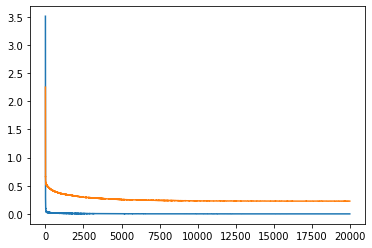

In [180]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.show()

# We now get the RMSE for both train and test sets to see if they differ by much

# Make predictions based on train set and get a root mean squared error 

In [181]:
from sklearn.metrics import mean_squared_error
import math

train_yhat = lstm_aadt_norm_model.predict(train_X)
mse = mean_squared_error(train_y, train_yhat)
rmse = math.sqrt(mse)

In [182]:
print('Train RMSE: ' + str(rmse))

Train RMSE: 0.001994081778050337


In [183]:
train_yhat_plot = [train_yhat[i][6] for i in range(len(train_yhat))]
train_y_plot = [train_y[i][6] for i in range(len(train_y))]

# Make predictions based on test set and get a root mean squared error 

In [251]:
test_y_1 = np.array([row[0] for row in test_y])
test_y_1.shape

(32, 15)

In [252]:
test_y_1_SR = [test_y_1[i][6] for i in range(len(test_y_1))]

In [253]:
from sklearn.metrics import mean_squared_error
import math

test_yhat = lstm_aadt_norm_model.predict(test_X)
test_yhat_SR = [test_yhat[i][6] for i in range(len(test_yhat))]
mse = mean_squared_error(test_y_1_SR, test_yhat_SR)
rmse_1 = math.sqrt(mse)

In [254]:
print('Test RMSE: ' + str(rmse_1))

Test RMSE: 0.29418257526932406


In [263]:
test_y_2 = np.array([row[1] for row in test_y])
test_y_2.shape

(32, 15)

In [266]:
test_y_2_SR = [test_y_2[i][6] for i in range(len(test_y_2))]

In [267]:
test_X_temp_2 = test_X[:, :-1, :]
test_X_temp_2[0].shape

test_X_2 = np.empty([32, 18, 15])

for idx, element in enumerate(test_X_temp_2):
    test_X_2[idx] = np.append(element, [test_yhat[idx]], axis=0)
#     break

In [268]:
from sklearn.metrics import mean_squared_error
import math

test_yhat_2 = lstm_aadt_norm_model.predict(test_X_2)
test_yhat_2_SR = [test_yhat_2[i][6] for i in range(len(test_yhat_2))]
mse = mean_squared_error(test_y_2_SR, test_yhat_2_SR)
rmse_2 = math.sqrt(mse)

In [269]:
print('Test RMSE: ' + str(rmse_2))

Test RMSE: 0.20849534249993104


In [270]:
test_y_3 = np.array([row[2] for row in test_y])
test_y_3.shape

(32, 15)

In [262]:
test_y_3_SR = [test_y_3[i][6] for i in range(len(test_y_3))]

In [271]:
test_X_temp_3 = test_X_2[:, :-1, :]
test_X_temp_3[0].shape

test_X_3 = np.empty([32, 18, 15])

for idx, element in enumerate(test_X_temp_3):
    test_X_3[idx] = np.append(element, [test_yhat_2[idx]], axis=0)
#     break

In [272]:
from sklearn.metrics import mean_squared_error
import math

test_yhat_3 = lstm_aadt_norm_model.predict(test_X_3)
test_yhat_3_SR = [test_yhat_3[i][6] for i in range(len(test_yhat_3))]
mse = mean_squared_error(test_y_3_SR, test_yhat_3_SR)
rmse_3 = math.sqrt(mse)

In [273]:
print('Test RMSE: ' + str(rmse_3))

Test RMSE: 0.2069318992329208


In [274]:
test_y_4 = np.array([row[3] for row in test_y])
test_y_4.shape

(32, 15)

In [275]:
test_y_4_SR = [test_y_4[i][6] for i in range(len(test_y_4))]

In [276]:
test_X_temp_4 = test_X_3[:, :-1, :]
test_X_temp_4[0].shape

test_X_4 = np.empty([32, 18, 15])

for idx, element in enumerate(test_X_temp_4):
    test_X_4[idx] = np.append(element, [test_yhat_3[idx]], axis=0)
#     break

In [277]:
from sklearn.metrics import mean_squared_error
import math

test_yhat_4 = lstm_aadt_norm_model.predict(test_X_4)
test_yhat_4_SR = [test_yhat_4[i][6] for i in range(len(test_yhat_4))]
mse = mean_squared_error(test_y_4_SR, test_yhat_4_SR)
rmse_4 = math.sqrt(mse)

In [278]:
print('Test RMSE: ' + str(rmse_4))

Test RMSE: 0.4107785510949534


In [283]:
test_yhat_plot = [test_yhat_4_SR[i] for i in range(len(test_yhat_4_SR))]
test_y_plot = [test_y_4_SR[i] for i in range(len(test_y_4_SR))]

# Plot train labels along with train predictions

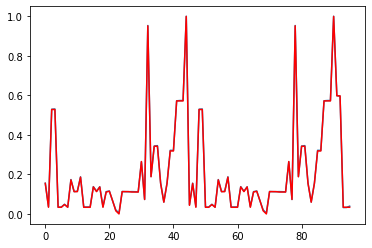

In [284]:
from matplotlib import pyplot

pyplot.plot(train_yhat_plot, label='actual')
pyplot.plot(train_y_plot, color='red', label='predicted')
pyplot.show()

# Plot test labels along with test predictions

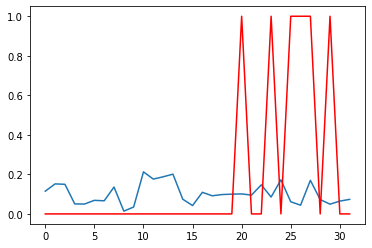

In [285]:
from matplotlib import pyplot

pyplot.plot(test_yhat_plot, label='actual')
pyplot.plot(test_y_plot, color='red', label='predicted')
pyplot.show()

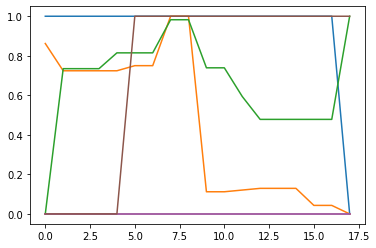

In [286]:
import matplotlib.pyplot as plt

x1 = [test_X[30][i][0] for i in range(len(test_X[0]))]
x2 = [test_X[30][i][1] for i in range(len(test_X[0]))]
x3 = [test_X[30][i][2] for i in range(len(test_X[0]))]
x4 = [test_X[30][i][3] for i in range(len(test_X[0]))]
x5 = [test_X[30][i][4] for i in range(len(test_X[0]))]
x6 = [test_X[30][i][5] for i in range(len(test_X[0]))]

plt.plot(x1)
plt.plot(x2)
plt.plot(x3)
plt.plot(x4)
plt.plot(x5)
plt.plot(x6)

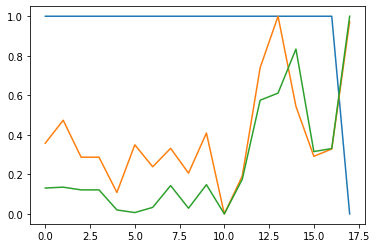

In [287]:
import matplotlib.pyplot as plt

x7 = [test_X[30][i][6] for i in range(len(test_X[0]))]
x8 = [test_X[30][i][7] for i in range(len(test_X[0]))]
x9 = [test_X[30][i][8] for i in range(len(test_X[0]))]

plt.plot(x7)
plt.plot(x8)
plt.plot(x9)

# plt.legend()

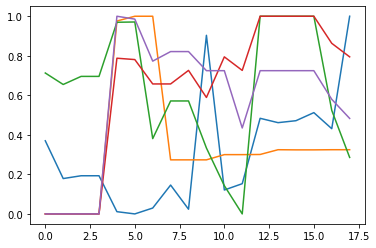

In [288]:
import matplotlib.pyplot as plt

x10 = [test_X[30][i][9] for i in range(len(test_X[0]))]
x11 = [test_X[30][i][10] for i in range(len(test_X[0]))]
x12 = [test_X[30][i][11] for i in range(len(test_X[0]))]
x13 = [test_X[30][i][12] for i in range(len(test_X[0]))]
x14 = [test_X[30][i][13] for i in range(len(test_X[0]))]

plt.plot(x10)
plt.plot(x11)
plt.plot(x12)
plt.plot(x13)
plt.plot(x14)

In [289]:
list_of_examples[60]

array([[0.00000000e+00, 1.16103564e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.57601883e-01,
        7.27224892e-02, 9.63342616e-02, 1.02228985e-02, 4.03508772e-05,
        9.82800983e-05, 5.55555556e-03, 5.55555556e-02],
       [0.00000000e+00, 0.00000000e+00, 7.46666667e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.73893550e-01,
        7.51972972e-02, 4.65721239e-02, 1.02228985e-02, 4.03508772e-05,
        9.82800983e-05, 5.55555556e-03, 5.55555556e-02],
       [0.00000000e+00, 0.00000000e+00, 7.46666667e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.86932996e-01,
        6.75491542e-02, 5.02625382e-02, 1.02228985e-02, 2.60233918e-05,
        0.00000000e+00, 5.10227801e-03, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.46666667e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.86932996e-01,
        6.75491542e-02, 5.02625382e-0

In [290]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

new_list_of_examples = list_of_examples[:]

for idx, x in enumerate(list_of_examples):
    new_list_of_examples[idx] = scaler.fit_transform(x)

In [291]:
new_list_of_examples[60]

array([[0.00000000e+00, 1.16103564e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.57601883e-01,
        7.27224892e-02, 9.63342616e-02, 1.02228985e-02, 4.03508772e-05,
        9.82800983e-05, 5.55555556e-03, 5.55555556e-02],
       [0.00000000e+00, 0.00000000e+00, 7.46666667e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.73893550e-01,
        7.51972972e-02, 4.65721239e-02, 1.02228985e-02, 4.03508772e-05,
        9.82800983e-05, 5.55555556e-03, 5.55555556e-02],
       [0.00000000e+00, 0.00000000e+00, 7.46666667e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.86932996e-01,
        6.75491542e-02, 5.02625382e-02, 1.02228985e-02, 2.60233918e-05,
        0.00000000e+00, 5.10227801e-03, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.46666667e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.86932996e-01,
        6.75491542e-02, 5.02625382e-0

In [197]:
len(x)
# len(sufficiency_rating)

22

In [198]:
sufficiency_rating[:-1]

NameError: name 'sufficiency_rating' is not defined

In [199]:
 sufficiency_rating[-1]

NameError: name 'sufficiency_rating' is not defined

In [200]:
[x[-1]]

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [201]:
x[:-1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.75460382, 0.74918762, 0.40954898,
        0.        , 0.06408898, 0.08571429, 0.6433121 , 1.        ],
       [0.        , 0.        , 0.12399356, 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.77468311, 0.19799358,
        0.        , 0.        , 0.1       , 0.50318471, 1.        ],
       [0.        , 0.        , 0.12399356, 0.        , 0.        ,
        0.        , 1.        , 0.60547985, 0.69589189, 0.21368276,
        0.        , 0.02436441, 0.15714286, 0.57961783, 0.41176471],
       [0.        , 0.        , 0.12399356, 0.        , 0.        ,
        0.        , 1.        , 0.60547985, 0.69589189, 0.21368276,
        0.        , 0.02436441, 0.15714286, 0.57961783, 0.41176471],
       [0.        , 0.        , 0.16908213, 0.        , 0.        ,
        0.        , 1.        , 0.2290011 , 0.11500844, 0.01250051,
        0.12727273, 1.        , 0.71428571, 

In [202]:
test_X.shape

(32, 18, 15)

In [203]:
np.array([sufficiency_rating]).shape

NameError: name 'sufficiency_rating' is not defined

In [204]:
test_X[61].tolist()

IndexError: index 61 is out of bounds for axis 0 with size 32

In [205]:
test_yhat[61].reshape(1,15)

IndexError: index 61 is out of bounds for axis 0 with size 32

In [206]:
test_yhat[61].reshape(1,15).shape

IndexError: index 61 is out of bounds for axis 0 with size 32

In [207]:
test_X[61].shape

IndexError: index 61 is out of bounds for axis 0 with size 32

In [208]:
new_test = test_X[61].tolist() + test_yhat[61].reshape(1,15).tolist()

IndexError: index 61 is out of bounds for axis 0 with size 32

In [209]:
new_result_1 = lstm_aadt_norm_model.predict(np.array(new_test[1:]).reshape(1,21,15))

NameError: name 'new_test' is not defined

In [210]:
new_test = test_X[61].tolist() + test_yhat[61].reshape(1,15).tolist() + new_result_1.tolist()

IndexError: index 61 is out of bounds for axis 0 with size 32

In [215]:
new_result_2 = lstm_aadt_norm_model.predict(np.array(new_test[2:]).reshape(1,21,15))

NameError: name 'new_test' is not defined

In [211]:
new_test = test_X[61].tolist() + test_yhat[61].reshape(1,15).tolist() + new_result_1.tolist() + new_result_2.tolist()

IndexError: index 61 is out of bounds for axis 0 with size 32

In [212]:
new_result_3 = lstm_aadt_norm_model.predict(np.array(new_test[3:]).reshape(1,21,15))

NameError: name 'new_test' is not defined

In [213]:
new_test = test_X[61].tolist() + test_yhat[61].reshape(1,15).tolist() + new_result_1.tolist() + new_result_2.tolist() + new_result_3.tolist()

IndexError: index 61 is out of bounds for axis 0 with size 32

In [214]:
new_result_4 = lstm_aadt_norm_model.predict(np.array(new_test[4:]).reshape(1,21,15))

NameError: name 'new_test' is not defined

In [510]:
new_test = test_X[61].tolist() + test_yhat[61].reshape(1,15).tolist() + new_result_1.tolist() + new_result_2.tolist() + new_result_3.tolist() + new_result_4.tolist()

In [511]:
new_result_5 = lstm_aadt_norm_model.predict(np.array(new_test[5:]).reshape(1,21,15))

In [512]:
new_test = test_X[61].tolist() + test_yhat[61].reshape(1,15).tolist() + new_result_1.tolist() + new_result_2.tolist() + new_result_3.tolist() + new_result_4.tolist() + new_result_5.tolist()

In [513]:
new_result_6 = lstm_aadt_norm_model.predict(np.array(new_test[6:]).reshape(1,21,15))

In [514]:
new_test = test_X[61].tolist() + test_yhat[61].reshape(1,15).tolist() + new_result_1.tolist() + new_result_2.tolist() + new_result_3.tolist() + new_result_4.tolist() + new_result_5.tolist() + new_result_6.tolist()

In [515]:
new_result_7 = lstm_aadt_norm_model.predict(np.array(new_test[7:]).reshape(1,21,15))

In [516]:
new_test = test_X[61].tolist() + test_yhat[61].reshape(1,15).tolist() + new_result_1.tolist() + new_result_2.tolist() + new_result_3.tolist() + new_result_4.tolist() + new_result_5.tolist() + new_result_6.tolist() + new_result_7.tolist()

In [517]:
new_result_8 = lstm_aadt_norm_model.predict(np.array(new_test[8:]).reshape(1,21,15))

In [520]:
new_result_8

array([[ 0.02032564,  0.41874537,  0.01731504,  0.42597282,  0.17033936,
         0.1455718 ,  0.2041254 , -0.07849736,  0.07844992,  0.87706894,
         0.23515292,  0.12388796,  0.06298027,  0.135833  ,  0.34566754]],
      dtype=float32)

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import pandas as pd

sufficiency_rating = [new_list_of_examples[6][i][6] for i in range(21)]
print(len(sufficiency_rating))

sufficiency_rating += [test_yhat[61][6]]
sufficiency_rating += [new_result_1[0][6]]
sufficiency_rating += [new_result_2[0][6]]
sufficiency_rating += [new_result_3[0][6]]
sufficiency_rating += [new_result_4[0][6]]
sufficiency_rating += [new_result_5[0][6]]
sufficiency_rating += [new_result_6[0][6]]
sufficiency_rating += [new_result_7[0][6]]
sufficiency_rating += [new_result_8[0][6]]

x =[i for i in range(30)]

fig, ax = plt.subplots()

plt.plot(x[:-10],sufficiency_rating[:-10],'b')
plt.plot(x[-10:], sufficiency_rating[-10:], 'r')

print(len(sufficiency_rating))
test_y[60]

21


IndexError: index 61 is out of bounds for axis 0 with size 32

In [519]:
sufficiency_rating

[0.27027027027027023,
 0.15444015444015435,
 0.15444015444015435,
 0.15444015444015435,
 0.15444015444015435,
 0.0,
 0.0,
 0.03861003861003847,
 0.03861003861003847,
 0.03861003861003847,
 0.03861003861003847,
 0.03861003861003847,
 0.03861003861003847,
 0.03861003861003847,
 0.03861003861003847,
 0.03861003861003847,
 0.03861003861003847,
 0.27027027027027023,
 0.27027027027027023,
 0.27027027027027023,
 0.27027027027027023,
 0.33067927,
 0.27808437,
 0.098830864,
 0.17295606,
 0.12960674,
 0.23082629,
 0.22336388,
 0.14285664,
 0.2041254]

In [349]:
[new_result_2[0][6]]

[0.2797042]

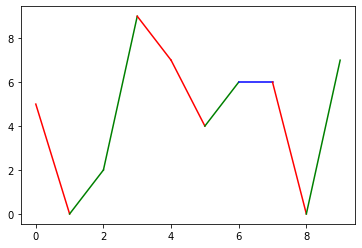

In [133]:
import numpy
from matplotlib import pyplot as plt

x = range(10)
y = numpy.random.choice(10,10)
print(zip(x, x[1:], y, y[1:]))
for x1, x2, y1,y2 in zip(x, x[1:], y, y[1:]):
    if y1 > y2:
        plt.plot([x1, x2], [y1, y2], 'r')
    elif y1 < y2:
        plt.plot([x1, x2], [y1, y2], 'g')
    else:
        plt.plot([x1, x2], [y1, y2], 'b')

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for idx, x in enumerate(train_X):
    train_X[idx] = scaler.fit_transform(x)

train_y = scaler.fit_transform(train_y.reshape(-1,1))

for idx, x in enumerate(test_X):
    test_X[idx] = scaler.fit_transform(x)

test_y = scaler.fit_transform(test_y.reshape(-1,1))